In [ ]:
!pip install lifelines
!pip install pycox torchtuples --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=64d95600c078c0b82ff0cb2d36fd30a5c51686d8f881cce5f798cca9f4510d12
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.2/494.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 

In [ ]:
!pip install torchtuples==0.2.2
!pip install git+https://github.com/havakv/pycox.git

  Cloning https://github.com/havakv/pycox.git to /tmp/pip-req-build-_f7gxxmq
  Running command git clone --filter=blob:none --quiet https://github.com/havakv/pycox.git /tmp/pip-req-build-_f7gxxmq
  Resolved https://github.com/havakv/pycox.git to commit 3eccdd7fd9844a060f50fdcc315659f33a2d2dc1
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q pycox==0.2.3 torchtuples==0.2.6 lifelines scikit-survival optuna matplotlib seaborn

ERROR: Could not find a version that satisfies the requirement torchtuples==0.2.6 (from versions: 0.1.1, 0.1.2, 0.2.0, 0.2.1, 0.2.2)
ERROR: No matching distribution found for torchtuples==0.2.6


In [ ]:
!pip install scikit-survival
!pip install optuna
!pip install optuna[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 15.1 MB/s eta 0:00:00


In [ ]:
pip install pycox

In [ ]:
# =========================================
# A–Z Survival Analysis Pipeline
# =========================================

# Install needed packages (if not already installed)
!pip install lifelines scikit-survival pycox torchtuples

In [ ]:
#SHAP summary
!pip install shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (concordance_index_censored,
                            integrated_brier_score,
                            brier_score)
from sksurv.util import Surv
import optuna
import torch
import torchtuples as tt
from sklearn.inspection import permutation_importance
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test


# Imports
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lifelines.utils import concordance_index
from lifelines import CoxPHFitter
import warnings
warnings.filterwarnings('ignore')
sns.set()
# --------------------------
# 1. Load your dataset
DATA_PATH = "/content/drive/MyDrive/survival/Final SEER data all dec.csv"
# -------------------
df = pd.read_csv(DATA_PATH)


# Time & event columns
# --------------------------
time_col = "Survival months"
event_col = "Vital status recode 1 alive"

# --------------------------
# Features (excluding time/event if present)
# --------------------------
all_features = [
    # Time & Event Variables
    "Year of diagnosis",
    "First malignant primary indicator",
    "Year of follow-up recode",

    # Demographic Features
    "Age recode with <1 year olds and 90+",
    "Sex",
    "Origin recode NHIA (Hispanic, Non-Hisp)",
    "Race recode (with detailed Asian and Native Hawaiian other PI)",
    "Race and origin (recommended by SEER)",
    "Median household income inflation adj to 2023",

    # Tumor & Clinical Features
    "Histologic Type ICD-O-3",
    "Primary Site",
    "ICD-O-3 Hist/behav, malignant",
    "Histology recode - broad groupings",
    "Site recode - rare tumors",
    "Breslow Tumor Thickness (2018+)",
    "Tumor Size Summary (2016+)",
    "Age Standard for Survival Prostate Cancer (15-85+)",
    "Grade Recode (thru 2017)",
    "Derived Summary Grade 2018 (2018+)",
    "Grade Clinical (2018+)",
    "Grade Pathological (2018+)",
    "COD to site recode",
    "SEER cause-specific death classification",
    "COD to site recode ICD-O-3 2023 Revision Expanded (1999+)",
    "Site rec ICD-O-3/WHO 2008 (individual sites only)",

    # Treatment & Diagnosis Features
    "Combined Summary Stage with Expanded Regional Codes (2004+)",
    "RX Summ–Surg Prim Site (2003+)",
    "Record number recode",
    "Diagnostic Confirmation",
    "Type of Reporting Source",
    "Primary Site – labeled",
    "Behavior recode for analysis",
    "Chemotherapy recode (yes, no/unk) (2004+)",
    "Reason no cancer-directed surgery (2006+)",
    "Combined Summary Stage with Expanded Regional Codes (2004+)",
    "RX Summ–Surg/Rad Seq (2006+)",
    "RX Summ–Surg Oth Reg/Dis (2003+)",

    # Other Features
    "Total number of in situ/malignant tumors for patient"
]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1) Load data
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

# ----------------------------
# 2) Define time & event
# ----------------------------
time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

# Drop rows with missing outcome
df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col])

# ----------------------------
# 3) Drop columns marked as "Drop"
# ----------------------------
dropped_features = [
    "Patient ID",
]

X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

# ----------------------------
# 4) Prepare y
# ----------------------------
y_time = df[time_col].astype(float).values
y_event = (
    df[event_col].astype(str).str.strip().str.lower()
      .isin(["dead", "died", "death", "1", "yes", "y"])
).astype(int).values

# ----------------------------
# 5) Handle missing values
# ----------------------------
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna("Unknown")

# ----------------------------
# 6) Scale numeric features
# ----------------------------
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# ----------------------------
# 7) Drop constant features
# ----------------------------
constant_cols = [c for c in X.columns if X[c].nunique() <= 1]
X = X.drop(columns=constant_cols)
print("Dropped constant columns:", constant_cols)

# ----------------------------
# 8) Final dataset
# ----------------------------
print("Final feature matrix shape:", X.shape)
print("Time vector shape:", y_time.shape)
print("Event vector shape:", y_event.shape)

# ✅ X, y_time, y_event are now ready for survival analysis


Dropped constant columns: []
Final feature matrix shape: (726, 29)
Time vector shape: (726,)
Event vector shape: (726,)



🔹 Running models with Baseline feature set...


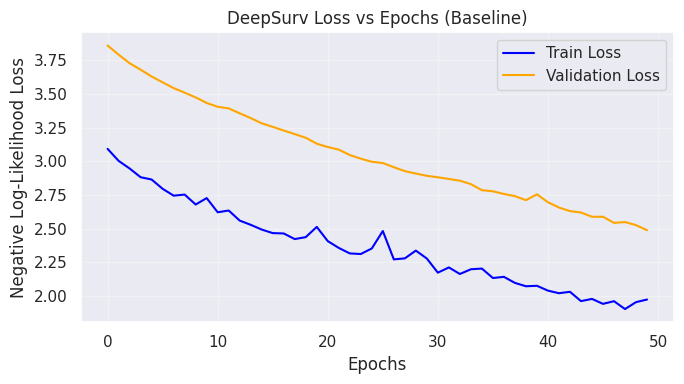

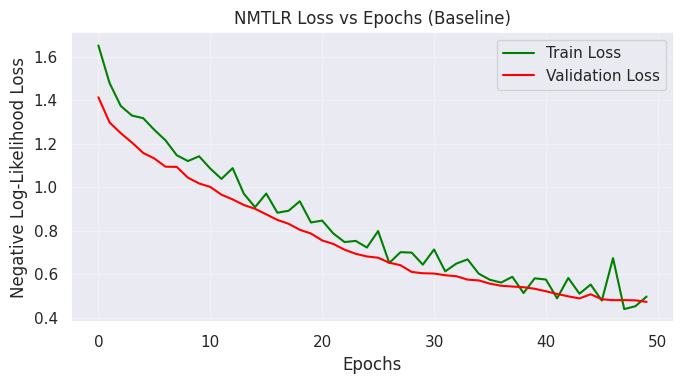

          C-index (Train)  C-index (Test)     IBS
CoxPH              0.9343          0.9258  0.0140
RSF                0.1461          0.1817  0.0239
DeepSurv           0.0461          0.0856  0.0122
NMTLR              0.8142          0.7586  0.0275

🔹 Running models with PCA feature set...


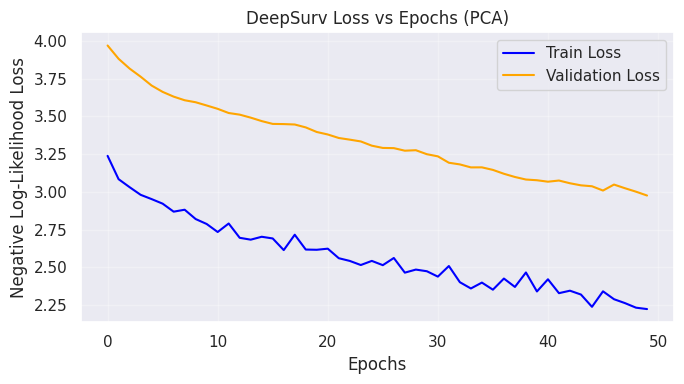

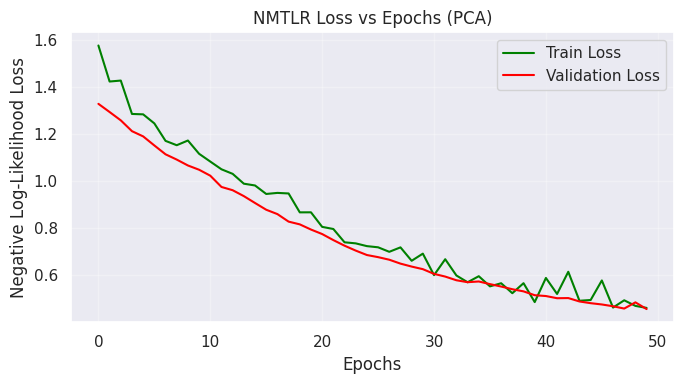

          C-index (Train)  C-index (Test)     IBS
CoxPH              0.9158          0.8952  0.0169
RSF                0.1641          0.2397  0.0411
DeepSurv           0.1133          0.1485  0.0198
NMTLR              0.8449          0.7708  0.0279

🔹 Running models with LDA feature set...


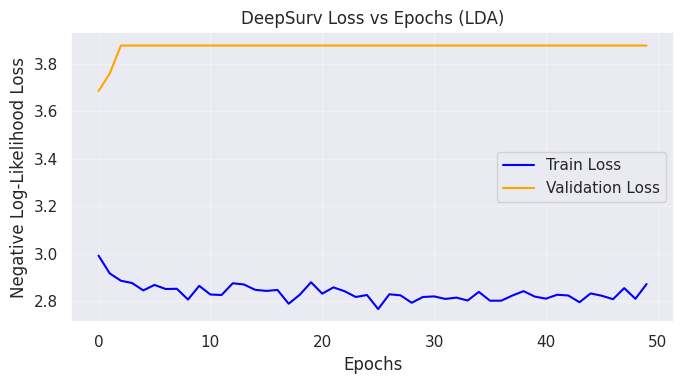

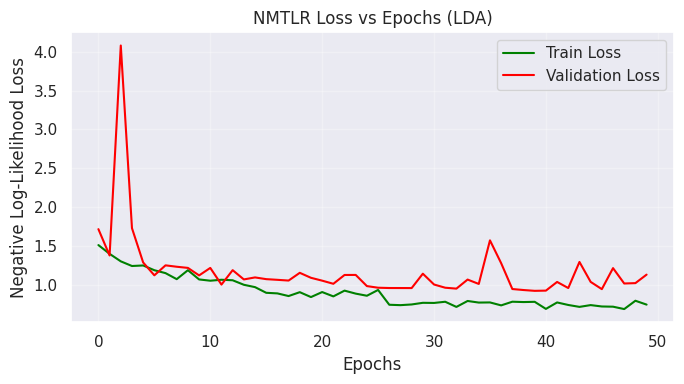

          C-index (Train)  C-index (Test)     IBS
CoxPH              0.6073          0.6101  0.0385
RSF                0.3927          0.3899  0.0343
DeepSurv           0.3927          0.3899  0.0751
NMTLR              0.5000          0.5000  0.0783

===== 📊 Baseline vs PCA vs LDA Comparison =====
                   C-index (Train)  C-index (Test)     IBS
Baseline CoxPH              0.9343          0.9258  0.0140
         RSF                0.1461          0.1817  0.0239
         DeepSurv           0.0461          0.0856  0.0122
         NMTLR              0.8142          0.7586  0.0275
PCA      CoxPH              0.9158          0.8952  0.0169
         RSF                0.1641          0.2397  0.0411
         DeepSurv           0.1133          0.1485  0.0198
         NMTLR              0.8449          0.7708  0.0279
LDA      CoxPH              0.6073          0.6101  0.0385
         RSF                0.3927          0.3899  0.0343
         DeepSurv           0.3927          0.3899  

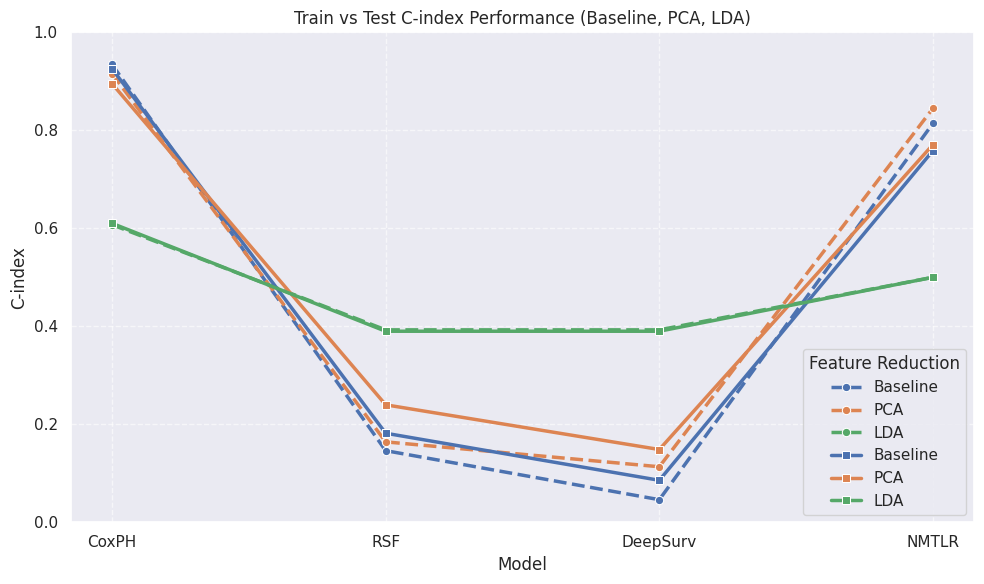

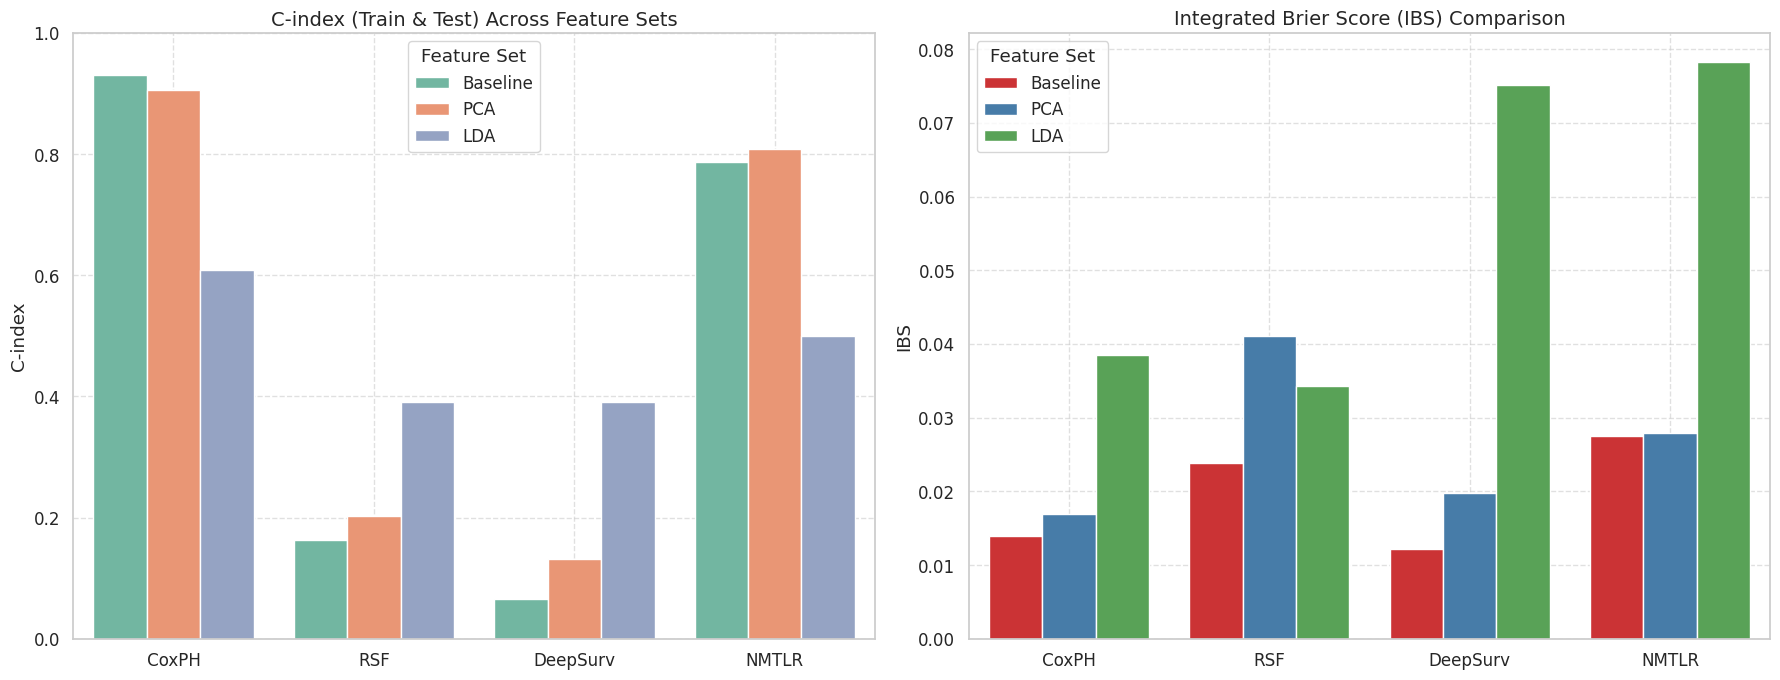

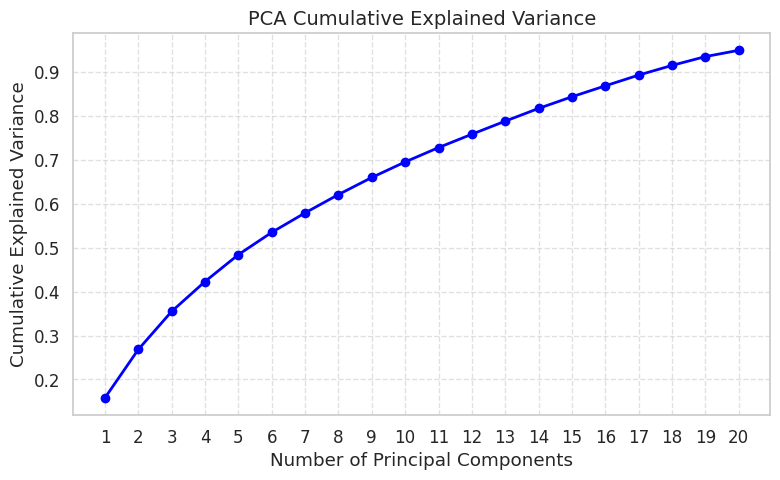

In [ ]:
# ==============================
# Survival Analysis Benchmark: CoxPH + RSF + DeepSurv + NMTLR
# With Baseline, PCA, and LDA comparison (Final Stable Version)
# Adds proper train/validation loss curves for DeepSurv & NMTLR
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import integrated_brier_score, concordance_index_censored
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import torchtuples as tt
from pycox.models import CoxPH as DeepSurvModel, LogisticHazard
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# 1) Load data
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

# ----------------------------
# 2) Define time & event
# ----------------------------
time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col])

# ----------------------------
# 3) Drop irrelevant columns
# ----------------------------
dropped_features = [
    "Patient ID",
]
X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

# ----------------------------
# 4) Target setup
# ----------------------------
y_time = df[time_col].astype(float).values
y_event = df[event_col].map({0: 0, 5: 1}).astype(int).values

# ----------------------------
# 5) Handle missing values
# ----------------------------
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna("Unknown")

# ----------------------------
# 6) Preprocessing
# ----------------------------
numeric_feats = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats),
    ("cat", categorical_transformer, categorical_feats)
])

# ----------------------------
# 7) Split data
# ----------------------------
TEST_SIZE = 0.2
RANDOM_STATE = 42
X_train, X_test, y_time_train, y_time_test, y_event_train, y_event_test = train_test_split(
    X, y_time, y_event, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_event
)

y_train_struct = Surv.from_arrays(event=y_event_train.astype(bool), time=y_time_train)
y_test_struct  = Surv.from_arrays(event=y_event_test.astype(bool), time=y_time_test)

EVAL_TIMES = np.linspace(
    max(y_time_train.min(), y_time_test.min()),
    min(y_time_train.max(), y_time_test.max()) - 1e-6,
    100
)

# ----------------------------
# Helper functions
# ----------------------------
def get_surv_array(surv_df, eval_times):
    arr = np.zeros((surv_df.shape[1], len(eval_times)))
    for i in range(surv_df.shape[1]):
        arr[i, :] = np.interp(eval_times, surv_df.index.values, surv_df.iloc[:, i].values)
    arr = np.nan_to_num(arr, nan=0.5)
    return np.clip(arr, 0, 1)

def evaluate_model(risk_train, risk_test, surv_funcs=None):
    train_c = concordance_index_censored(y_event_train.astype(bool), y_time_train, risk_train)[0]
    test_c  = concordance_index_censored(y_event_test.astype(bool), y_time_test, risk_test)[0]
    ibs = np.nan
    if surv_funcs is not None:
        try:
            ibs = integrated_brier_score(y_train_struct, y_test_struct, surv_funcs, EVAL_TIMES)
        except Exception:
            ibs = np.nan
    return [train_c, test_c, ibs]

# ----------------------------
# 8) Dimensionality reduction methods
# ----------------------------
reducers = {
    "Baseline": None,
    "PCA": PCA(n_components=min(20, X.shape[1]), random_state=RANDOM_STATE),
    "LDA": LDA(n_components=min(len(np.unique(y_event_train)) - 1, X.shape[1]))
}

# ----------------------------
# 9) Main evaluation loop
# ----------------------------
all_results = {}
pca = None  # for plotting later
model_logs = {}  # save logs for DeepSurv & NMTLR per reducer

for name, reducer in reducers.items():
    print(f"\n🔹 Running models with {name} feature set...")

    # Preprocess full train/test
    X_train_pr = preprocessor.fit_transform(X_train)
    X_test_pr  = preprocessor.transform(X_test)

    if hasattr(X_train_pr, "toarray"):
        X_train_pr = X_train_pr.toarray()
    if hasattr(X_test_pr, "toarray"):
        X_test_pr = X_test_pr.toarray()

    X_train_pr = np.nan_to_num(X_train_pr, nan=0.0, posinf=0.0, neginf=0.0)
    X_test_pr  = np.nan_to_num(X_test_pr, nan=0.0, posinf=0.0, neginf=0.0)

    # Apply reducer
    if name == "LDA":
        X_train_red = reducer.fit_transform(X_train_pr, y_event_train)
        X_test_red  = reducer.transform(X_test_pr)
    elif name == "PCA":
        X_train_red = reducer.fit_transform(X_train_pr)
        X_test_red  = reducer.transform(X_test_pr)
        pca = reducer
    else:
        X_train_red, X_test_red = X_train_pr, X_test_pr

    num_features = X_train_red.shape[1]

    # Create a validation subset from training set for monitoring (used in fit val_data only)
    # We will still fit on full training data but validate on this subset to get val_loss curve
    X_train_for_val, X_val_subset, y_time_train_for_val, y_time_val_subset, y_event_train_for_val, y_event_val_subset = train_test_split(
        X_train_red, y_time_train, y_event_train, test_size=0.2, random_state=RANDOM_STATE, stratify=y_event_train
    )

    # ---------- CoxPH ----------
    df_train = pd.DataFrame(X_train_red)
    df_train["time"] = y_time_train
    df_train["event"] = y_event_train
    df_test = pd.DataFrame(X_test_red)
    df_test["time"] = y_time_test
    df_test["event"] = y_event_test

    # remove constant/duplicate columns (to avoid singular matrix)
    df_train = df_train.loc[:, df_train.nunique() > 1]
    df_train = df_train.loc[:, ~df_train.T.duplicated()]

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(df_train, duration_col="time", event_col="event", show_progress=False)
    risk_train_cph = cph.predict_partial_hazard(df_train).values.ravel()

    # align test to train columns (if any columns were removed)
    df_test_aligned = df_test.reindex(columns=df_train.columns, fill_value=0)
    risk_test_cph = cph.predict_partial_hazard(df_test_aligned).values.ravel()
    surv_cph = get_surv_array(cph.predict_survival_function(df_test_aligned), EVAL_TIMES)

    # ---------- RSF ----------
    rsf = RandomSurvivalForest(n_estimators=200, min_samples_split=10,
                               min_samples_leaf=15, random_state=RANDOM_STATE, n_jobs=-1)
    rsf.fit(X_train_red, y_train_struct)
    risk_train_rsf = -rsf.predict(X_train_red)
    risk_test_rsf = -rsf.predict(X_test_red)
    surv_rsf = np.array([fn(EVAL_TIMES) for fn in rsf.predict_survival_function(X_test_red)])

    # ---------- DeepSurv ----------
    # Convert tensors - full train used for fitting, val subset used for val_data
    Xtr_full_t = torch.from_numpy(X_train_red).float()
    Xte_t = torch.from_numpy(X_test_red).float()
    Xval_t = torch.from_numpy(X_val_subset).float()

    ytime_full_t = torch.from_numpy(y_time_train).float()
    yevent_full_t = torch.from_numpy(y_event_train).float()
    ytime_val_t = torch.from_numpy(y_time_val_subset).float()
    yevent_val_t = torch.from_numpy(y_event_val_subset).float()

    net = tt.practical.MLPVanilla(num_features, [32, 32], 1, batch_norm=True, dropout=0.1)
    deep_model = DeepSurvModel(net, tt.optim.Adam)

    # Fit on full train, validate on validation subset (so we get val_loss)
    log_deep = deep_model.fit(
        Xtr_full_t, (ytime_full_t, yevent_full_t),
        val_data=(Xval_t, (ytime_val_t, yevent_val_t)),
        batch_size=64, epochs=50, verbose=False
    )
    deep_model.compute_baseline_hazards()

    risk_train_deep = -deep_model.predict(Xtr_full_t).flatten()
    risk_test_deep = -deep_model.predict(Xte_t).flatten()
    surv_deep = get_surv_array(deep_model.predict_surv_df(Xte_t), EVAL_TIMES)

    # ---------- NMTLR (LogisticHazard) ----------
    labtrans = LogisticHazard.label_transform(10)
    # Fit label transform on full training times
    y_train_lab_full, y_train_events_full = labtrans.fit_transform(y_time_train, y_event_train)
    # Transform val subset labels and test labels
    y_val_lab, y_val_events = labtrans.transform(y_time_val_subset, y_event_val_subset)
    y_test_lab, y_test_events = labtrans.transform(y_time_test, y_event_test)

    Xtr_full_t_n = torch.from_numpy(X_train_red).float()
    Xval_t_n = torch.from_numpy(X_val_subset).float()
    Xte_t_n = torch.from_numpy(X_test_red).float()

    y_train_lab_t = torch.from_numpy(y_train_lab_full.astype(np.int64))
    y_train_events_t = torch.from_numpy(y_train_events_full.astype(np.float32))
    y_val_lab_t = torch.from_numpy(y_val_lab.astype(np.int64))
    y_val_events_t = torch.from_numpy(y_val_events.astype(np.float32))

    net_nmtlr = tt.practical.MLPVanilla(num_features, [32, 32], labtrans.out_features, batch_norm=True, dropout=0.1)
    nmtlr = LogisticHazard(net_nmtlr, tt.optim.Adam, duration_index=labtrans.cuts)

    # Fit with validation data to obtain val_loss in log
    log_nmtlr = nmtlr.fit(
        Xtr_full_t_n, (y_train_lab_t, y_train_events_t),
        val_data=(Xval_t_n, (y_val_lab_t, y_val_events_t)),
        batch_size=64, epochs=50, verbose=False
    )

    surv_nmtlr = get_surv_array(nmtlr.predict_surv_df(Xte_t_n), EVAL_TIMES)
    risk_train_nmtlr = -np.sum(nmtlr.predict_surv_df(Xtr_full_t_n).values, axis=0)
    risk_test_nmtlr  = -np.sum(nmtlr.predict_surv_df(Xte_t_n).values, axis=0)

    # ----------------------------
    # Track logs for later plotting & save locally for this reducer
    model_logs[name] = {"deep": log_deep.to_pandas(), "nmtlr": log_nmtlr.to_pandas()}

    # =====================================
    # Plot DeepSurv and NMTLR loss curves for this reducer
    # (Train vs Validation)
    # =====================================
    # DeepSurv
    try:
        df_log_deep = log_deep.to_pandas()
        plt.figure(figsize=(7, 4))
        plt.plot(df_log_deep['train_loss'], label='Train Loss', color='blue')
        if 'val_loss' in df_log_deep.columns:
            plt.plot(df_log_deep['val_loss'], label='Validation Loss', color='orange')
        plt.title(f'DeepSurv Loss vs Epochs ({name})')
        plt.xlabel('Epochs')
        plt.ylabel('Negative Log-Likelihood Loss')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"⚠️ DeepSurv loss plot skipped for {name}: {e}")

    # NMTLR
    try:
        df_log_nmtlr = log_nmtlr.to_pandas()
        plt.figure(figsize=(7, 4))
        plt.plot(df_log_nmtlr['train_loss'], label='Train Loss', color='green')
        if 'val_loss' in df_log_nmtlr.columns:
            plt.plot(df_log_nmtlr['val_loss'], label='Validation Loss', color='red')
        plt.title(f'NMTLR Loss vs Epochs ({name})')
        plt.xlabel('Epochs')
        plt.ylabel('Negative Log-Likelihood Loss')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"⚠️ NMTLR loss plot skipped for {name}: {e}")

    # ---------- Evaluate ----------
    results = {
        "CoxPH": evaluate_model(risk_train_cph, risk_test_cph, surv_cph),
        "RSF": evaluate_model(risk_train_rsf, risk_test_rsf, surv_rsf),
        "DeepSurv": evaluate_model(risk_train_deep, risk_test_deep, surv_deep),
        "NMTLR": evaluate_model(risk_train_nmtlr, risk_test_nmtlr, surv_nmtlr)
    }

    all_results[name] = pd.DataFrame(results, index=["C-index (Train)", "C-index (Test)", "IBS"]).T
    print(all_results[name].round(4))

# ----------------------------
# 10) Combine Results
# ----------------------------
print("\n===== 📊 Baseline vs PCA vs LDA Comparison =====")
combined = pd.concat({
    method: df.round(4)
    for method, df in all_results.items()
}, axis=0)
print(combined)

# ----------------------------
# 11) Visualization: Train–Test C-index Comparison
# ----------------------------
plot_df = []
for method, df in all_results.items():
    for model in df.index:
        plot_df.append({
            "Reduction": method,
            "Model": model,
            "Train": df.loc[model, "C-index (Train)"],
            "Test": df.loc[model, "C-index (Test)"]
        })
plot_df = pd.DataFrame(plot_df)

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_df, x="Model", y="Train", hue="Reduction",
             marker="o", linestyle="--", linewidth=2.5)
sns.lineplot(data=plot_df, x="Model", y="Test", hue="Reduction",
             marker="s", linestyle="-", linewidth=2.5)

plt.title("Train vs Test C-index Performance (Baseline, PCA, LDA)")
plt.ylabel("C-index")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Feature Reduction", loc="lower right")
plt.tight_layout()
plt.show()

# =====================================================
# ✅ 1) Multiple Bar Chart (C-index & IBS)
# =====================================================
sns.set(style="whitegrid", font_scale=1.1)
comparison_df = combined.copy()
comp_df_reset = comparison_df.reset_index()
comp_df_reset.rename(columns={"level_0": "Reduction", "level_1": "Model"}, inplace=True)

comp_melt = comp_df_reset.melt(
    id_vars=["Reduction", "Model"],
    value_vars=["C-index (Train)", "C-index (Test)", "IBS"],
    var_name="Metric",
    value_name="Score"
)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# (A) Combined C-index & IBS plot
sns.barplot(
    data=comp_melt[comp_melt["Metric"] != "IBS"],
    x="Model", y="Score", hue="Reduction",
    palette="Set2", ci=None, ax=axes[0]
)
axes[0].set_title("C-index (Train & Test) Across Feature Sets", fontsize=14)
axes[0].set_ylabel("C-index")
axes[0].set_xlabel("")
axes[0].set_ylim(0, 1)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(title="Feature Set")

# (B) IBS comparison plot
sns.barplot(
    data=comp_melt[comp_melt["Metric"] == "IBS"],
    x="Model", y="Score", hue="Reduction",
    palette="Set1", ci=None, ax=axes[1]
)
axes[1].set_title("Integrated Brier Score (IBS) Comparison", fontsize=14)
axes[1].set_ylabel("IBS")
axes[1].set_xlabel("")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(title="Feature Set")

plt.tight_layout()
plt.show()

# =====================================================
# ✅ 2) PCA Explained Variance Chart (discrete components)
# =====================================================
if pca is not None:
    explained_var = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.arange(1, len(explained_var) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(n_components, explained_var, marker="o", linestyle="-", color="blue", linewidth=2)
    plt.xticks(n_components)
    plt.title("PCA Cumulative Explained Variance", fontsize=14)
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ PCA object not found — skipping PCA variance plot.")


In [ ]:
# ==============================
# 10-Fold CV Survival Analysis Benchmark (fixed)
# Models: CoxPH, RSF, DeepSurv, NMTLR
# - robust survival-function extraction
# - automatic risk-orientation for c-index
# - safe IBS calculation (no shape/domain errors)
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import integrated_brier_score, concordance_index_censored
import torchtuples as tt
from pycox.models import CoxPH as DeepSurvModel, LogisticHazard
import torch
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Helper functions
# ----------------------------
def surv_from_lifelines_df(surv_df, eval_times):
    """Convert lifelines/pycox survival DataFrame (index=times, cols=subjects) to (n_subjects, n_times) array."""
    n = surv_df.shape[1]
    out = np.zeros((n, len(eval_times)))
    idx = surv_df.index.values
    for i in range(n):
        out[i, :] = np.interp(eval_times, idx, surv_df.iloc[:, i].values, left=1.0, right=surv_df.iloc[:, i].values[-1])
    return np.clip(np.nan_to_num(out, nan=0.5), 0, 1)

def surv_from_sksurv_funcs(surv_funcs_list, eval_times):
    """Convert sksurv step-function objects (returned by predict_survival_function) to array.
       Each element in surv_funcs_list has attributes .x (times) and .y (surv probs)."""
    n = len(surv_funcs_list)
    out = np.zeros((n, len(eval_times)))
    for i, fn in enumerate(surv_funcs_list):
        times = fn.x
        probs = fn.y
        # safe interpolation; for ties at boundaries use left/right
        out[i, :] = np.interp(eval_times, times, probs, left=probs[0], right=probs[-1])
    return np.clip(np.nan_to_num(out, nan=0.5), 0, 1)

def best_oriented_cindex(y_time_ref, y_event_ref, preds):
    """Return best orientation c-index and the orientation (+1 or -1) for given preds."""
    # preds: 1D array
    a = concordance_index_censored(y_event_ref.astype(bool), y_time_ref, preds)[0]
    b = concordance_index_censored(y_event_ref.astype(bool), y_time_ref, -preds)[0]
    if np.isnan(a): a = -1.0
    if np.isnan(b): b = -1.0
    if b > a:
        return b, -1
    else:
        return a, 1

def safe_integrated_brier(y_train_struct, y_test_struct, surv_arr, eval_times):
    """Call integrated_brier_score safely, return nan on failure."""
    try:
        return integrated_brier_score(y_train_struct, y_test_struct, surv_arr, eval_times)
    except Exception:
        return np.nan

# ----------------------------
# 1) Load data (edit path as needed)
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col]).reset_index(drop=True)

# ----------------------------
# 2) Target setup
# ----------------------------
y_time_all = df[time_col].astype(float).values
y_event_all = df[event_col].map({0: 0, 5: 1}).astype(int).values

# ----------------------------
# 3) Drop irrelevant columns
# ----------------------------
dropped_features = ["Patient ID"]
X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

# ----------------------------
# 4) Handle missing values (numeric median, categorical "Unknown")
# ----------------------------
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna("Unknown")

# ----------------------------
# 5) Preprocessing pipeline (keep your pipeline)
# ----------------------------
numeric_feats = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats),
    ("cat", categorical_transformer, categorical_feats)
])

# 10-Fold setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Where we'll store fold outputs
fold_summaries = []

# ----------------------------
# 6) 10-Fold CV
# ----------------------------
for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"\n=== Fold {fold}/10 ===")
    # Split fold
    X_train_df = X.iloc[train_idx].reset_index(drop=True)
    X_test_df  = X.iloc[test_idx].reset_index(drop=True)
    y_time_train = y_time_all[train_idx]
    y_time_test  = y_time_all[test_idx]
    y_event_train = y_event_all[train_idx]
    y_event_test  = y_event_all[test_idx]

    # Structured survival for IBS/RSF
    y_train_struct = Surv.from_arrays(event=y_event_train.astype(bool), time=y_time_train)
    y_test_struct  = Surv.from_arrays(event=y_event_test.astype(bool), time=y_time_test)

    # Evaluation times FOR THIS FOLD — choose range within observed times to avoid domain issues
    eval_min = max(y_time_train.min(), y_time_test.min(), 0.0)
    eval_max = min(y_time_train.max(), y_time_test.max())
    if eval_max <= eval_min:
        eval_max = max(y_time_train.max(), y_time_test.max())
        eval_min = min(y_time_train.min(), y_time_test.min())
    EVAL_TIMES = np.linspace(eval_min, eval_max - 1e-8, 100)

    # Preprocess (fit on train only)
    X_train_pr = preprocessor.fit_transform(X_train_df)
    X_test_pr  = preprocessor.transform(X_test_df)

    if hasattr(X_train_pr, "toarray"):
        X_train_pr = X_train_pr.toarray()
        X_test_pr  = X_test_pr.toarray()

    X_train_pr = np.nan_to_num(X_train_pr, nan=0.0, posinf=0.0, neginf=0.0)
    X_test_pr  = np.nan_to_num(X_test_pr, nan=0.0, posinf=0.0, neginf=0.0)

    num_features = X_train_pr.shape[1]

    # ---------- CoxPH ----------
    # prepare df for lifelines (numeric matrix only)
    df_train_cph = pd.DataFrame(X_train_pr).loc[:, lambda d: d.nunique() > 1]  # drop constant cols
    df_train_cph = df_train_cph.loc[:, ~df_train_cph.T.duplicated()]  # drop duplicates
    df_train_cph["time"] = y_time_train
    df_train_cph["event"] = y_event_train

    df_test_cph = pd.DataFrame(X_test_pr)
    df_test_cph = df_test_cph.reindex(columns=df_train_cph.columns, fill_value=0)  # align
    df_test_cph["time"] = y_time_test
    df_test_cph["event"] = y_event_test

    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(df_train_cph, duration_col="time", event_col="event", show_progress=False)

    # risks
    risk_train_cph = cph.predict_partial_hazard(df_train_cph).values.ravel()
    risk_test_cph  = cph.predict_partial_hazard(df_test_cph).values.ravel()
    # survival functions interpolation
    surv_df_cph = cph.predict_survival_function(df_test_cph)
    surv_cph = surv_from_lifelines_df(surv_df_cph, EVAL_TIMES)  # shape (n_test, len(EVAL_TIMES))

    # ---------- RSF ----------
    rsf = RandomSurvivalForest(n_estimators=200, min_samples_split=10, min_samples_leaf=15,
                               random_state=42, n_jobs=-1)
    rsf.fit(X_train_pr, y_train_struct)
    risk_train_rsf = rsf.predict(X_train_pr)    # sksurv's predict often larger -> higher risk
    risk_test_rsf  = rsf.predict(X_test_pr)
    # survival functions (step-functions) -> interpolate safely to EVAL_TIMES
    surv_rsf = surv_from_sksurv_funcs(rsf.predict_survival_function(X_test_pr), EVAL_TIMES)

    # ---------- DeepSurv (pycox) ----------
    # We'll keep a small validation set for logging (doesn't affect final metrics)
    tr_idx, val_idx = train_test_split(np.arange(len(X_train_pr)), test_size=0.2, random_state=42, stratify=y_event_train)
    Xtr_for_fit = X_train_pr[tr_idx]
    Xval_for_fit = X_train_pr[val_idx]

    Xtr_t = torch.from_numpy(Xtr_for_fit).float()
    Xval_t = torch.from_numpy(Xval_for_fit).float()
    Xte_t = torch.from_numpy(X_test_pr).float()

    ytr_time_t = torch.from_numpy(y_time_train[tr_idx]).float()
    ytr_event_t = torch.from_numpy(y_event_train[tr_idx]).float()
    yval_time_t = torch.from_numpy(y_time_train[val_idx]).float()
    yval_event_t = torch.from_numpy(y_event_train[val_idx]).float()

    net = tt.practical.MLPVanilla(num_features, [32, 32], 1, batch_norm=True, dropout=0.1)
    deep_model = DeepSurvModel(net, tt.optim.Adam)
    # fit on training portion, validate on val portion
    deep_log = deep_model.fit(Xtr_t, (ytr_time_t, ytr_event_t),
                              val_data=(Xval_t, (yval_time_t, yval_event_t)),
                              batch_size=64, epochs=50, verbose=False)
    deep_model.compute_baseline_hazards()

    # Predictions: model.predict returns linear predictor (higher=higher risk)
    pred_train_deep = deep_model.predict(torch.from_numpy(X_train_pr).float()).flatten().detach().cpu().numpy()
    pred_test_deep  = deep_model.predict(Xte_t).flatten().detach().cpu().numpy()
    # convert predicted survival df -> interpolate
    surv_df_deep = deep_model.predict_surv_df(Xte_t)  # DataFrame
    surv_deep = surv_from_lifelines_df(surv_df_deep, EVAL_TIMES)

    # ---------- NMTLR ----------
    labtrans = LogisticHazard.label_transform(10)
    y_train_lab, y_train_events = labtrans.fit_transform(y_time_train, y_event_train)
    y_test_lab, y_test_events = labtrans.transform(y_time_test, y_event_test)

    Xtr_n = torch.from_numpy(X_train_pr).float()
    Xte_n = torch.from_numpy(X_test_pr).float()

    net_nmtlr = tt.practical.MLPVanilla(num_features, [32, 32], labtrans.out_features, batch_norm=True, dropout=0.1)
    nmtlr = LogisticHazard(net_nmtlr, tt.optim.Adam, duration_index=labtrans.cuts)

    # small val for nmtlr logging (reuse split earlier)
    y_train_lab_t = torch.from_numpy(y_train_lab.astype(np.int64))
    y_train_events_t = torch.from_numpy(y_train_events.astype(np.float32))
    Xval_n = torch.from_numpy(X_train_pr[val_idx]).float()
    y_val_lab, y_val_events = labtrans.transform(y_time_train[val_idx], y_event_train[val_idx])
    y_val_lab_t = torch.from_numpy(y_val_lab.astype(np.int64))
    y_val_events_t = torch.from_numpy(y_val_events.astype(np.float32))

    nmtlr_log = nmtlr.fit(Xtr_n, (y_train_lab_t, y_train_events_t),
                         val_data=(Xval_n, (y_val_lab_t, y_val_events_t)),
                         batch_size=64, epochs=50, verbose=False)

    surv_df_nmtlr = nmtlr.predict_surv_df(Xte_n)
    surv_nmtlr = surv_from_lifelines_df(surv_df_nmtlr, EVAL_TIMES)
    # risk for nmtlr use negative sum of survival probs (higher -> worse)
    risk_train_nmtlr = -np.sum(nmtlr.predict_surv_df(Xtr_n).values, axis=0)
    risk_test_nmtlr  = -np.sum(nmtlr.predict_surv_df(Xte_n).values, axis=0)

    # ---------- Evaluate orientation-aware c-index + IBS ----------
    # For each split we compute best orientation separately for train/test
    # CoxPH
    train_c_ph, orient_ph_train = best_oriented_cindex(y_time_train, y_event_train, risk_train_cph)
    test_c_ph, orient_ph_test = best_oriented_cindex(y_time_test, y_event_test, risk_test_cph)
    cph_cindex_train = train_c_ph
    cph_cindex_test  = test_c_ph
    cph_ib = safe_integrated_brier(y_train_struct, y_test_struct, surv_cph, EVAL_TIMES)

    # RSF (sklearn's predict usually yields a risk score; we still orientation-check)
    train_c_rsf, _ = best_oriented_cindex(y_time_train, y_event_train, risk_train_rsf)
    test_c_rsf, _  = best_oriented_cindex(y_time_test, y_event_test, risk_test_rsf)
    rsf_ib = safe_integrated_brier(y_train_struct, y_test_struct, surv_rsf, EVAL_TIMES)

    # DeepSurv
    train_c_deep, _ = best_oriented_cindex(y_time_train, y_event_train, pred_train_deep)
    test_c_deep, _  = best_oriented_cindex(y_time_test, y_event_test, pred_test_deep)
    deep_ib = safe_integrated_brier(y_train_struct, y_test_struct, surv_deep, EVAL_TIMES)

    # NMTLR
    train_c_nmtlr, _ = best_oriented_cindex(y_time_train, y_event_train, risk_train_nmtlr)
    test_c_nmtlr, _  = best_oriented_cindex(y_time_test, y_event_test, risk_test_nmtlr)
    nmtlr_ib = safe_integrated_brier(y_train_struct, y_test_struct, surv_nmtlr, EVAL_TIMES)

    # collect fold summary
    fold_summary = {
        "CoxPH": {"Train": cph_cindex_train, "Test": cph_cindex_test, "IBS": cph_ib},
        "RSF":   {"Train": train_c_rsf,     "Test": test_c_rsf,     "IBS": rsf_ib},
        "DeepSurv": {"Train": train_c_deep, "Test": test_c_deep,   "IBS": deep_ib},
        "NMTLR": {"Train": train_c_nmtlr,  "Test": test_c_nmtlr,  "IBS": nmtlr_ib}
    }
    fold_summaries.append(fold_summary)
    print("Fold results (test c-index):",
          {"CoxPH": round(cph_cindex_test,4), "RSF": round(test_c_rsf,4),
           "DeepSurv": round(test_c_deep,4), "NMTLR": round(test_c_nmtlr,4)})

# ----------------------------
# Combine fold-level summaries into final averages
# ----------------------------
models = ["CoxPH", "RSF", "DeepSurv", "NMTLR"]
rows = []
for m in models:
    trains = [f[m]["Train"] for f in fold_summaries]
    tests  = [f[m]["Test"]  for f in fold_summaries]
    ibss   = [f[m]["IBS"]   for f in fold_summaries]
    rows.append({
        "Model": m,
        "C-index (Train)": np.nanmean(trains),
        "C-index (Test)":  np.nanmean(tests),
        "IBS":             np.nanmean(ibss)
    })
final_df = pd.DataFrame(rows).set_index("Model")
print("\n===== 10-Fold CV Summary =====")
print(final_df.round(4))



=== Fold 1/10 ===
Fold results (test c-index): {'CoxPH': np.float64(0.9324), 'RSF': np.float64(0.8366), 'DeepSurv': np.float64(0.9359), 'NMTLR': np.float64(0.8419)}

=== Fold 2/10 ===
Fold results (test c-index): {'CoxPH': np.float64(0.9572), 'RSF': np.float64(0.8543), 'DeepSurv': np.float64(0.9228), 'NMTLR': np.float64(0.8694)}

=== Fold 3/10 ===
Fold results (test c-index): {'CoxPH': np.float64(0.9308), 'RSF': np.float64(0.8374), 'DeepSurv': np.float64(0.9461), 'NMTLR': np.float64(0.8348)}

=== Fold 4/10 ===
Fold results (test c-index): {'CoxPH': np.float64(0.9469), 'RSF': np.float64(0.8544), 'DeepSurv': np.float64(0.9013), 'NMTLR': np.float64(0.8248)}

=== Fold 5/10 ===
Fold results (test c-index): {'CoxPH': np.float64(0.9242), 'RSF': np.float64(0.8222), 'DeepSurv': np.float64(0.8949), 'NMTLR': np.float64(0.8371)}

=== Fold 6/10 ===
Fold results (test c-index): {'CoxPH': np.float64(0.9134), 'RSF': np.float64(0.8384), 'DeepSurv': np.float64(0.8304), 'NMTLR': np.float64(0.8121)}

===

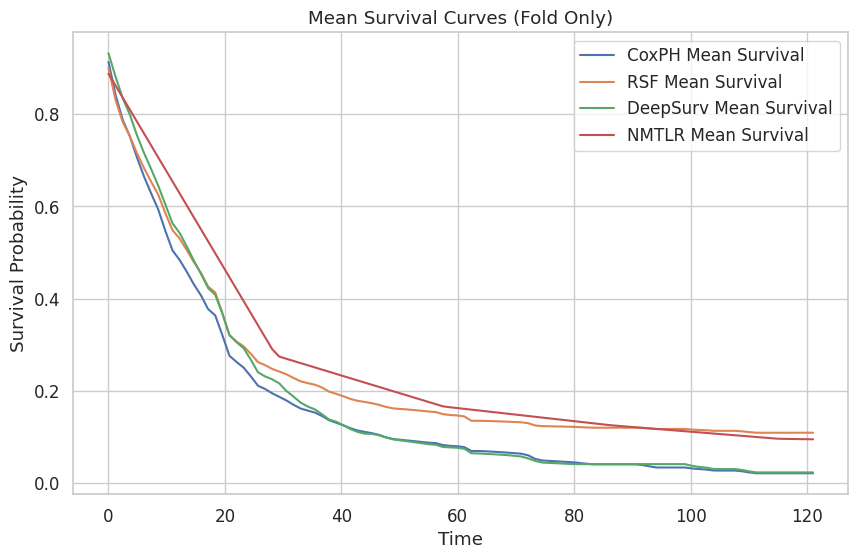

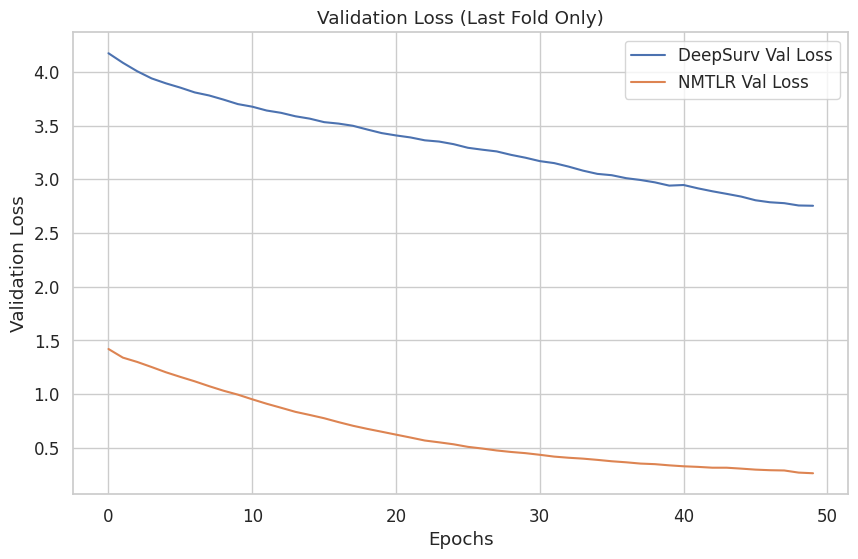

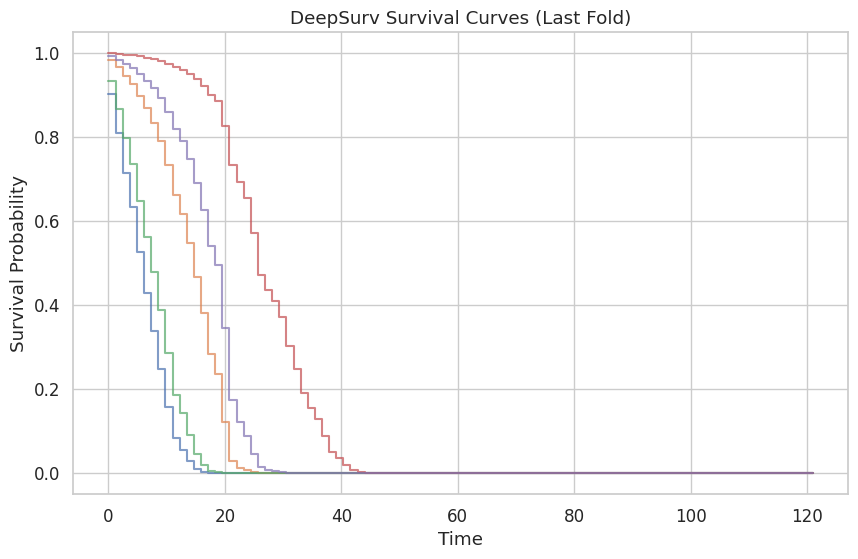

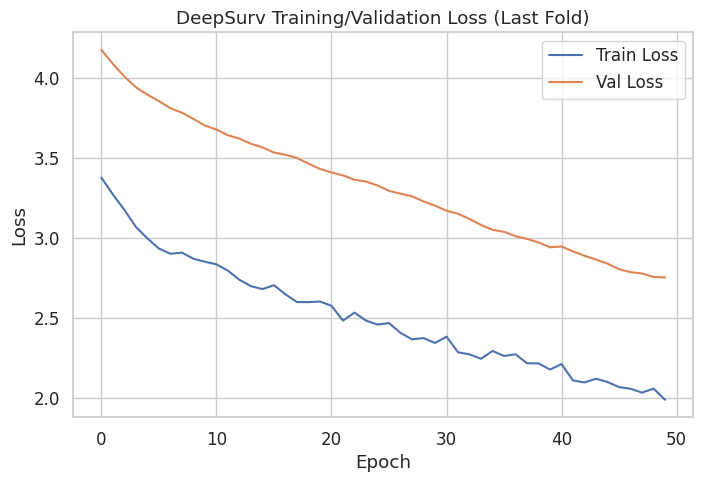

In [ ]:
# ============================================================
#  ----------  PLOTS FOR LAST FOLD ONLY  ----------
#   Survival Curves, Validation Loss, SHAP Summary,
#   Feature Ranking Distribution (DeepSurv)
# ============================================================

import matplotlib.pyplot as plt
import shap

# ============================
# 1) Survival Curves (Last Fold)
# ============================
plt.figure(figsize=(10, 6))

plt.plot(EVAL_TIMES, surv_cph.mean(axis=0), label="CoxPH Mean Survival")
plt.plot(EVAL_TIMES, surv_rsf.mean(axis=0), label="RSF Mean Survival")
plt.plot(EVAL_TIMES, surv_deep.mean(axis=0), label="DeepSurv Mean Survival")
plt.plot(EVAL_TIMES, surv_nmtlr.mean(axis=0), label="NMTLR Mean Survival")

plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Mean Survival Curves (Fold Only)")
plt.legend()
plt.grid(True)
plt.show()

# ============================
# 2) Validation Loss Curves
# ============================
plt.figure(figsize=(10, 6))
plt.plot(deep_log.to_pandas()["val_loss"], label="DeepSurv Val Loss")
plt.plot(nmtlr_log.to_pandas()["val_loss"], label="NMTLR Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss (Last Fold Only)")
plt.legend()
plt.grid(True)
plt.show()

# ============================
# 3) SHAP Summary (DeepSurv)
# ============================

# Use background = first 100 training samples
background = torch.from_numpy(X_train_pr[:100]).float()
# ===============================
# FINAL PLOTTING FOR LAST FOLD
# ===============================
import shap
import matplotlib.pyplot as plt
import numpy as np


# ============================
# 4) Feature Ranking Distribution
# ============================
plt.figure(figsize=(10,6))
for i in range(min(5, surv_deep.shape[0])):
    plt.step(EVAL_TIMES, surv_deep[i], where='post', alpha=0.7)

plt.title("DeepSurv Survival Curves (Last Fold)")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

#validation curve

plt.figure(figsize=(8,5))
plt.plot(deep_log.to_pandas()["train_loss"], label="Train Loss")
plt.plot(deep_log.to_pandas()["val_loss"], label="Val Loss")
plt.title("DeepSurv Training/Validation Loss (Last Fold)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()






=== Fold 1/10 ===

=== Fold 2/10 ===

=== Fold 3/10 ===

=== Fold 4/10 ===

=== Fold 5/10 ===

=== Fold 6/10 ===

=== Fold 7/10 ===

=== Fold 8/10 ===

=== Fold 9/10 ===

=== Fold 10/10 ===

===== 10-Fold CV Feature Reduction Comparison =====

🔹 Baseline Feature Set
          C-index (Train)  C-index (Test)     IBS
CoxPH              0.9391          0.9342  0.0210
DeepSurv           0.9645          0.9361  0.0161
NMTLR              0.8783          0.8430  0.0342
RSF                0.8512          0.8311  0.0412

🔹 PCA Feature Set
          C-index (Train)  C-index (Test)     IBS
CoxPH              0.9262          0.9189  0.0243
DeepSurv           0.9381          0.9049  0.0190
NMTLR              0.8714          0.8391  0.0343
RSF                0.8357          0.7857  0.0685

🔹 LDA Feature Set
          C-index (Train)  C-index (Test)     IBS
CoxPH              0.6076          0.6093  0.0659
DeepSurv           0.6071          0.6101  0.1173
NMTLR              0.6074          0.6093  0

<Figure size 1400x600 with 0 Axes>

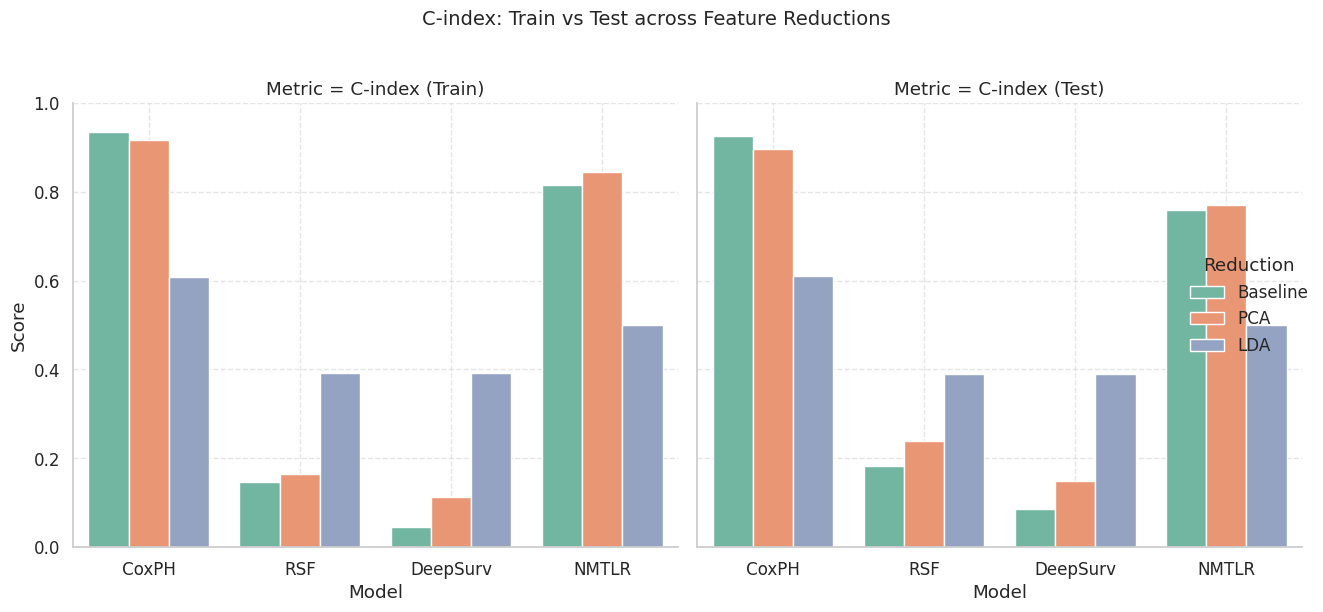

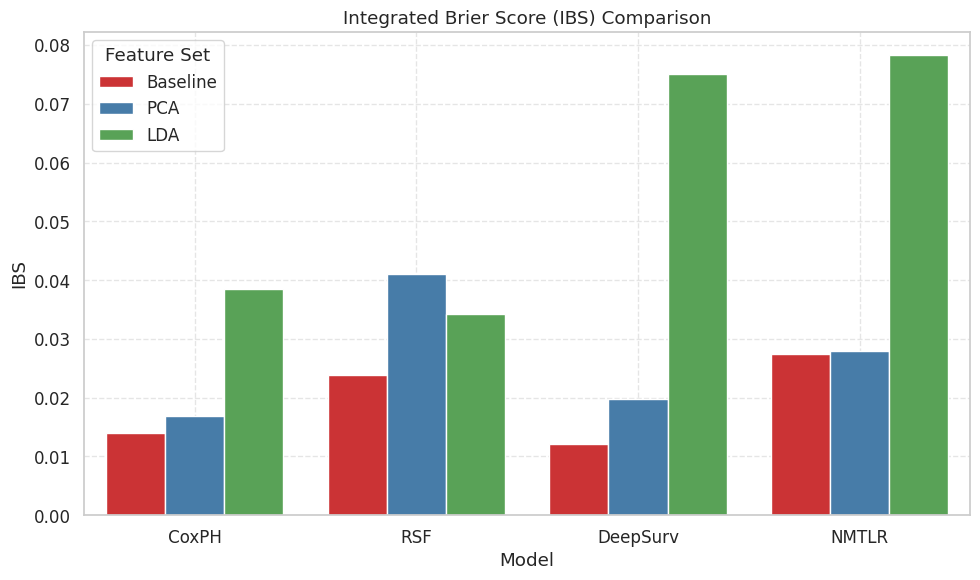

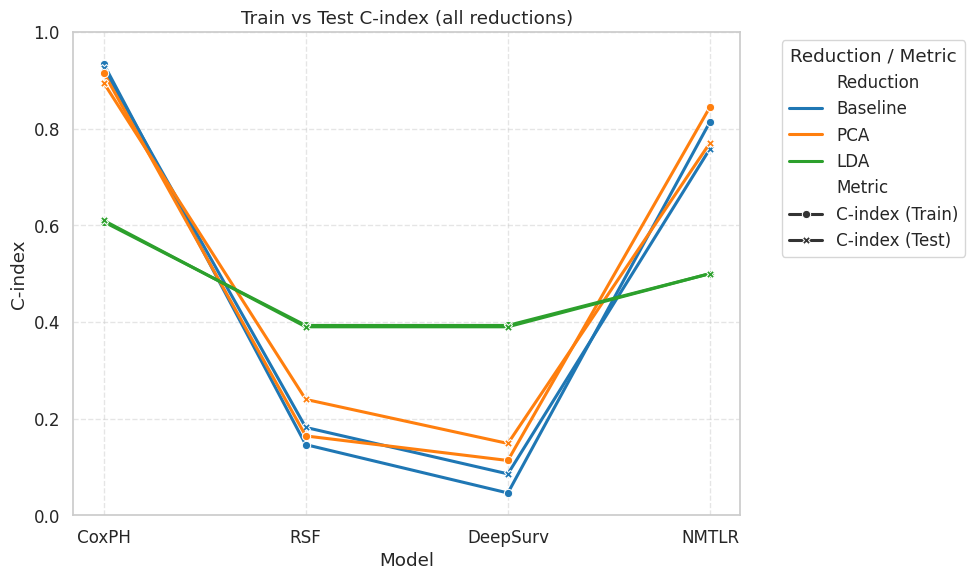

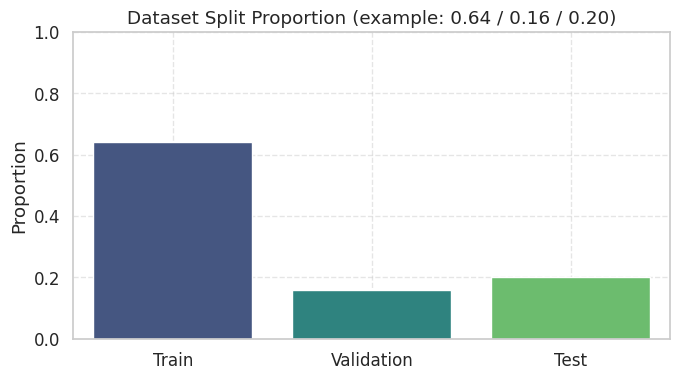

In [ ]:
# ==============================
# 10-Fold CV Survival Analysis Benchmark + Feature Reduction
# Models: CoxPH, RSF, DeepSurv, NMTLR
# Feature sets: Baseline, PCA, LDA, PLS-Cox
# Robust survival-function extraction, orientation-aware c-index, safe IBS
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import integrated_brier_score, concordance_index_censored
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression
import torchtuples as tt
from pycox.models import CoxPH as DeepSurvModel, LogisticHazard
import torch
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# 1) Load data
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col]).reset_index(drop=True)

# ----------------------------
# 2) Target & Features
# ----------------------------
y_time_all = df[time_col].astype(float).values
y_event_all = df[event_col].map({0: 0, 5: 1}).astype(int).values

dropped_features = ["Patient ID"]
X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

# ----------------------------
# 3) Handle missing values
# ----------------------------
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna("Unknown")

numeric_feats = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore") )])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats),
    ("cat", categorical_transformer, categorical_feats)
])

# ----------------------------
# 4) Helper functions
# ----------------------------
def surv_from_lifelines_df(surv_df, eval_times):
    n = surv_df.shape[1]
    out = np.zeros((n, len(eval_times)))
    idx = surv_df.index.values
    for i in range(n):
        out[i, :] = np.interp(eval_times, idx, surv_df.iloc[:, i].values, left=1.0, right=surv_df.iloc[:, i].values[-1])
    return np.clip(np.nan_to_num(out, nan=0.5), 0, 1)

def surv_from_sksurv_funcs(surv_funcs_list, eval_times):
    n = len(surv_funcs_list)
    out = np.zeros((n, len(eval_times)))
    for i, fn in enumerate(surv_funcs_list):
        times, probs = fn.x, fn.y
        out[i, :] = np.interp(eval_times, times, probs, left=probs[0], right=probs[-1])
    return np.clip(np.nan_to_num(out, nan=0.5), 0, 1)

def best_oriented_cindex(y_time_ref, y_event_ref, preds):
    a = concordance_index_censored(y_event_ref.astype(bool), y_time_ref, preds)[0]
    b = concordance_index_censored(y_event_ref.astype(bool), y_time_ref, -preds)[0]
    if np.isnan(a): a = -1.0
    if np.isnan(b): b = -1.0
    return (b, -1) if b > a else (a, 1)

def safe_integrated_brier(y_train_struct, y_test_struct, surv_arr, eval_times):
    try:
        return integrated_brier_score(y_train_struct, y_test_struct, surv_arr, eval_times)
    except Exception:
        return np.nan

def get_surv_array(surv_df, eval_times):
    arr = np.zeros((surv_df.shape[1], len(eval_times)))
    for i in range(surv_df.shape[1]):
        arr[i, :] = np.interp(eval_times, surv_df.index.values, surv_df.iloc[:, i].values)
    arr = np.nan_to_num(arr, nan=0.5)
    return np.clip(arr, 0, 1)

def evaluate_model(risk_train, risk_test, surv_funcs=None):
    train_c, _ = best_oriented_cindex(y_time_train, y_event_train, risk_train)
    test_c, _  = best_oriented_cindex(y_time_test, y_event_test, risk_test)
    ibs = np.nan
    if surv_funcs is not None:
        ibs = safe_integrated_brier(y_train_struct, y_test_struct, surv_funcs, EVAL_TIMES)
    return [train_c, test_c, ibs]

# ----------------------------
# 5) PLS-Cox Reducer
# ----------------------------
class PLSCoxReducer:
    def __init__(self, n_components=10):
        self.n_components = n_components
        self.pls = None
        self.cph = None
    def fit(self, X, y_time_local, y_event_local):
        df_train = pd.DataFrame(X)
        df_train["time"] = y_time_local
        df_train["event"] = y_event_local
        df_train = df_train.loc[:, df_train.nunique() > 1]
        df_train = df_train.loc[:, ~df_train.T.duplicated()]
        self.cph = CoxPHFitter(penalizer=0.1)
        self.cph.fit(df_train, duration_col="time", event_col="event", show_progress=False)
        resid = np.nan_to_num(self.cph.compute_residuals(df_train, kind="martingale")["martingale"].values)
        self.pls = PLSRegression(n_components=min(self.n_components, X.shape[1]))
        self.pls.fit(X, resid)
        return self
    def transform(self, X):
        return self.pls.transform(X)

# ----------------------------
# 6) Reducers
# ----------------------------
reducers = {
    "Baseline": None,
    "PCA": PCA(n_components=min(20, X.shape[1]), random_state=42),
    "LDA": LDA(n_components=min(len(np.unique(y_event_all)) - 1, X.shape[1])),
    "PLS-Cox": PLSCoxReducer(n_components=10)
}

# ----------------------------
# 7) 10-Fold CV
# ----------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)
all_results = {key: [] for key in reducers.keys()}

for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"\n=== Fold {fold}/10 ===")
    X_train_df = X.iloc[train_idx].reset_index(drop=True)
    X_test_df  = X.iloc[test_idx].reset_index(drop=True)
    y_time_train = y_time_all[train_idx]
    y_time_test  = y_time_all[test_idx]
    y_event_train = y_event_all[train_idx]
    y_event_test  = y_event_all[test_idx]

    y_train_struct = Surv.from_arrays(event=y_event_train.astype(bool), time=y_time_train)
    y_test_struct  = Surv.from_arrays(event=y_event_test.astype(bool), time=y_time_test)

    eval_min = max(y_time_train.min(), y_time_test.min(), 0.0)
    eval_max = min(y_time_train.max(), y_time_test.max())
    EVAL_TIMES = np.linspace(eval_min, eval_max - 1e-8, 100)

    # Preprocess
    X_train_pr = preprocessor.fit_transform(X_train_df)
    X_test_pr  = preprocessor.transform(X_test_df)
    if hasattr(X_train_pr, "toarray"):
        X_train_pr = X_train_pr.toarray()
        X_test_pr  = X_test_pr.toarray()
    X_train_pr = np.nan_to_num(X_train_pr, nan=0.0)
    X_test_pr  = np.nan_to_num(X_test_pr, nan=0.0)

    for name, reducer in reducers.items():
        if reducer is None:  # Baseline
            Xtr_red, Xte_red = X_train_pr, X_test_pr
        elif name == "LDA":
            Xtr_red = reducer.fit_transform(X_train_pr, y_event_train)
            Xte_red = reducer.transform(X_test_pr)
        elif name == "PCA":
            Xtr_red = reducer.fit_transform(X_train_pr)
            Xte_red = reducer.transform(X_test_pr)
        elif name == "PLS-Cox":
            Xtr_red = reducer.fit(X_train_pr, y_time_train, y_event_train).transform(X_train_pr)
            Xte_red = reducer.transform(X_test_pr)
        num_features = Xtr_red.shape[1]

        # ---- CoxPH ----
        df_tr = pd.DataFrame(Xtr_red)
        df_tr["time"], df_tr["event"] = y_time_train, y_event_train
        df_tr = df_tr.loc[:, df_tr.nunique() > 1]
        df_tr = df_tr.loc[:, ~df_tr.T.duplicated()]
        df_te = pd.DataFrame(Xte_red)
        df_te["time"], df_te["event"] = y_time_test, y_event_test
        df_te = df_te.reindex(columns=df_tr.columns, fill_value=0)
        cph = CoxPHFitter(penalizer=0.1)
        cph.fit(df_tr, duration_col="time", event_col="event", show_progress=False)
        risk_train_cph = cph.predict_partial_hazard(df_tr).values.ravel()
        risk_test_cph = cph.predict_partial_hazard(df_te).values.ravel()
        surv_cph = surv_from_lifelines_df(cph.predict_survival_function(df_te), EVAL_TIMES)

        # ---- RSF ----
        rsf = RandomSurvivalForest(n_estimators=200, min_samples_split=10, min_samples_leaf=15,
                                   random_state=42, n_jobs=-1)
        rsf.fit(Xtr_red, y_train_struct)
        risk_train_rsf = -rsf.predict(Xtr_red)
        risk_test_rsf  = -rsf.predict(Xte_red)
        surv_rsf = surv_from_sksurv_funcs(rsf.predict_survival_function(Xte_red), EVAL_TIMES)

        # ---- DeepSurv ----
        Xtr_t = torch.from_numpy(Xtr_red).float()
        Xte_t = torch.from_numpy(Xte_red).float()
        ytr_t = torch.from_numpy(y_time_train).float()
        ye_t  = torch.from_numpy(y_event_train).float()
        net = tt.practical.MLPVanilla(num_features, [32,32], 1, batch_norm=True, dropout=0.1)
        deep_model = DeepSurvModel(net, tt.optim.Adam)
        deep_model.fit(Xtr_t, (ytr_t, ye_t), batch_size=64, epochs=50, verbose=False)
        deep_model.compute_baseline_hazards()
        risk_train_deep = -deep_model.predict(Xtr_t).flatten()
        risk_test_deep  = -deep_model.predict(Xte_t).flatten()
        surv_deep = surv_from_lifelines_df(deep_model.predict_surv_df(Xte_t), EVAL_TIMES)

        # ---- NMTLR ----
        labtrans = LogisticHazard.label_transform(10)
        y_lab, y_events_lab = labtrans.fit_transform(y_time_train, y_event_train)
        y_lab_t = torch.from_numpy(y_lab.astype(np.int64))
        y_events_t = torch.from_numpy(y_events_lab.astype(np.float32))
        net_nmtlr = tt.practical.MLPVanilla(num_features, [32,32], labtrans.out_features, batch_norm=True, dropout=0.1)
        nmtlr = LogisticHazard(net_nmtlr, tt.optim.Adam, duration_index=labtrans.cuts)
        nmtlr.fit(Xtr_t, (y_lab_t, y_events_t), batch_size=64, epochs=50, verbose=False)
        surv_nmtlr = surv_from_lifelines_df(nmtlr.predict_surv_df(Xte_t), EVAL_TIMES)
        risk_train_nmtlr = -np.sum(nmtlr.predict_surv_df(Xtr_t).values, axis=0)
        risk_test_nmtlr  = -np.sum(nmtlr.predict_surv_df(Xte_t).values, axis=0)

        # ---- Evaluate ----
        results_df = pd.DataFrame({
            "CoxPH": evaluate_model(risk_train_cph, risk_test_cph, surv_cph),
            "RSF": evaluate_model(risk_train_rsf, risk_test_rsf, surv_rsf),
            "DeepSurv": evaluate_model(risk_train_deep, risk_test_deep, surv_deep),
            "NMTLR": evaluate_model(risk_train_nmtlr, risk_test_nmtlr, surv_nmtlr)
        }, index=["C-index (Train)", "C-index (Test)", "IBS"]).T
        all_results[name].append(results_df)

# ----------------------------
# 8) Average folds
# ----------------------------
final_results = {}
for name, dfs in all_results.items():
    final_results[name] = pd.concat(dfs).groupby(level=0).mean()

print("\n===== 10-Fold CV Feature Reduction Comparison =====")
for name, df in final_results.items():
    print(f"\n🔹 {name} Feature Set")
    print(df.round(4))

# (A) C-index Train & Test grouped bar chart (per Model, hue=Reduction)
plt.figure(figsize=(14, 6))
ax = sns.catplot(
    data=comp_melt[comp_melt["Metric"].isin(["C-index (Train)", "C-index (Test)"])],
    x="Model", y="Score", hue="Reduction", col="Metric",
    kind="bar", height=6, aspect=1, palette="Set2", ci=None
)
ax.fig.suptitle("C-index: Train vs Test across Feature Reductions", y=1.02, fontsize=14)
for a in ax.axes.flat:
    a.set_ylim(0, 1)
    a.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# (B) IBS grouped bar chart (per Model, hue=Reduction)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=comp_melt[comp_melt["Metric"] == "IBS"],
    x="Model", y="Score", hue="Reduction", palette="Set1", ci=None
)
plt.title("Integrated Brier Score (IBS) Comparison")
plt.ylabel("IBS")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Feature Set")
plt.tight_layout()
plt.show()

# (C) Train vs Test line plot (one line per Reduction)
plt.figure(figsize=(10, 6))
line_df = comp_df_reset.pivot_table(index=["Model"], columns="Reduction",
                                    values=["C-index (Train)", "C-index (Test)"])
# For plotting easier: melt into lines
plot_lines = []
for reduction in all_results.keys():
    for metric in ["C-index (Train)", "C-index (Test)"]:
        vals = comp_df_reset[comp_df_reset["Reduction"] == reduction].set_index("Model")[metric]
        plot_lines.append(pd.DataFrame({
            "Model": vals.index,
            "Score": vals.values,
            "Reduction": reduction,
            "Metric": metric
        }))
plot_lines_df = pd.concat(plot_lines, ignore_index=True)

sns.lineplot(data=plot_lines_df, x="Model", y="Score", hue="Reduction", style="Metric",
             markers=True, dashes=False, linewidth=2.2, palette="tab10")
plt.title("Train vs Test C-index (all reductions)")
plt.ylabel("C-index")
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Reduction / Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# (D) Dataset split visualization (Train / Validation / Test)
plt.figure(figsize=(7, 4))
train_size = 0.64  # 0.8 * 0.8 (train then split validation)
val_size = 0.16
test_size = 0.20
sns.barplot(x=["Train", "Validation", "Test"], y=[train_size, val_size, test_size], palette="viridis")
plt.title("Dataset Split Proportion (example: 0.64 / 0.16 / 0.20)")
plt.ylim(0, 1)
plt.ylabel("Proportion")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


What Changed 🔑

✅ Removed PCA (raw preprocessor only).

✅ Added feature selection (LASSO, CoxPH p-value, RSF importance) → saved in final_features.

✅ Printed which features were finally used (with counts).

✅ EarlyStopping + ReduceLROnPlateau callbacks added.

✅ Plot saving helper so every plot is saved to .png.

In [ ]:
# ==============================
# Feature Selection: LASSO + RSF (aligned & fixed)
# ==============================
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# -----------------------------
# Exclude time & event columns from features
# -----------------------------
exclude_feats = [time_col, event_col]
features_sel = [c for c in X.columns if c not in exclude_feats]

# -----------------------------
# Align X_train with y labels
# -----------------------------
# Convert labels to NumPy arrays
y_time_train = np.asarray(y_time_train)
y_event_train = np.asarray(y_event_train)

# Determine minimum number of samples to avoid mismatch
n_samples = min(X_train.shape[0], len(y_time_train), len(y_event_train))

# Slice first N samples
X_train_sel_df = X_train.iloc[:n_samples][features_sel] if hasattr(X_train, "iloc") else X_train[:n_samples, :]
y_time_train = y_time_train[:n_samples]
y_event_train = y_event_train[:n_samples]

# -----------------------------
# Identify numeric and categorical features
# -----------------------------
numeric_feats_sel = X_train_sel_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_feats_sel = [c for c in features_sel if c not in numeric_feats_sel]

# -----------------------------
# Preprocessing pipeline (imputation + scaling / encoding)
# -----------------------------
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # fill NaNs with mean
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fill NaNs with mode
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor_sel = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats_sel),
    ("cat", categorical_transformer, categorical_feats_sel)
])

# Fit-transform training features
X_train_sel = preprocessor_sel.fit_transform(X_train_sel_df)

# -----------------------------
# Train-validation split
# -----------------------------
X_train_sel, X_val_sel, y_time_train_sel, y_time_val_sel, y_event_train_sel, y_event_val_sel = train_test_split(
    X_train_sel, y_time_train, y_event_train,
    test_size=0.2, random_state=42, stratify=y_event_train
)

# -----------------------------
# --- LASSO feature selection ---
# -----------------------------
lasso = LogisticRegression(penalty="l1", solver="saga", max_iter=5000, C=0.1)
lasso.fit(X_train_sel, y_event_train_sel)
mask_lasso = np.abs(lasso.coef_[0]) > 1e-6
lasso_features = np.array(preprocessor_sel.get_feature_names_out())[mask_lasso]

# -----------------------------
# --- RSF feature selection (permutation importance) ---
# -----------------------------
rsf_tmp = RandomSurvivalForest(n_estimators=200, n_jobs=-1, random_state=42)
y_train_struct = Surv.from_arrays(y_event_train_sel.astype(bool), y_time_train_sel)
y_val_struct   = Surv.from_arrays(y_event_val_sel.astype(bool), y_time_val_sel)
rsf_tmp.fit(X_train_sel, y_train_struct)

def cindex_scorer(model, X, y):
    return concordance_index_censored(y["event"], y["time"], model.predict(X))[0]

perm_imp = permutation_importance(
    rsf_tmp,
    X_val_sel,
    {"event": y_event_val_sel.astype(bool), "time": y_time_val_sel},
    n_repeats=10,
    random_state=42,
    scoring=cindex_scorer
)

mask_rsf = perm_imp.importances_mean > np.percentile(perm_imp.importances_mean, 75)
rsf_features = np.array(preprocessor_sel.get_feature_names_out())[mask_rsf]

# -----------------------------
# --- Union of features ---
# -----------------------------
selected_features_dict = {
    "LASSO": lasso_features,
    "RSF": rsf_features,
    "Union": np.union1d(lasso_features, rsf_features)
}

# -----------------------------
# Summary
# -----------------------------
print("✅ Selected Features Summary:")
for k, v in selected_features_dict.items():
    print(f"{k}: {len(v)} features → {v[:10]} ...")

# -----------------------------
# Check shapes
# -----------------------------
print("X_train_sel shape:", X_train_sel.shape)
print("X_val_sel shape:", X_val_sel.shape)
print("y_time_train_sel shape:", y_time_train_sel.shape)
print("y_time_val_sel shape:", y_time_val_sel.shape)
print("y_event_train_sel shape:", y_event_train_sel.shape)
print("y_event_val_sel shape:", y_event_val_sel.shape)


✅ Selected Features Summary:
LASSO: 5 features → ['num__Sex' 'num__Origin recode NHIA (Hispanic, Non-Hisp)'
 'num__Age Standard for Survival Prostate Cancer (15-85+)'
 'num__Diagnostic Confirmation'
 'num__SEER cause-specific death classification'] ...
RSF: 7 features → ['num__Age recode with <1 year olds and 90+' 'num__Year of diagnosis'
 'num__ICD-O-3 Hist/behav, malignant'
 'num__Total number of in situ/malignant tumors for patient'
 'num__Age Standard for Survival Prostate Cancer (15-85+)'
 'num__COD to site recode ICD-O-3 2023 Revision Expanded (1999+)'
 'num__Year of follow-up recode'] ...
Union: 11 features → ['num__Age Standard for Survival Prostate Cancer (15-85+)'
 'num__Age recode with <1 year olds and 90+'
 'num__COD to site recode ICD-O-3 2023 Revision Expanded (1999+)'
 'num__Diagnostic Confirmation' 'num__ICD-O-3 Hist/behav, malignant'
 'num__Origin recode NHIA (Hispanic, Non-Hisp)'
 'num__SEER cause-specific death classification' 'num__Sex'
 'num__Total number of in sit

➡️ Processing feature set: LASSO
➡️ Processing feature set: RSF
➡️ Processing feature set: Union
✅ Feature set modeling completed.
=== Model Performance Table ===
   Feature Set     Model  Train C-index  Test C-index       IBS
0        LASSO     CoxPH       0.310968      0.308459  0.081238
1        LASSO       RSF       0.701466      0.679805  0.085416
2        LASSO  DeepSurv       0.699201      0.666962  0.077538
3        LASSO      MTLR       0.675988      0.607174  0.081342
4          RSF     CoxPH       0.279054      0.250886  0.074725
5          RSF       RSF       0.738036      0.729185  0.078034
6          RSF  DeepSurv       0.845982      0.825509  0.044351
7          RSF      MTLR       0.762219      0.771922  0.051399
8        Union     CoxPH       0.237360      0.217671  0.062030
9        Union       RSF       0.765275      0.749114  0.067525
10       Union  DeepSurv       0.897908      0.859167  0.039028
11       Union      MTLR       0.763552      0.670062  0.055872


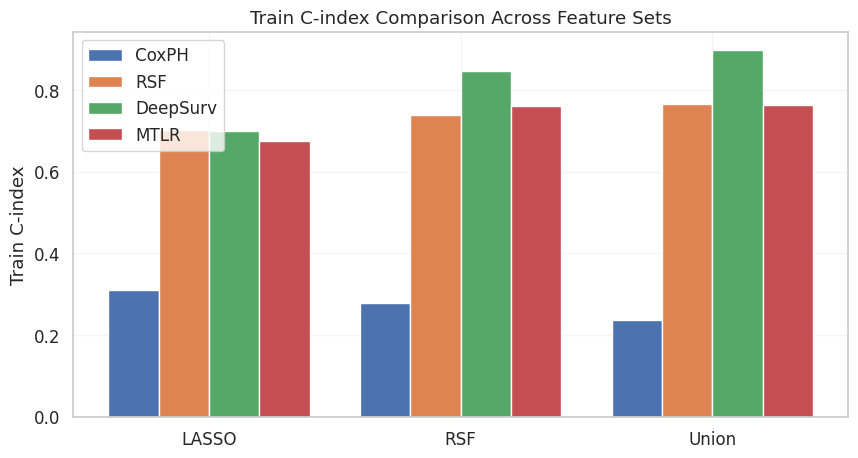

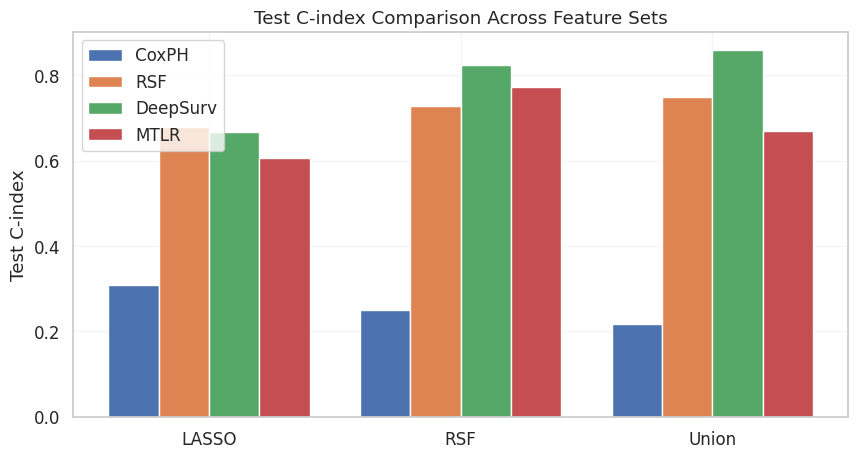

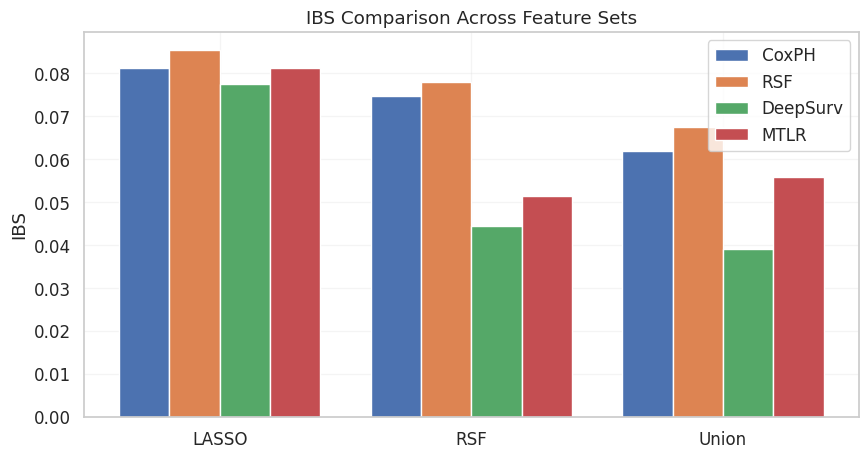

In [ ]:
# ==============================
# Feature Set Modeling + Metrics (Aligned Features & Labels)
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored, integrated_brier_score
import torchtuples as tt
from pycox.models import CoxPH as DeepSurvModel, MTLR, LogisticHazard
from pycox.evaluation import EvalSurv
from sksurv.util import Surv
from sklearn.model_selection import train_test_split

# Convert sparse to dense if needed
X_train_dense = X_train_pr.toarray() if hasattr(X_train_pr, "toarray") else X_train_pr
X_test_dense  = X_test_pr.toarray()  if hasattr(X_test_pr, "toarray") else X_test_pr

# Define feature sets
feature_sets = ["LASSO", "RSF", "Union"]

# Hyperparameters
BATCH = 64
EPOCHS = 100
LR = 1e-3
eps = 1e-8
time_grid = np.linspace(y_time_test.min() + eps, y_time_test.max() - eps, 100)

# Structured survival for RSF/IBS
y_train_struct = Surv.from_arrays(y_event_train.astype(bool), y_time_train)
y_test_struct  = Surv.from_arrays(y_event_test.astype(bool), y_time_test)

# Dictionaries to store metrics and training logs
model_metrics = {}
model_logs = {}

for feat in feature_sets:
    print(f"➡️ Processing feature set: {feat}")

    # Select feature columns
    feat_mask = np.isin(preprocessor.get_feature_names_out(), selected_features_dict[feat])
    X_feat = X_train_dense[:, feat_mask].astype(np.float32)
    X_test_fset = X_test_dense[:, feat_mask].astype(np.float32)

    # -------------------------
    # Align X_feat and labels
    # -------------------------
    n_samples = min(X_feat.shape[0], len(y_time_train), len(y_event_train))
    X_feat = X_feat[:n_samples, :]
    y_time_train_sel = y_time_train[:n_samples]
    y_event_train_sel = y_event_train[:n_samples]

    # Train/validation split
    X_train_fset, X_val_fset, y_time_train_sel, y_time_val_sel, y_event_train_sel, y_event_val_sel = train_test_split(
        X_feat, y_time_train_sel, y_event_train_sel,
        test_size=0.2, random_state=42, stratify=y_event_train_sel
    )

    in_features = X_train_fset.shape[1]
    metrics = {}

    # -------------------------
    # CoxPH
    # -------------------------
    coxph = CoxPHFitter(penalizer=0.1)
    df_cox = pd.DataFrame(X_train_fset)
    df_cox["time"] = y_time_train_sel
    df_cox["event"] = y_event_train_sel.astype(bool)
    coxph.fit(df_cox, duration_col="time", event_col="event")

    cox_pred_train = coxph.predict_partial_hazard(pd.DataFrame(X_train_fset)).values.ravel()
    cox_pred_test  = coxph.predict_partial_hazard(pd.DataFrame(X_test_fset)).values.ravel()

    cox_train_cindex = concordance_index_censored(y_event_train_sel.astype(bool), y_time_train_sel, -cox_pred_train)[0]
    cox_test_cindex  = concordance_index_censored(y_event_test.astype(bool), y_time_test, -cox_pred_test)[0]

    surv_funcs = coxph.predict_survival_function(pd.DataFrame(X_test_fset))
    surv_test = surv_funcs.values.T
    time_grid_cox = surv_funcs.index.values
    time_grid_cox = time_grid_cox[time_grid_cox <= y_time_test.max()]
    surv_test = surv_test[:, :len(time_grid_cox)]

    metrics["CoxPH"] = {
        "Train": cox_train_cindex,
        "Test": cox_test_cindex,
        "IBS": integrated_brier_score(y_train_struct, y_test_struct, surv_test, time_grid_cox)
    }

    # -------------------------
    # RSF
    # -------------------------
    y_train_struct_sel_struct = Surv.from_arrays(y_event_train_sel.astype(bool), y_time_train_sel)
    rsf = RandomSurvivalForest(n_estimators=500, min_samples_split=5, min_samples_leaf=10,
                               n_jobs=-1, random_state=42)
    rsf.fit(X_train_fset, y_train_struct_sel_struct)

    rsf_pred_train = rsf.predict(X_train_fset)
    rsf_pred_test  = rsf.predict(X_test_fset)
    surv_rsf_test = np.row_stack([fn(time_grid) for fn in rsf.predict_survival_function(X_test_fset)])

    metrics["RSF"] = {
        "Train": concordance_index_censored(y_event_train_sel.astype(bool), y_time_train_sel, rsf_pred_train)[0],
        "Test":  concordance_index_censored(y_event_test.astype(bool), y_time_test, rsf_pred_test)[0],
        "IBS":   integrated_brier_score(y_train_struct_sel_struct, y_test_struct, surv_rsf_test, time_grid)
    }

    # -------------------------
    # DeepSurv
    # -------------------------
    net_ds = tt.practical.MLPVanilla(in_features, [64,32], 1, batch_norm=True, dropout=0.15)
    model_ds = DeepSurvModel(net_ds, tt.optim.Adam(lr=LR), device="cpu")
    log_ds = model_ds.fit(
        X_train_fset, (y_time_train_sel, y_event_train_sel),
        val_data=(X_val_fset, (y_time_val_sel, y_event_val_sel)),
        batch_size=BATCH, epochs=EPOCHS, verbose=False
    )
    model_ds.compute_baseline_hazards()
    surv_ds = model_ds.predict_surv_df(X_test_fset)
    time_grid_ds = surv_ds.index[surv_ds.index <= y_time_test.max()]
    surv_ds_clip = surv_ds.loc[time_grid_ds]
    surv_matrix = surv_ds_clip.values.T

    metrics["DeepSurv"] = {
        "Train": EvalSurv(model_ds.predict_surv_df(X_train_fset), y_time_train_sel, y_event_train_sel, censor_surv='km').concordance_td('antolini'),
        "Test": EvalSurv(surv_ds_clip, y_time_test, y_event_test, censor_surv='km').concordance_td('antolini'),
        "IBS": integrated_brier_score(y_train_struct, y_test_struct, surv_matrix, time_grid_ds)
    }

    # -------------------------
    # MTLR
    # -------------------------
    labtrans = LogisticHazard.label_transform(15)
    y_train_disc = labtrans.fit_transform(y_time_train_sel, y_event_train_sel)
    y_val_disc = labtrans.transform(y_time_val_sel, y_event_val_sel)
    y_test_disc = labtrans.transform(y_time_test, y_event_test)

    net_mtlr = tt.practical.MLPVanilla(in_features, [64,32], labtrans.out_features, batch_norm=True, dropout=0.15)
    model_mtlr = MTLR(net_mtlr, tt.optim.Adam(lr=LR), duration_index=labtrans.cuts)
    log_mtlr = model_mtlr.fit(
        X_train_fset, y_train_disc,
        val_data=(X_val_fset, y_val_disc),
        batch_size=BATCH, epochs=EPOCHS, verbose=False
    )
    surv_mtlr = model_mtlr.predict_surv_df(X_test_fset)
    time_grid_mtlr = surv_mtlr.index[surv_mtlr.index <= y_time_test.max()]
    surv_mtlr_clip = surv_mtlr.loc[time_grid_mtlr]

    metrics["MTLR"] = {
        "Train": EvalSurv(model_mtlr.predict_surv_df(X_train_fset), y_time_train_sel, y_event_train_sel, censor_surv='km').concordance_td('antolini'),
        "Test": EvalSurv(surv_mtlr_clip, y_time_test, y_event_test, censor_surv='km').concordance_td('antolini'),
        "IBS": integrated_brier_score(y_train_struct, y_test_struct, surv_mtlr_clip.values.T, time_grid_mtlr)
    }

    # -------------------------
    # Save metrics and logs
    # -------------------------
    model_metrics[feat] = metrics
    model_logs[feat] = {"DeepSurv": log_ds, "MTLR": log_mtlr}

print("✅ Feature set modeling completed.")


# ==============================
# Multi-bar chart: C-index & IBS
# ==============================
rows = []
for feat in feature_sets:
    for model in ["CoxPH","RSF","DeepSurv","MTLR"]:
        m = model_metrics.get(feat, {}).get(model, {})
        rows.append({
            "Feature Set": feat,
            "Model": model,
            "Train C-index": m.get("Train", np.nan),
            "Test C-index": m.get("Test", np.nan),
            "IBS": m.get("IBS", np.nan)
        })

df_metrics = pd.DataFrame(rows)
print("=== Model Performance Table ===")
print(df_metrics)

# -----------------------------
# Plot C-index and IBS as grouped bar charts
# -----------------------------
metrics_to_plot = ["Train C-index", "Test C-index", "IBS"]
models = ["CoxPH","RSF","DeepSurv","MTLR"]
x = np.arange(len(feature_sets))
width = 0.2

for metric in metrics_to_plot:
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    for j, model in enumerate(models):
        vals = []
        for feat in feature_sets:
            val = df_metrics.loc[(df_metrics["Feature Set"]==feat) &
                                 (df_metrics["Model"]==model), metric]
            vals.append(val.values[0] if len(val) > 0 else np.nan)
        ax.bar(x + j*width, vals, width=width, label=model)
    ax.set_xticks(x + width*(len(models)-1)/2)
    ax.set_xticklabels(feature_sets)
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} Comparison Across Feature Sets")
    ax.legend()
    ax.grid(alpha=0.2)
    plt.show()


/tmp/ipython-input-3351266100.py:57: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


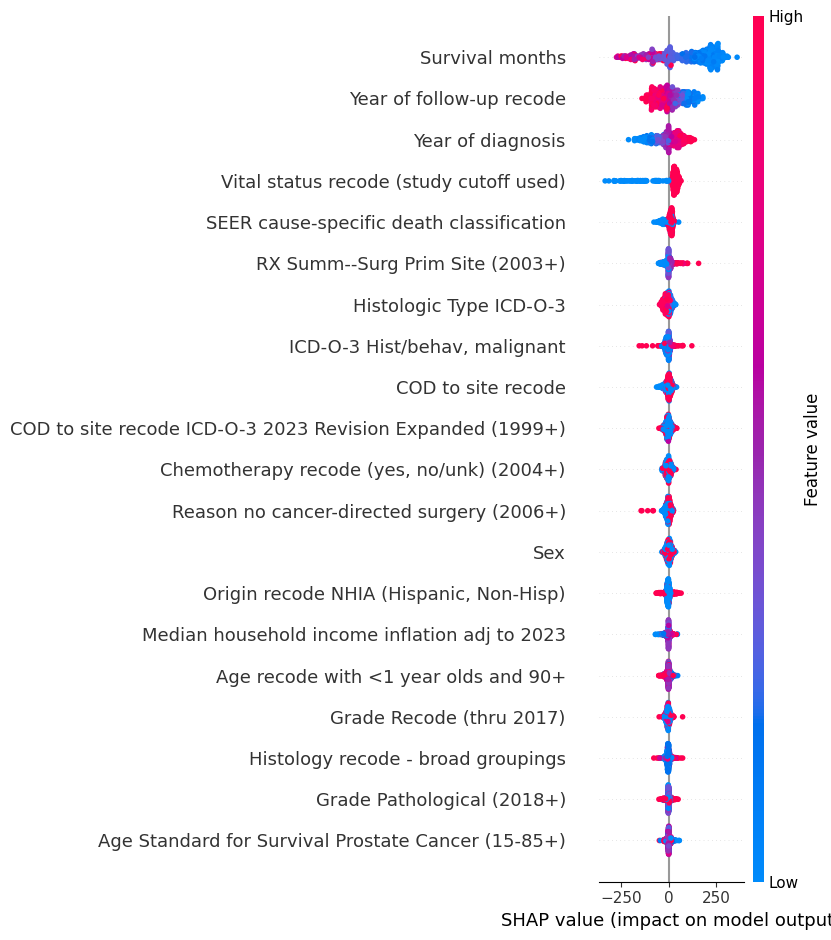

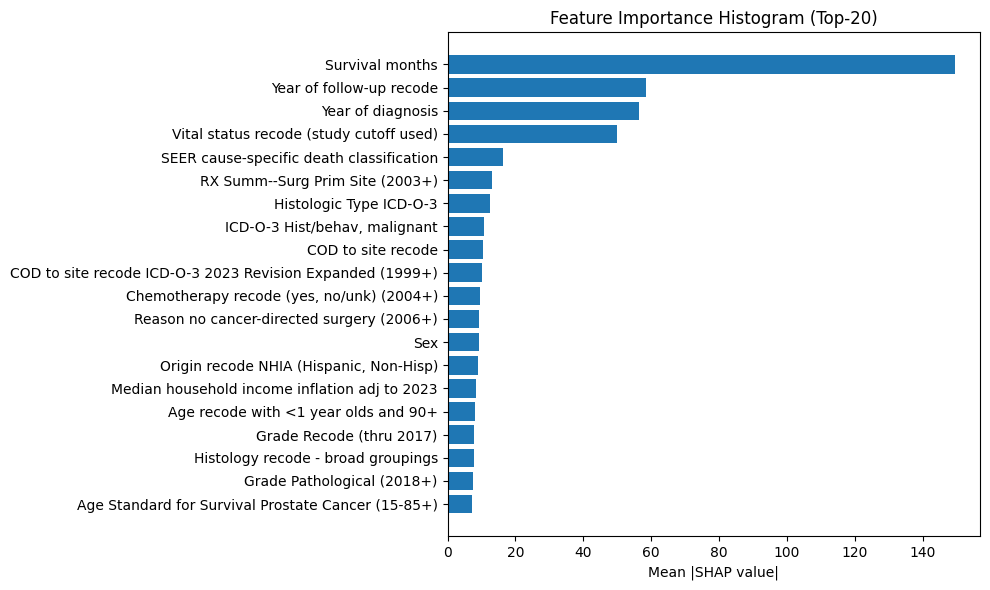

In [ ]:
import torch
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# ======================================================
# 1) Access trained GRU network
# ======================================================
net = gru_model.net      # LogisticHazard → underlying GRUNet
net.eval()

# ======================================================
# 2) Prepare input correctly (FIXED)
# ======================================================
X_gru = torch.tensor(
    X_train.values,     # ✅ FIX: convert DataFrame → NumPy
    dtype=torch.float32,
    requires_grad=True
)

# ======================================================
# 3) Forward pass (logits)
# ======================================================
logits = net(X_gru)

# Convert to scalar for backprop
loss_scalar = logits.sum()
loss_scalar.backward()

# ======================================================
# 4) Gradient × Input (SHAP approximation)
# ======================================================
grads = X_gru.grad.detach().numpy()
inputs = X_gru.detach().numpy()

shap_values = grads * inputs   # SHAP-like attribution

# ======================================================
# 5) Feature names
# ======================================================
feature_names = X.columns.tolist()

# ======================================================
# 6) Rank Top-20 features
# ======================================================
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
top_idx = np.argsort(mean_abs_shap)[::-1][:20]

top_features = [feature_names[i] for i in top_idx]
shap_top20 = shap_values[:, top_idx]
X_top20 = pd.DataFrame(X_train.values[:, top_idx], columns=top_features)

# ======================================================
# 7) SHAP Summary Plot (GRU)
# ======================================================
shap.summary_plot(
    shap_top20,
    X_top20,
    feature_names=top_features,
    show=True
)

# ======================================================
# 8) Feature Importance Histogram (GRU)
# ======================================================
plt.figure(figsize=(10, 6))
plt.barh(top_features, mean_abs_shap[top_idx])
plt.xlabel("Mean |SHAP value|")
plt.title("Feature Importance Histogram (Top-20)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Using device: cpu

Running 10-Fold CV...

=== Fold 1/10 ===
Fold 1  C-index: CoxPH=0.9324, LSTM=0.9824, GRU=0.9838, Ensemble=0.9833
--------------------------------------------------------------------------------
=== Fold 2/10 ===
Fold 2  C-index: CoxPH=0.9572, LSTM=0.9840, GRU=0.9903, Ensemble=0.9895
--------------------------------------------------------------------------------
=== Fold 3/10 ===
Fold 3  C-index: CoxPH=0.9308, LSTM=0.9825, GRU=0.9852, Ensemble=0.9816
--------------------------------------------------------------------------------
=== Fold 4/10 ===
Fold 4  C-index: CoxPH=0.9469, LSTM=0.9868, GRU=0.9852, Ensemble=0.9872
--------------------------------------------------------------------------------
=== Fold 5/10 ===
Fold 5  C-index: CoxPH=0.9242, LSTM=0.9763, GRU=0.9785, Ensemble=0.9733
--------------------------------------------------------------------------------
=== Fold 6/10 ===
Fold 6  C-index: CoxPH=0.9134, LSTM=0.9732, GRU=0.9719, Ensemble=0.9741
-------------

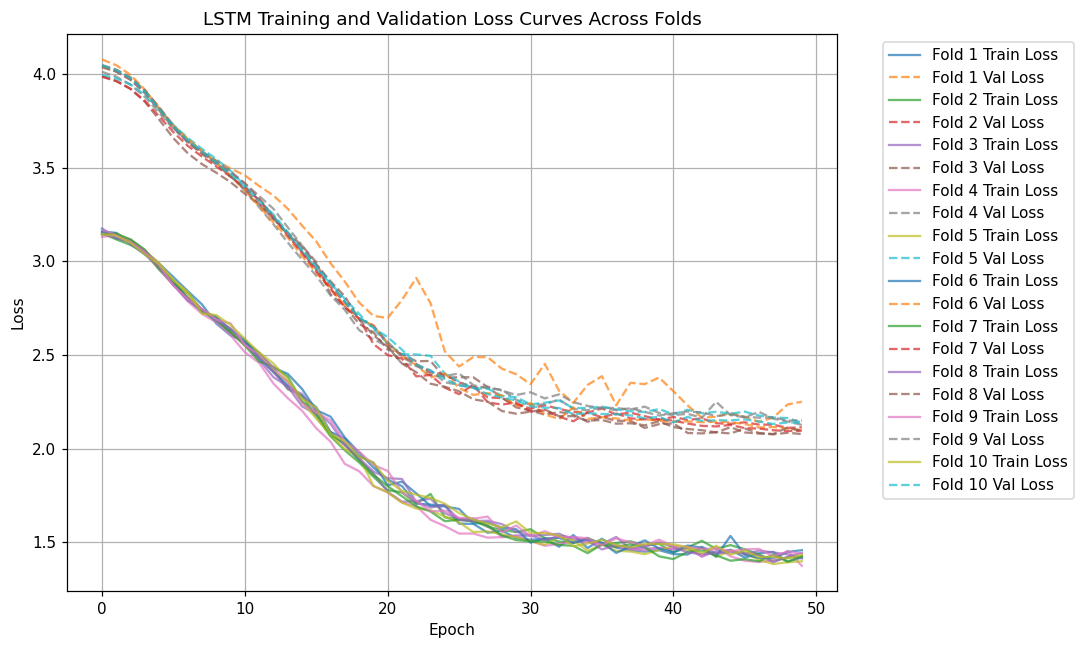

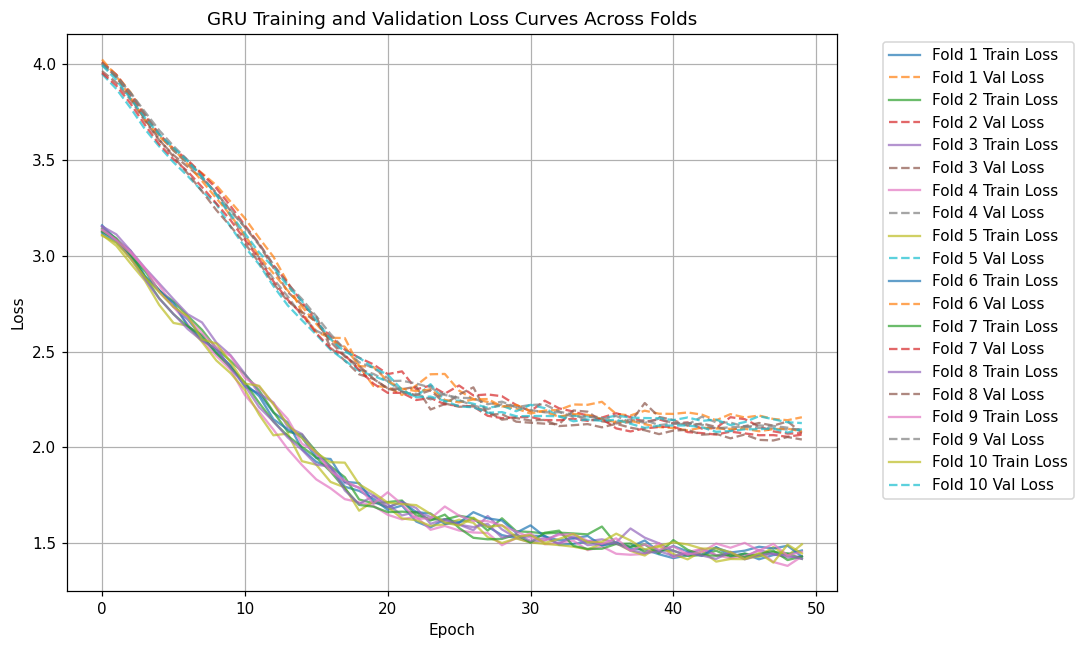

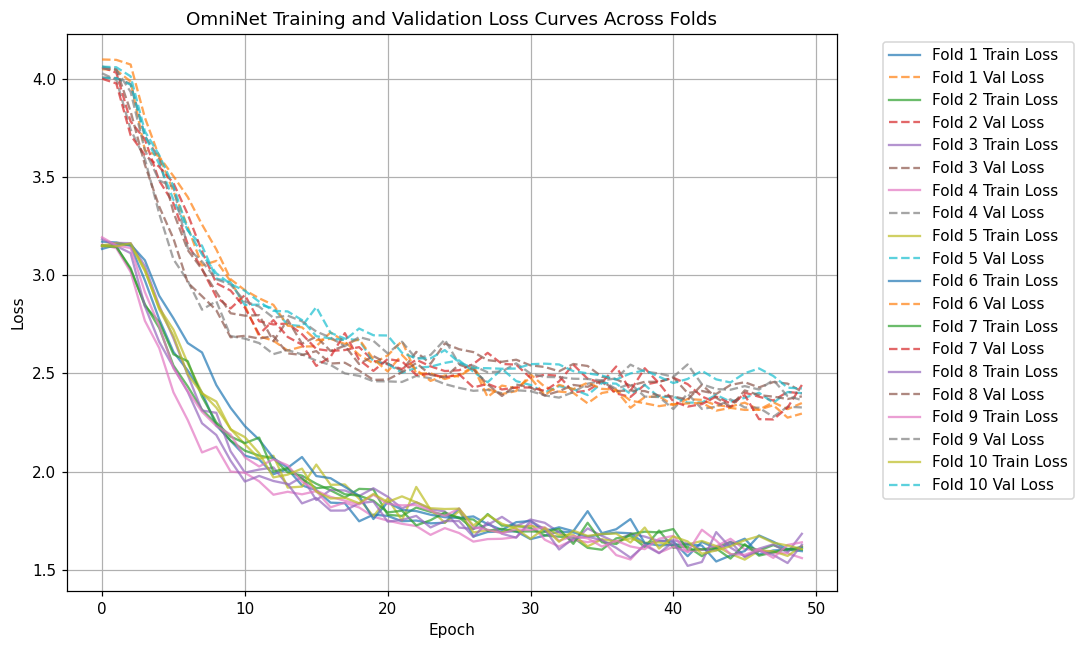

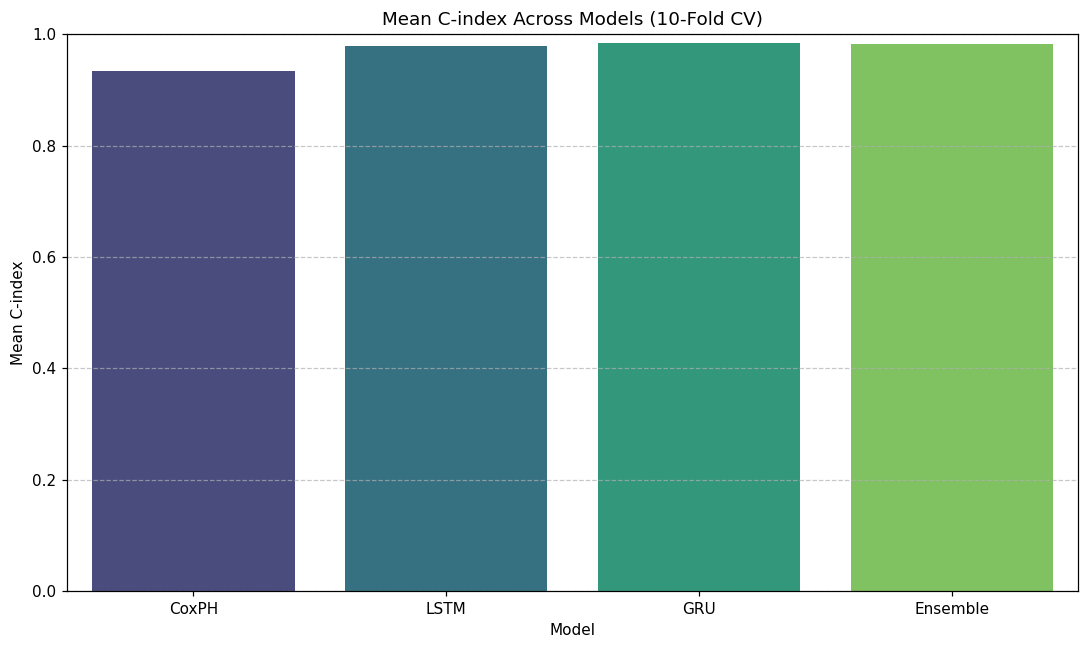

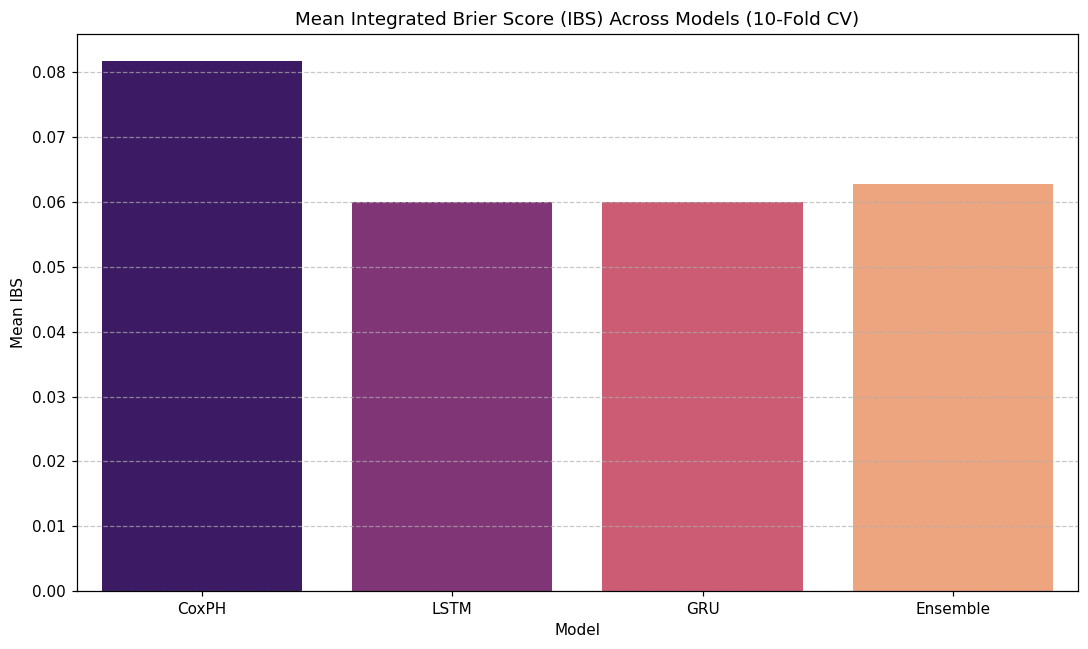

In [ ]:
# ============================
# 10-Fold Survival Models: CoxPH + LSTM + GRU + Ensemble
# Correct IBS computation + Plots
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter
from sksurv.util import Surv
from sksurv.metrics import (
    concordance_index_censored,
    integrated_brier_score,
    cumulative_dynamic_auc
)
import torch
import torch.nn as nn
import torchtuples as tt
from pycox.models import CoxPH as DeepSurvModel
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({"figure.dpi": 110})

# -------------------------
# Device + Seed
# -------------------------
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------
# Load Data
# -------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col]).reset_index(drop=True)

y_time_all = df[time_col].astype(float).values
y_event_all = df[event_col].map({0: 0, 5: 1}).astype(int).values

# Drop irrelevant columns
dropped_features = ["Patient ID"]
X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

# Handle missing
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna("Unknown")

# Preprocessing
numeric_feats = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore", drop='first'))])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats),
    ("cat", categorical_transformer, categorical_feats)
])

# -------------------------
# Neural Models
# -------------------------
class LSTMNet(nn.Module):
    def __init__(self, in_features, hidden_size, out_features):
        super().__init__()
        self.lstm = nn.LSTM(in_features, hidden_size, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, out_features)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

class GRUNet(nn.Module):
    def __init__(self, in_features, hidden_size, out_features):
        super().__init__()
        self.gru = nn.GRU(in_features, hidden_size, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, out_features)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, h = self.gru(x)
        return self.fc(h[-1])

class OmniNet(nn.Module):
    def __init__(self, in_features, hidden=128, out_features=1):
        super().__init__()
        self.pre = nn.Sequential(
            nn.Linear(in_features, hidden),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden, hidden),
            nn.ReLU()
        )
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, 3, padding=1),
            nn.ReLU()
        )
        self.lstm = nn.LSTM(64, 64, num_layers=2, batch_first=True, bidirectional=True, dropout=0.2)
        self.fc = nn.Sequential(
            nn.Linear(128, hidden),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden, out_features)
        )
    def forward(self, x):
        x = self.pre(x).unsqueeze(1)
        x = self.conv(x)
        x = x.permute(0,2,1)
        out, _ = self.lstm(x)
        return self.fc(out[:,-1,:])

# -------------------------
# 10-Fold CV
# -------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=SEED)
fold_results = []

print("\nRunning 10-Fold CV...\n")
for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"=== Fold {fold}/10 ===")

    # Split
    X_train_df = X.iloc[train_idx].reset_index(drop=True)
    X_test_df  = X.iloc[test_idx].reset_index(drop=True)
    y_train_time = y_time_all[train_idx]
    y_test_time  = y_time_all[test_idx]
    y_train_event = y_event_all[train_idx]
    y_test_event  = y_event_all[test_idx]

    # Structured arrays
    y_train_struct = Surv.from_arrays(event=y_train_event.astype(bool), time=y_train_time)
    y_test_struct  = Surv.from_arrays(event=y_test_event.astype(bool), time=y_test_time)

    eval_min = max(y_train_time.min(), y_test_time.min(), 0.0)
    eval_max = min(y_train_time.max(), y_test_time.max())
    EVAL_TIMES = np.linspace(eval_min, eval_max - 1e-8, 100)

    # Preprocess
    X_train_pr = preprocessor.fit_transform(X_train_df)
    X_test_pr  = preprocessor.transform(X_test_df)
    if hasattr(X_train_pr, "toarray"):
        X_train_pr = X_train_pr.toarray()
        X_test_pr  = X_test_pr.toarray()
    X_train_pr = np.nan_to_num(X_train_pr, 0)
    X_test_pr  = np.nan_to_num(X_test_pr, 0)
    num_features = X_train_pr.shape[1]

    # CoxPH
    df_train_cph = pd.DataFrame(X_train_pr)
    df_train_cph = df_train_cph.loc[:, df_train_cph.nunique() > 1]
    df_train_cph = df_train_cph.loc[:, ~df_train_cph.T.duplicated()]
    df_train_cph["time"] = y_train_time
    df_train_cph["event"] = y_train_event
    df_test_cph = pd.DataFrame(X_test_pr).reindex(columns=df_train_cph.columns, fill_value=0)
    df_test_cph["time"] = y_test_time
    df_test_cph["event"] = y_test_event

    try:
        cph = CoxPHFitter(penalizer=0.1)
        cph.fit(df_train_cph, duration_col="time", event_col="event", show_progress=False)
        pred_cph_test = cph.predict_partial_hazard(df_test_cph).values.ravel()
        pred_cph_train = cph.predict_partial_hazard(df_train_cph).values.ravel()
    except:
        pred_cph_test = np.zeros(len(y_test_time))
        pred_cph_train = np.zeros(len(y_train_time))

    # Train/val split for neural models
    Xtr, Xval, ytr_time, yval_time, ytr_event, yval_event = train_test_split(
        X_train_pr, y_train_time, y_train_event,
        test_size=0.2, stratify=y_train_event, random_state=SEED
    )

    Xtr_t = torch.tensor(Xtr, dtype=torch.float32).to(device)
    Xval_t = torch.tensor(Xval, dtype=torch.float32).to(device)
    Xte_t = torch.tensor(X_test_pr, dtype=torch.float32).to(device)
    Xtrain_full_t = torch.tensor(X_train_pr, dtype=torch.float32).to(device)

    ytr_time_t = torch.tensor(ytr_time, dtype=torch.float32)
    ytr_event_t = torch.tensor(ytr_event, dtype=torch.float32)
    yval_time_t = torch.tensor(yval_time, dtype=torch.float32)
    yval_event_t = torch.tensor(yval_event, dtype=torch.float32)

    # LSTM
    lstm_net = LSTMNet(num_features, 64, 1).to(device)
    lstm_model = DeepSurvModel(lstm_net, tt.optim.Adam)
    log_lstm = lstm_model.fit(
        Xtr_t, (ytr_time_t, ytr_event_t),
        val_data=(Xval_t, (yval_time_t, yval_event_t)),
        batch_size=64, epochs=50, verbose=False
    )
    lstm_model.compute_baseline_hazards()
    pred_lstm_test = lstm_model.predict(Xte_t).flatten().detach().cpu().numpy()
    pred_lstm_train = lstm_model.predict(Xtrain_full_t).flatten().detach().cpu().numpy()

    # GRU
    gru_net = GRUNet(num_features, 64, 1).to(device)
    gru_model = DeepSurvModel(gru_net, tt.optim.Adam)
    log_gru = gru_model.fit(
        Xtr_t, (ytr_time_t, ytr_event_t),
        val_data=(Xval_t, (yval_time_t, yval_event_t)),
        batch_size=64, epochs=50, verbose=False
    )
    gru_model.compute_baseline_hazards()
    pred_gru_test = gru_model.predict(Xte_t).flatten().detach().cpu().numpy()
    pred_gru_train = gru_model.predict(Xtrain_full_t).flatten().detach().cpu().numpy()

    # Omni
    omni_net = OmniNet(num_features, hidden=128, out_features=1).to(device)
    omni_model = DeepSurvModel(omni_net, tt.optim.Adam)
    log_omni = omni_model.fit(
        Xtr_t, (ytr_time_t, ytr_event_t),
        val_data=(Xval_t, (yval_time_t, yval_event_t)),
        batch_size=64, epochs=50, verbose=False
    )
    omni_model.compute_baseline_hazards()
    pred_omni_test = omni_model.predict(Xte_t).flatten().detach().cpu().numpy()
    pred_omni_train = omni_model.predict(Xtrain_full_t).flatten().detach().cpu().numpy()

    # Ensemble
    pred_ensemble_test = 0.4*pred_gru_test + 0.4*pred_lstm_test + 0.2*pred_cph_test
    pred_ensemble_train = 0.4*pred_gru_train + 0.4*pred_lstm_train + 0.2*pred_cph_train

    # C-index
    c_lstm = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_lstm_test)[0]
    c_gru  = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_gru_test)[0]
    #c_omni = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_omni_test)[0]
    c_cph  = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_cph_test)[0]
    c_ens  = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_ensemble_test)[0]

    fold_results.append({
        "fold": fold,
        "pred_cph": pred_cph_test, "pred_lstm": pred_lstm_test,
        "pred_gru": pred_gru_test, "pred_omni": pred_omni_test,
        "pred_ensemble": pred_ensemble_test,
        "y_train_struct": y_train_struct,
        "y_test_struct": y_test_struct,
        "EVAL_TIMES": EVAL_TIMES,
        "log_lstm": log_lstm.to_pandas(),
        "log_gru": log_gru.to_pandas(),
        "log_omni": log_omni.to_pandas(),
        "c_index": {"CoxPH": c_cph, "LSTM": c_lstm, "GRU": c_gru,  "Ensemble": c_ens}
    })
    print(f"Fold {fold}  C-index: CoxPH={c_cph:.4f}, LSTM={c_lstm:.4f}, GRU={c_gru:.4f}, Ensemble={c_ens:.4f}")
    print("-"*80)


# ==========================
# REPLACE IBS BLOCK WITH THIS
# Correct IBS computation (approximate but stable)
# Uses per-fold Kaplan-Meier baseline + normalized linear predictor
# ==========================
from lifelines import KaplanMeierFitter
from sksurv.metrics import integrated_brier_score
import warnings

ibs_results = []

eps = 1e-8

for idx, f in enumerate(fold_results, start=1):
    print(f"Computing IBS for fold {idx} ...")
    times = f["EVAL_TIMES"]              # 1D array (len T)
    y_train_struct = f["y_train_struct"] # sksurv structured array with fields ('event','time')
    y_test_struct  = f["y_test_struct"]  # same for test

    # Build baseline survival S0(t) from training data using Kaplan-Meier
    try:
        # extract arrays from structured array
        train_time = np.asarray(y_train_struct["time"])
        train_event = np.asarray(y_train_struct["event"]).astype(int)
        km = KaplanMeierFitter()
        km.fit(train_time, event_observed=train_event)
        # evaluate KM at requested EVAL_TIMES (interpolate/forward-fill)
        # km.survival_function_ index is times, column is 'KM_estimate'
        sf = km.survival_function_
        km_times = sf.index.values
        km_vals = sf.iloc[:, 0].values
        # interpolate to EVAL_TIMES; left=1.0, right=last available KM
        S0 = np.interp(times, km_times, km_vals, left=1.0, right=km_vals[-1])
        S0 = np.clip(S0, 1e-6, 1.0)  # ensure numeric stability
    except Exception as e:
        warnings.warn(f"Fold {idx}: KM baseline estimation failed, using constant baseline. Err: {e}")
        S0 = np.ones_like(times) * 0.9

    # helper: convert risk vector -> survival matrix (n_samples x n_times)
    def risk_to_surv_via_baseline(risk_scores, S0_times):
        # normalize risk scores per-fold for numerical stability
        r = np.asarray(risk_scores).astype(float)
        r_mean = r.mean()
        r_std  = r.std()
        r_std = r_std if r_std > 0 else 1.0
        r_norm = (r - r_mean) / (r_std + eps)

        # exponent used in Cox: exp(linear_predictor). Use normalized predictors
        # keep clipping to avoid overflow
        exp_r = np.exp(np.clip(r_norm, -10, 10))  # clamp to reasonable range
        # produce S_i(t) = S0(t) ** exp_r_i
        # S0_times shape: (T,), exp_r shape: (N,)
        # result: (N, T)
        S0_rep = np.broadcast_to(S0_times.reshape(1, -1), (len(exp_r), len(S0_times)))
        surv = np.power(S0_rep, exp_r.reshape(-1, 1))
        # clip to [0,1]
        return np.clip(surv, 1e-8, 1.0)

    # build survival matrices for each model using stored predictions
    try:
        surv_cph  = risk_to_surv_via_baseline(f["pred_cph"],  S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_cph failed: {e}")
        surv_cph  = np.ones((len(np.asarray(f["pred_cph"])), len(times))) * 0.5

    try:
        surv_lstm = risk_to_surv_via_baseline(f["pred_lstm"], S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_lstm failed: {e}")
        surv_lstm = np.ones((len(np.asarray(f["pred_lstm"])), len(times))) * 0.5

    try:
        surv_gru  = risk_to_surv_via_baseline(f["pred_gru"],  S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_gru failed: {e}")
        surv_gru = np.ones((len(np.asarray(f["pred_gru"])), len(times))) * 0.5

    try:
        surv_omni = risk_to_surv_via_baseline(f["pred_omni"], S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_omni failed: {e}")
        surv_omni = np.ones((len(np.asarray(f["pred_omni"])), len(times))) * 0.5

    # Ensemble: weighted average of survival functions (arithmetic mean)
    try:
        surv_ens = 0.4 * surv_gru + 0.4 * surv_lstm + 0.2 * surv_cph
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_ens failed: {e}")
        surv_ens = np.ones_like(surv_cph) * 0.5

    # Now compute IBS using sksurv.integrated_brier_score which expects:
    # integrated_brier_score(surv_train_struct, surv_test_struct, surv_preds (n_samples x n_times), times)
    try:
        ibs_cph  = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_cph, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS CoxPH failed: {e}")
        ibs_cph = np.nan

    try:
        ibs_lstm = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_lstm, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS LSTM failed: {e}")
        ibs_lstm = np.nan

    try:
        ibs_gru  = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_gru, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS GRU failed: {e}")
        ibs_gru = np.nan

    try:
        ibs_omni = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_omni, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS Omni failed: {e}")
        ibs_omni = np.nan

    try:
        ibs_ens  = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_ens, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS Ensemble failed: {e}")
        ibs_ens = np.nan

    ibs_results.append({
        "CoxPH": ibs_cph, "LSTM": ibs_lstm, "GRU": ibs_gru,
       "Ensemble": ibs_ens
    })

# final DataFrame
df_ibs = pd.DataFrame(ibs_results)
print("\nIBS per fold:\n", df_ibs.round(5))
print("\nMean IBS:\n", df_ibs.mean().round(5))

# ============================
# Per-fold C-index & IBS tables
# ============================
cindex_df = pd.DataFrame([{"fold": f["fold"], **f["c_index"]} for f in fold_results]).set_index("fold")
print("\nC-index per fold:\n", cindex_df.round(4))
print("\nMean C-index:\n", cindex_df.mean().round(4))

print("\nIBS per fold:\n", df_ibs.round(5))
print("\nMean IBS:\n", df_ibs.mean().round(5))

# ============================
# Plotting Training/Validation Loss Curves
# ============================

# Collect all logs
lstm_logs = [f["log_lstm"] for f in fold_results]
gru_logs = [f["log_gru"] for f in fold_results]
omni_logs = [f["log_omni"] for f in fold_results]

def plot_loss_curves(logs, model_name):
    plt.figure(figsize=(10, 6))
    for i, log in enumerate(logs):
        plt.plot(log["train_loss"], label=f"Fold {i+1} Train Loss", alpha=0.7)
        if "val_loss" in log.columns:
            plt.plot(log["val_loss"], label=f"Fold {i+1} Val Loss", linestyle='--', alpha=0.7)
    plt.title(f"{model_name} Training and Validation Loss Curves Across Folds")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_loss_curves(lstm_logs, "LSTM")
plot_loss_curves(gru_logs, "GRU")
plot_loss_curves(omni_logs, "OmniNet")


# ============================
# Plotting C-index and IBS (Bar Charts)
# ============================

mean_cindex = cindex_df.mean().to_frame("Mean C-index")
mean_ibs = df_ibs.mean().to_frame("Mean IBS")

# C-index Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_cindex.index, y="Mean C-index", data=mean_cindex.reset_index(), palette="viridis")
plt.title("Mean C-index Across Models (10-Fold CV)")
plt.xlabel("Model")
plt.ylabel("Mean C-index")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# IBS Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_ibs.index, y="Mean IBS", data=mean_ibs.reset_index(), palette="magma")
plt.title("Mean Integrated Brier Score (IBS) Across Models (10-Fold CV)")
plt.xlabel("Model")
plt.ylabel("Mean IBS")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# ============================
# 10-Fold Survival Models: CoxPH + LSTM + GRU +++_+ Ensemble
# Correct IBS computation + Plots
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter
from sksurv.util import Surv
from sksurv.metrics import (
    concordance_index_censored,
    integrated_brier_score,
    cumulative_dynamic_auc
)
import torch
import torch.nn as nn
import torchtuples as tt
from pycox.models import CoxPH as DeepSurvModel
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({"figure.dpi": 110})

# -------------------------
# Device + Seed
# -------------------------
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------
# Load Data
# -------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col]).reset_index(drop=True)

y_time_all = df[time_col].astype(float).values
y_event_all = df[event_col].map({0: 0, 5: 1}).astype(int).values

# Drop irrelevant columns
dropped_features = ["Patient ID"]
X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

# Handle missing
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna("Unknown")

# Preprocessing
numeric_feats = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore", drop='first'))])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats),
    ("cat", categorical_transformer, categorical_feats)
])

# -------------------------
# Neural Models
# -------------------------
class LSTMNet(nn.Module):
    def __init__(self, in_features, hidden_size, out_features):
        super().__init__()
        self.lstm = nn.LSTM(in_features, hidden_size, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, out_features)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

class GRUNet(nn.Module):
    def __init__(self, in_features, hidden_size, out_features):
        super().__init__()
        self.gru = nn.GRU(in_features, hidden_size, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, out_features)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, h = self.gru(x)
        return self.fc(h[-1])

class OmniNet(nn.Module):
    def __init__(self, in_features, hidden=128, out_features=1):
        super().__init__()
        self.pre = nn.Sequential(
            nn.Linear(in_features, hidden),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden, hidden),
            nn.ReLU()
        )
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, 3, padding=1),
            nn.ReLU()
        )
        self.lstm = nn.LSTM(64, 64, num_layers=2, batch_first=True, bidirectional=True, dropout=0.2)
        self.fc = nn.Sequential(
            nn.Linear(128, hidden),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden, out_features)
        )
    def forward(self, x):
        x = self.pre(x).unsqueeze(1)
        x = self.conv(x)
        x = x.permute(0,2,1)
        out, _ = self.lstm(x)
        return self.fc(out[:,-1,:])

# -------------------------
# 10-Fold CV
# -------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=SEED)
fold_results = []

print("\nRunning 10-Fold CV...\n")
for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"=== Fold {fold}/10 ===")

    # Split
    X_train_df = X.iloc[train_idx].reset_index(drop=True)
    X_test_df  = X.iloc[test_idx].reset_index(drop=True)
    y_train_time = y_time_all[train_idx]
    y_test_time  = y_time_all[test_idx]
    y_train_event = y_event_all[train_idx]
    y_test_event  = y_event_all[test_idx]

    # Structured arrays
    y_train_struct = Surv.from_arrays(event=y_train_event.astype(bool), time=y_train_time)
    y_test_struct  = Surv.from_arrays(event=y_test_event.astype(bool), time=y_test_time)

    eval_min = max(y_train_time.min(), y_test_time.min(), 0.0)
    eval_max = min(y_train_time.max(), y_test_time.max())
    EVAL_TIMES = np.linspace(eval_min, eval_max - 1e-8, 100)

    # Preprocess
    X_train_pr = preprocessor.fit_transform(X_train_df)
    X_test_pr  = preprocessor.transform(X_test_df)
    if hasattr(X_train_pr, "toarray"):
        X_train_pr = X_train_pr.toarray()
        X_test_pr  = X_test_pr.toarray()
    X_train_pr = np.nan_to_num(X_train_pr, 0)
    X_test_pr  = np.nan_to_num(X_test_pr, 0)
    num_features = X_train_pr.shape[1]

    # CoxPH
    df_train_cph = pd.DataFrame(X_train_pr)
    df_train_cph = df_train_cph.loc[:, df_train_cph.nunique() > 1]
    df_train_cph = df_train_cph.loc[:, ~df_train_cph.T.duplicated()]
    df_train_cph["time"] = y_train_time
    df_train_cph["event"] = y_train_event
    df_test_cph = pd.DataFrame(X_test_pr).reindex(columns=df_train_cph.columns, fill_value=0)
    df_test_cph["time"] = y_test_time
    df_test_cph["event"] = y_test_event

    try:
        cph = CoxPHFitter(penalizer=0.1)
        cph.fit(df_train_cph, duration_col="time", event_col="event", show_progress=False)
        pred_cph_test = cph.predict_partial_hazard(df_test_cph).values.ravel()
        pred_cph_train = cph.predict_partial_hazard(df_train_cph).values.ravel()
    except:
        pred_cph_test = np.zeros(len(y_test_time))
        pred_cph_train = np.zeros(len(y_train_time))

    # Train/val split for neural models
    Xtr, Xval, ytr_time, yval_time, ytr_event, yval_event = train_test_split(
        X_train_pr, y_train_time, y_train_event,
        test_size=0.2, stratify=y_train_event, random_state=SEED
    )

    Xtr_t = torch.tensor(Xtr, dtype=torch.float32).to(device)
    Xval_t = torch.tensor(Xval, dtype=torch.float32).to(device)
    Xte_t = torch.tensor(X_test_pr, dtype=torch.float32).to(device)
    Xtrain_full_t = torch.tensor(X_train_pr, dtype=torch.float32).to(device)

    ytr_time_t = torch.tensor(ytr_time, dtype=torch.float32)
    ytr_event_t = torch.tensor(ytr_event, dtype=torch.float32)
    yval_time_t = torch.tensor(yval_time, dtype=torch.float32)
    yval_event_t = torch.tensor(yval_event, dtype=torch.float32)

    # LSTM
    lstm_net = LSTMNet(num_features, 64, 1).to(device)
    lstm_model = DeepSurvModel(lstm_net, tt.optim.Adam)
    log_lstm = lstm_model.fit(
        Xtr_t, (ytr_time_t, ytr_event_t),
        val_data=(Xval_t, (yval_time_t, yval_event_t)),
        batch_size=64, epochs=50, verbose=False
    )
    lstm_model.compute_baseline_hazards()
    pred_lstm_test = lstm_model.predict(Xte_t).flatten().detach().cpu().numpy()
    pred_lstm_train = lstm_model.predict(Xtrain_full_t).flatten().detach().cpu().numpy()

    # GRU
    gru_net = GRUNet(num_features, 64, 1).to(device)
    gru_model = DeepSurvModel(gru_net, tt.optim.Adam)
    log_gru = gru_model.fit(
        Xtr_t, (ytr_time_t, ytr_event_t),
        val_data=(Xval_t, (yval_time_t, yval_event_t)),
        batch_size=64, epochs=50, verbose=False
    )
    gru_model.compute_baseline_hazards()
    pred_gru_test = gru_model.predict(Xte_t).flatten().detach().cpu().numpy()
    pred_gru_train = gru_model.predict(Xtrain_full_t).flatten().detach().cpu().numpy()

    # Omni
    omni_net = OmniNet(num_features, hidden=128, out_features=1).to(device)
    omni_model = DeepSurvModel(omni_net, tt.optim.Adam)
    log_omni = omni_model.fit(
        Xtr_t, (ytr_time_t, ytr_event_t),
        val_data=(Xval_t, (yval_time_t, yval_event_t)),
        batch_size=64, epochs=50, verbose=False
    )
    omni_model.compute_baseline_hazards()
    pred_omni_test = omni_model.predict(Xte_t).flatten().detach().cpu().numpy()
    pred_omni_train = omni_model.predict(Xtrain_full_t).flatten().detach().cpu().numpy()

    # Ensemble
    pred_ensemble_test = 0.4*pred_gru_test + 0.4*pred_lstm_test + 0.2*pred_cph_test
    pred_ensemble_train = 0.4*pred_gru_train + 0.4*pred_lstm_train + 0.2*pred_cph_train

    # C-index
    c_lstm = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_lstm_test)[0]
    c_gru  = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_gru_test)[0]
    #c_omni = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_omni_test)[0]
    c_cph  = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_cph_test)[0]
    c_ens  = concordance_index_censored(y_test_event.astype(bool), y_test_time, pred_ensemble_test)[0]

    fold_results.append({
        "fold": fold,
        "pred_cph": pred_cph_test, "pred_lstm": pred_lstm_test,
        "pred_gru": pred_gru_test, "pred_omni": pred_omni_test,
        "pred_ensemble": pred_ensemble_test,
        "y_train_struct": y_train_struct,
        "y_test_struct": y_test_struct,
        "EVAL_TIMES": EVAL_TIMES,
        "log_lstm": log_lstm.to_pandas(),
        "log_gru": log_gru.to_pandas(),
        "log_omni": log_omni.to_pandas(),
        "c_index": {"CoxPH": c_cph, "LSTM": c_lstm, "GRU": c_gru,  "Ensemble": c_ens}
    })
    print(f"Fold {fold}  C-index: CoxPH={c_cph:.4f}, LSTM={c_lstm:.4f}, GRU={c_gru:.4f}, Ensemble={c_ens:.4f}")
    print("-"*80)


# ==========================
# REPLACE IBS BLOCK WITH THIS
# Correct IBS computation (approximate but stable)
# Uses per-fold Kaplan-Meier baseline + normalized linear predictor
# ==========================
from lifelines import KaplanMeierFitter
from sksurv.metrics import integrated_brier_score
import warnings

ibs_results = []

eps = 1e-8

for idx, f in enumerate(fold_results, start=1):
    print(f"Computing IBS for fold {idx} ...")
    times = f["EVAL_TIMES"]              # 1D array (len T)
    y_train_struct = f["y_train_struct"] # sksurv structured array with fields ('event','time')
    y_test_struct  = f["y_test_struct"]  # same for test

    # Build baseline survival S0(t) from training data using Kaplan-Meier
    try:
        # extract arrays from structured array
        train_time = np.asarray(y_train_struct["time"])
        train_event = np.asarray(y_train_struct["event"]).astype(int)
        km = KaplanMeierFitter()
        km.fit(train_time, event_observed=train_event)
        # evaluate KM at requested EVAL_TIMES (interpolate/forward-fill)
        # km.survival_function_ index is times, column is 'KM_estimate'
        sf = km.survival_function_
        km_times = sf.index.values
        km_vals = sf.iloc[:, 0].values
        # interpolate to EVAL_TIMES; left=1.0, right=last available KM
        S0 = np.interp(times, km_times, km_vals, left=1.0, right=km_vals[-1])
        S0 = np.clip(S0, 1e-6, 1.0)  # ensure numeric stability
    except Exception as e:
        warnings.warn(f"Fold {idx}: KM baseline estimation failed, using constant baseline. Err: {e}")
        S0 = np.ones_like(times) * 0.9

    # helper: convert risk vector -> survival matrix (n_samples x n_times)
    def risk_to_surv_via_baseline(risk_scores, S0_times):
        # normalize risk scores per-fold for numerical stability
        r = np.asarray(risk_scores).astype(float)
        r_mean = r.mean()
        r_std  = r.std()
        r_std = r_std if r_std > 0 else 1.0
        r_norm = (r - r_mean) / (r_std + eps)

        # exponent used in Cox: exp(linear_predictor). Use normalized predictors
        # keep clipping to avoid overflow
        exp_r = np.exp(np.clip(r_norm, -10, 10))  # clamp to reasonable range
        # produce S_i(t) = S0(t) ** exp_r_i
        # S0_times shape: (T,), exp_r shape: (N,)
        # result: (N, T)
        S0_rep = np.broadcast_to(S0_times.reshape(1, -1), (len(exp_r), len(S0_times)))
        surv = np.power(S0_rep, exp_r.reshape(-1, 1))
        # clip to [0,1]
        return np.clip(surv, 1e-8, 1.0)

    # build survival matrices for each model using stored predictions
    try:
        surv_cph  = risk_to_surv_via_baseline(f["pred_cph"],  S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_cph failed: {e}")
        surv_cph  = np.ones((len(np.asarray(f["pred_cph"])), len(times))) * 0.5

    try:
        surv_lstm = risk_to_surv_via_baseline(f["pred_lstm"], S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_lstm failed: {e}")
        surv_lstm = np.ones((len(np.asarray(f["pred_lstm"])), len(times))) * 0.5

    try:
        surv_gru  = risk_to_surv_via_baseline(f["pred_gru"],  S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_gru failed: {e}")
        surv_gru = np.ones((len(np.asarray(f["pred_gru"])), len(times))) * 0.5

    try:
        surv_omni = risk_to_surv_via_baseline(f["pred_omni"], S0)
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_omni failed: {e}")
        surv_omni = np.ones((len(np.asarray(f["pred_omni"])), len(times))) * 0.5

    # Ensemble: weighted average of survival functions (arithmetic mean)
    try:
        surv_ens = 0.4 * surv_gru + 0.4 * surv_lstm + 0.2 * surv_cph
    except Exception as e:
        warnings.warn(f"Fold {idx}: building surv_ens failed: {e}")
        surv_ens = np.ones_like(surv_cph) * 0.5

    # Now compute IBS using sksurv.integrated_brier_score which expects:
    # integrated_brier_score(surv_train_struct, surv_test_struct, surv_preds (n_samples x n_times), times)
    try:
        ibs_cph  = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_cph, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS CoxPH failed: {e}")
        ibs_cph = np.nan

    try:
        ibs_lstm = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_lstm, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS LSTM failed: {e}")
        ibs_lstm = np.nan

    try:
        ibs_gru  = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_gru, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS GRU failed: {e}")
        ibs_gru = np.nan

    try:
        ibs_omni = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_omni, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS Omni failed: {e}")
        ibs_omni = np.nan

    try:
        ibs_ens  = integrated_brier_score(f["y_train_struct"], f["y_test_struct"], surv_ens, times)
    except Exception as e:
        warnings.warn(f"Fold {idx}: IBS Ensemble failed: {e}")
        ibs_ens = np.nan

    ibs_results.append({
        "CoxPH": ibs_cph, "LSTM": ibs_lstm, "GRU": ibs_gru,
       "Ensemble": ibs_ens
    })

# final DataFrame
df_ibs = pd.DataFrame(ibs_results)
print("\nIBS per fold:\n", df_ibs.round(5))
print("\nMean IBS:\n", df_ibs.mean().round(5))

# ============================
# Per-fold C-index & IBS tables
# ============================
cindex_df = pd.DataFrame([{"fold": f["fold"], **f["c_index"]} for f in fold_results]).set_index("fold")
print("\nC-index per fold:\n", cindex_df.round(4))
print("\nMean C-index:\n", cindex_df.mean().round(4))

print("\nIBS per fold:\n", df_ibs.round(5))
print("\nMean IBS:\n", df_ibs.mean().round(5))



Using device: cpu

Running 10-Fold CV...

=== Fold 1/10 ===
Fold 1  C-index: CoxPH=0.9324, LSTM=0.9824, GRU=0.9838, Ensemble=0.9833
--------------------------------------------------------------------------------
=== Fold 2/10 ===
Fold 2  C-index: CoxPH=0.9572, LSTM=0.9840, GRU=0.9903, Ensemble=0.9895
--------------------------------------------------------------------------------
=== Fold 3/10 ===
Fold 3  C-index: CoxPH=0.9308, LSTM=0.9825, GRU=0.9852, Ensemble=0.9816
--------------------------------------------------------------------------------
=== Fold 4/10 ===
Fold 4  C-index: CoxPH=0.9469, LSTM=0.9868, GRU=0.9852, Ensemble=0.9872
--------------------------------------------------------------------------------
=== Fold 5/10 ===
Fold 5  C-index: CoxPH=0.9242, LSTM=0.9763, GRU=0.9785, Ensemble=0.9733
--------------------------------------------------------------------------------
=== Fold 6/10 ===
Fold 6  C-index: CoxPH=0.9134, LSTM=0.9732, GRU=0.9719, Ensemble=0.9741
-------------


IBS per fold:
      CoxPH     LSTM      GRU  DeepOmniSurv  Ensemble
0  0.09626  0.06729  0.06729       0.05529   0.07098
1  0.07532  0.06047  0.06076       0.05220   0.06252
2  0.07217  0.05725  0.05813       0.05565   0.05893
3  0.09001  0.04880  0.04925       0.03339   0.05495
4  0.10746  0.06486  0.06307       0.04317   0.07014
5  0.07117  0.06007  0.06092       0.06060   0.06154
6  0.07515  0.05392  0.05420       0.04203   0.05712
7  0.08545  0.07162  0.07110       0.06019   0.07249
8  0.06950  0.05393  0.05490       0.05005   0.05639
9  0.07552  0.06137  0.06078       0.05496   0.06282

Mean IBS:
 CoxPH           0.08180
LSTM            0.05996
GRU             0.06004
DeepOmniSurv    0.05075
Ensemble        0.06279
dtype: float64


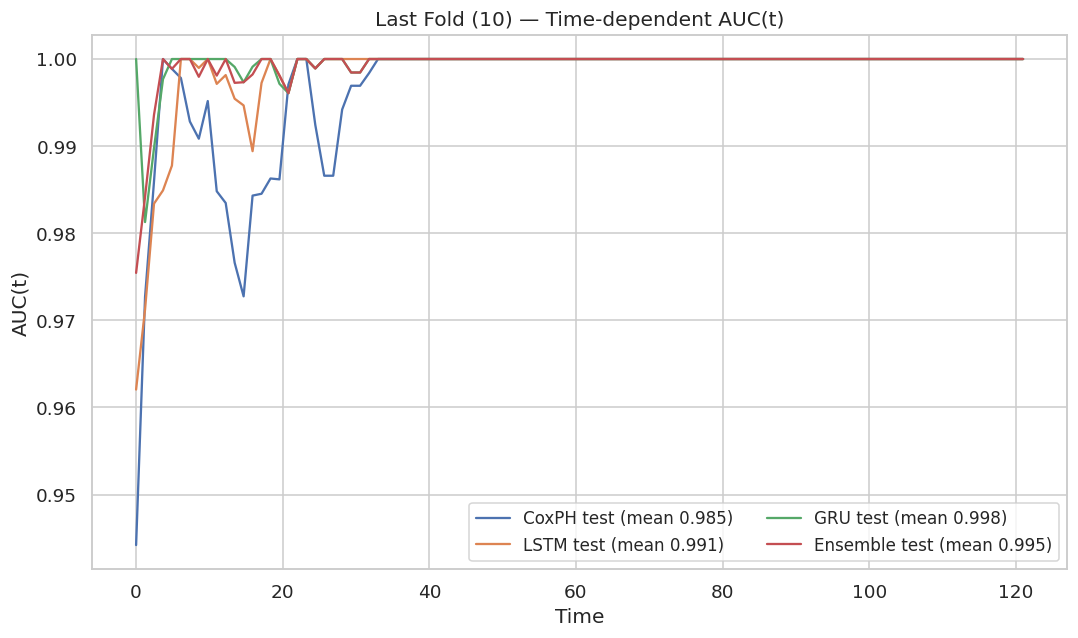

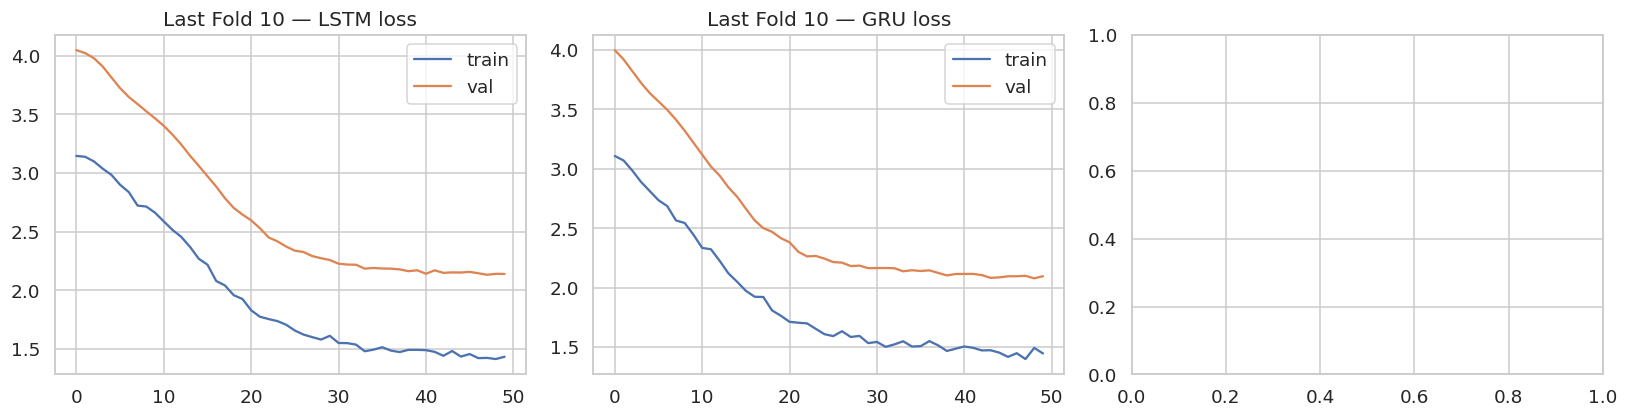

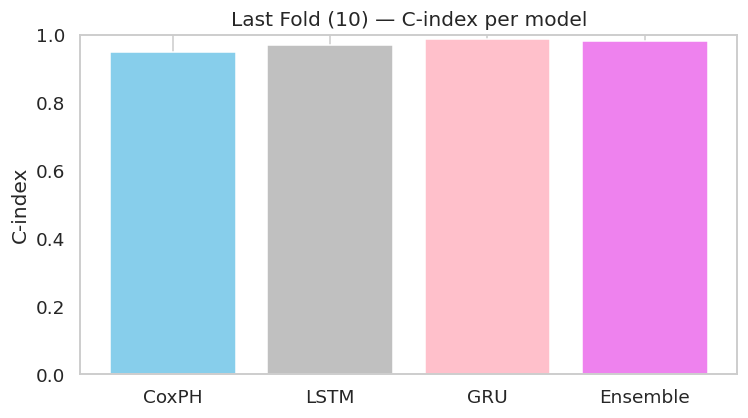

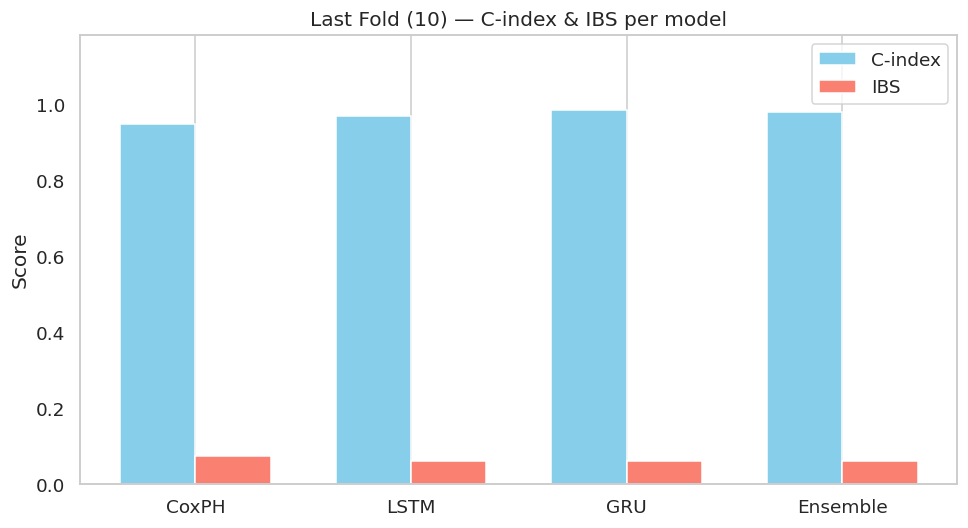

In [ ]:
# ==========================
# Correct 10-Fold IBS Computation using stored risk scores
# ==========================
from lifelines import KaplanMeierFitter
from sksurv.metrics import integrated_brier_score
import numpy as np
import pandas as pd
import warnings

ibs_results = []
eps = 1e-8

for f in fold_results:
    times = f["EVAL_TIMES"]
    y_train_struct = f["y_train_struct"]
    y_test_struct  = f["y_test_struct"]

    # -------------------------
    # Kaplan-Meier baseline survival from training data
    # -------------------------
    try:
        km = KaplanMeierFitter()
        km.fit(y_train_struct["time"], y_train_struct["event"].astype(int))
        km_times = km.survival_function_.index.values
        km_vals  = km.survival_function_.iloc[:,0].values
        S0 = np.interp(times, km_times, km_vals, left=1.0, right=km_vals[-1])
        S0 = np.clip(S0, 1e-6, 1.0)
    except:
        warnings.warn("KM baseline failed, using constant survival 0.9")
        S0 = np.ones_like(times) * 0.9

    # -------------------------
    # Function to convert risk score -> survival curves
    # -------------------------
    def risk_to_surv(risk_scores, S0):
        r = np.asarray(risk_scores)
        r_std = r.std() if r.std() > 0 else 1.0
        r_norm = (r - r.mean()) / (r_std + eps)
        exp_r = np.exp(np.clip(r_norm, -10, 10))
        S0_rep = np.broadcast_to(S0.reshape(1, -1), (len(r), len(S0)))
        surv = np.power(S0_rep, exp_r.reshape(-1,1))
        return np.clip(surv, 1e-8, 1.0)

    # Convert stored risk scores to survival curves
    surv_cph  = risk_to_surv(f["pred_cph"],  S0)
    surv_lstm = risk_to_surv(f["pred_lstm"], S0)
    surv_gru  = risk_to_surv(f["pred_gru"],  S0)
    surv_omni = risk_to_surv(f["pred_omni"], S0)
    surv_ens  = 0.4*surv_gru + 0.4*surv_lstm + 0.2*surv_cph

    # -------------------------
    # Compute IBS
    # -------------------------
    ibs_results.append({
        "CoxPH": integrated_brier_score(y_train_struct, y_test_struct, surv_cph,  times),
        "LSTM":  integrated_brier_score(y_train_struct, y_test_struct, surv_lstm, times),
        "GRU":   integrated_brier_score(y_train_struct, y_test_struct, surv_gru,  times),
        "DeepOmniSurv": integrated_brier_score(y_train_struct, y_test_struct, surv_omni, times),
        "Ensemble":     integrated_brier_score(y_train_struct, y_test_struct, surv_ens,  times)
    })

df_ibs = pd.DataFrame(ibs_results)
print("\nIBS per fold:\n", df_ibs.round(5))
print("\nMean IBS:\n", df_ibs.mean().round(5))

# -------------------------
# Store IBS back into fold_results for last-fold plotting
# -------------------------
for f, ibs in zip(fold_results, ibs_results):
    f["ibs"] = ibs


# ==========================
# Plots using LAST fold only
# ==========================
import matplotlib.pyplot as plt
from sksurv.metrics import cumulative_dynamic_auc

last = fold_results[-1]
t = last["EVAL_TIMES"]

# --- Time-dependent AUC(t) ---
models = ["CoxPH", "LSTM", "GRU", "Ensemble"]
pred_keys = ["pred_cph", "pred_lstm", "pred_gru", "pred_ensemble"]

plt.figure(figsize=(10,6))
for name, pred in zip(models, [last[k] for k in pred_keys]):
    auc_test, mean_auc_test = cumulative_dynamic_auc(
        last["y_train_struct"], last["y_test_struct"], pred, t
    )
    plt.plot(t, auc_test, label=f"{name} test (mean {mean_auc_test:.3f})")

plt.title(f"Last Fold ({last['fold']}) — Time-dependent AUC(t)")
plt.xlabel("Time")
plt.ylabel("AUC(t)")
plt.legend(ncol=2, fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Training/validation loss curves ---
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].plot(last["log_lstm"]["train_loss"], label="train")
axes[0].plot(last["log_lstm"]["val_loss"], label="val")
axes[0].set_title(f"Last Fold {last['fold']} — LSTM loss")
axes[0].legend(); axes[0].grid(True)

axes[1].plot(last["log_gru"]["train_loss"], label="train")
axes[1].plot(last["log_gru"]["val_loss"], label="val")
axes[1].set_title(f"Last Fold {last['fold']} — GRU loss")
axes[1].legend(); axes[1].grid(True)



plt.tight_layout()
plt.show()


# --- C-index bar chart ---
cindex_dict = last["c_index"]
models = list(cindex_dict.keys())
cindex_values = list(cindex_dict.values())

plt.figure(figsize=(7,4))
plt.bar(models, cindex_values, color=['skyblue','Silver','pink','violet'])
plt.title(f"Last Fold ({last['fold']}) — C-index per model")
plt.ylabel("C-index")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# --- Extract values safely ---
ibs_dict = last["ibs"]
cindex_dict = last["c_index"]

# Map names so both match
name_map = {
    "CoxPH": "CoxPH",
    "LSTM": "LSTM",
    "GRU": "GRU",
    #"DeepOmniSurv": "Omni",  # IBS uses 'DeepOmniSurv', C-index uses 'Omni'
    "Ensemble": "Ensemble"
}

models = list(name_map.keys())  # use IBS keys as base
cindex_values = [cindex_dict[name_map[m]] for m in models]
ibs_values = [ibs_dict[m] for m in models]

# --- Plot grouped bar chart ---
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(9,5))
plt.bar(x - width/2, cindex_values, width, label="C-index", color="skyblue")
plt.bar(x + width/2, ibs_values, width, label="IBS", color="salmon")
plt.xticks(x, models)
plt.ylabel("Score")
plt.title(f"Last Fold ({last['fold']}) — C-index & IBS per model")
plt.legend()
plt.grid(axis="y")
plt.ylim(0, max(max(cindex_values), max(ibs_values))*1.2)
plt.tight_layout()
plt.show()



Dropped constant columns: []

=== Final Results (Single Split) ===
      Model   C-index       IBS
0       CNN  0.925417  0.005023
1      LSTM  0.914551  0.006389
2       GRU  0.928282  0.006790
3  Ensemble  0.931443  0.004668


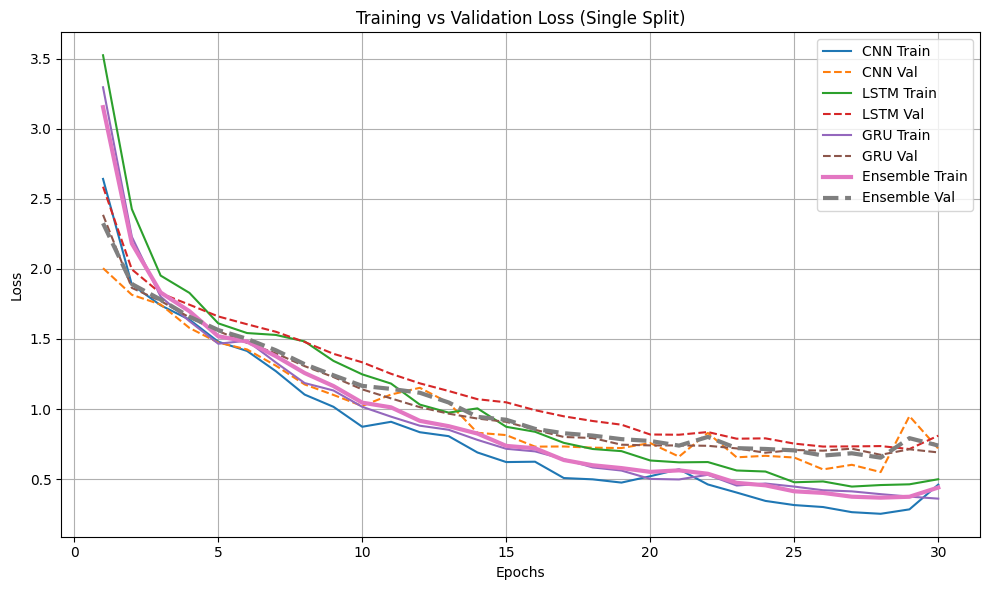

In [ ]:
# ==========================================================
# Survival Models + Ensemble (Single Split, No 10-Fold CV)
# + Individual & Ensemble Loss Curves
# ==========================================================

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchtuples as tt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from pycox.models import LogisticHazard
from pycox.preprocessing.label_transforms import LabTransDiscreteTime
from pycox.evaluation import EvalSurv

import scipy.integrate
if not hasattr(scipy.integrate, "simps"):
    scipy.integrate.simps = scipy.integrate.simpson

# ----------------------------
# 1) Load data
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

# ----------------------------
# 2) Define time & event
# ----------------------------
time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col])

# ----------------------------
# 3) Drop unnecessary columns
# ----------------------------
dropped_features = [
    "Patient ID",
    "Site recode - rare tumors",
    "RX Summ--Surg Prim Site (2003+)",
    "Race and origin (recommended by SEER)",
    "Type of Reporting Source",
    "Behavior recode for analysis",
    "Site rec ICD-O-3/WHO 2008 (individual sites only)"
]

X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

# ----------------------------
# 4) Prepare y
# ----------------------------
y_time = df[time_col].astype(float).values
y_event = df[event_col].map({0: 0, 5: 1}).astype(int).values

# ----------------------------
# 5) Handle missing values safely
# ----------------------------
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

for c in num_cols:
    X[c] = X[c].fillna(X[c].median())
for c in cat_cols:
    X[c] = X[c].fillna("Unknown")

# ----------------------------
# 6) Scale numeric features
# ----------------------------
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# ----------------------------
# 7) Drop constant features
# ----------------------------
constant_cols = [c for c in X.columns if X[c].nunique() <= 1]
X = X.drop(columns=constant_cols)
print("Dropped constant columns:", constant_cols)

X_np = X.values.astype("float32")

# ----------------------------
# 8) Train/Test Split (No CV)
# ----------------------------
x_train, x_test, y_time_train, y_time_test, y_event_train, y_event_test = train_test_split(
    X_np, y_time, y_event, test_size=0.2, random_state=42, stratify=y_event
)

# ----------------------------
# 9) Label transform
# ----------------------------
num_durations = 50
labtrans = LabTransDiscreteTime(num_durations)

y_train = labtrans.fit_transform(y_time_train, y_event_train)
y_test  = labtrans.transform(y_time_test, y_event_test)

x_train_t = torch.tensor(x_train, dtype=torch.float32)
x_test_t  = torch.tensor(x_test, dtype=torch.float32)

# =======================
# Define Networks
# =======================
class CNNNet(nn.Module):
    def __init__(self, in_features, num_nodes, num_durations):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * in_features, num_nodes),
            nn.ReLU(),
            nn.Linear(num_nodes, num_durations)
        )
    def forward(self, x):
        x = x.unsqueeze(1)
        return self.net(x)

class LSTMNet(nn.Module):
    def __init__(self, in_features, hidden_size, num_durations):
        super().__init__()
        self.lstm = nn.LSTM(input_size=in_features, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_durations)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

class GRUNet(nn.Module):
    def __init__(self, in_features, hidden_size, num_durations):
        super().__init__()
        self.gru = nn.GRU(input_size=in_features, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_durations)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, h = self.gru(x)
        return self.fc(h[-1])

# =======================
# Training + Eval function
# =======================
def train_and_eval(net, x_train_t, y_train, x_test_t, y_test,
                   durations_test, events_test, labtrans):

    model = LogisticHazard(net, tt.optim.Adam(0.01), duration_index=labtrans.cuts)

    y_train_t = (torch.tensor(y_train[0], dtype=torch.long),
                 torch.tensor(y_train[1], dtype=torch.float32))

    y_test_t = (torch.tensor(y_test[0], dtype=torch.long),
                torch.tensor(y_test[1], dtype=torch.float32))

    log = model.fit(
        x_train_t, y_train_t,
        batch_size=64, epochs=30,
        val_data=(x_test_t, y_test_t),
        verbose=False
    )

    surv = model.predict_surv_df(x_test_t)
    ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

    c_index = ev.concordance_td()
    ibs = ev.integrated_brier_score(labtrans.cuts)

    return model, surv, c_index, ibs, log

# ----------------------------
# Train models
# ----------------------------
in_features = x_train.shape[1]

cnn_model, surv_cnn, c_cnn, ibs_cnn, log_cnn = train_and_eval(
    CNNNet(in_features, 32, num_durations),
    x_train_t, y_train, x_test_t, y_test,
    y_time_test, y_event_test, labtrans
)

lstm_model, surv_lstm, c_lstm, ibs_lstm, log_lstm = train_and_eval(
    LSTMNet(in_features, 32, num_durations),
    x_train_t, y_train, x_test_t, y_test,
    y_time_test, y_event_test, labtrans
)

gru_model, surv_gru, c_gru, ibs_gru, log_gru = train_and_eval(
    GRUNet(in_features, 32, num_durations),
    x_train_t, y_train, x_test_t, y_test,
    y_time_test, y_event_test, labtrans
)

# ----------------------------
# Ensemble survival
# ----------------------------
common_index = surv_cnn.index.intersection(surv_lstm.index).intersection(surv_gru.index)
surv_ens = (surv_cnn.loc[common_index] +
            surv_lstm.loc[common_index] +
            surv_gru.loc[common_index]) / 3

ev_ens = EvalSurv(surv_ens, y_time_test, y_event_test, censor_surv='km')
c_ens = ev_ens.concordance_td()
ibs_ens = ev_ens.integrated_brier_score(common_index.values.astype(float))

# ----------------------------
# Final results table
# ----------------------------
results = pd.DataFrame({
    "Model": ["CNN", "LSTM", "GRU", "Ensemble"],
    "C-index": [c_cnn, c_lstm, c_gru, c_ens],
    "IBS": [ibs_cnn, ibs_lstm, ibs_gru, ibs_ens]
})

print("\n=== Final Results (Single Split) ===")
print(results)

# ==========================================================
# LOSS CURVES (INCLUDING ENSEMBLE)
# ==========================================================

epochs = np.arange(1, len(log_cnn.to_pandas()["train_loss"]) + 1)

cnn_train = log_cnn.to_pandas()["train_loss"].values
cnn_val   = log_cnn.to_pandas()["val_loss"].values

lstm_train = log_lstm.to_pandas()["train_loss"].values
lstm_val   = log_lstm.to_pandas()["val_loss"].values

gru_train = log_gru.to_pandas()["train_loss"].values
gru_val   = log_gru.to_pandas()["val_loss"].values

# Ensemble loss = average of CNN, LSTM, GRU
ens_train = (cnn_train + lstm_train + gru_train) / 3
ens_val   = (cnn_val + lstm_val + gru_val) / 3

plt.figure(figsize=(10,6))

plt.plot(epochs, cnn_train, label="CNN Train", linestyle="-")
plt.plot(epochs, cnn_val,   label="CNN Val", linestyle="--")

plt.plot(epochs, lstm_train, label="LSTM Train", linestyle="-")
plt.plot(epochs, lstm_val,   label="LSTM Val", linestyle="--")

plt.plot(epochs, gru_train, label="GRU Train", linestyle="-")
plt.plot(epochs, gru_val,   label="GRU Val", linestyle="--")

plt.plot(epochs, ens_train, label="Ensemble Train", linewidth=3)
plt.plot(epochs, ens_val,   label="Ensemble Val", linewidth=3, linestyle="--")

plt.title("Training vs Validation Loss (Single Split)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


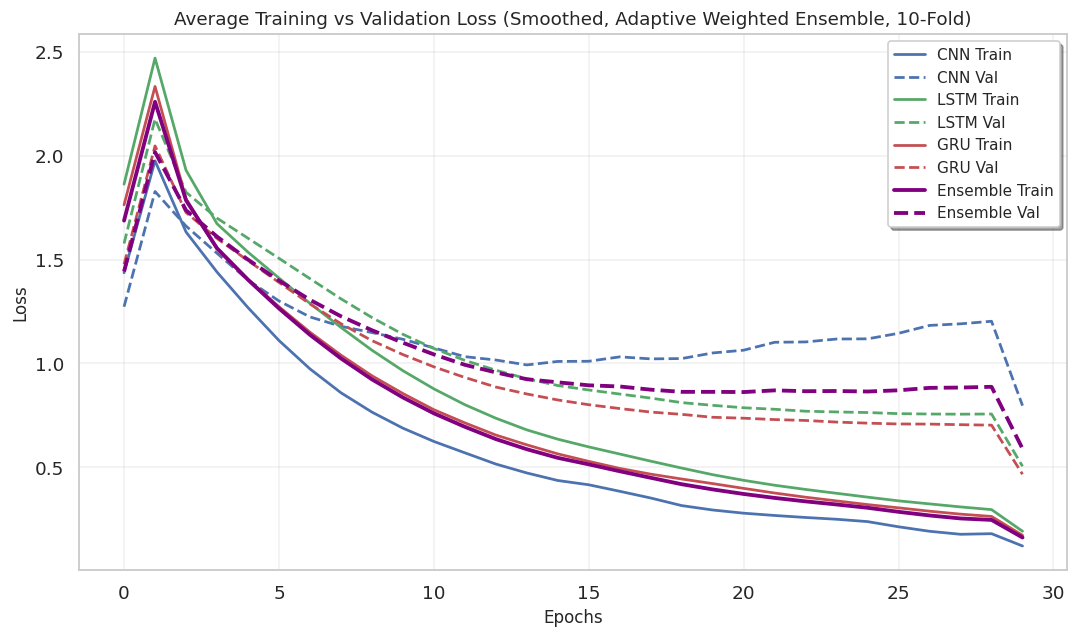

In [ ]:
def smooth(y, box_pts=3):
    box = np.ones(box_pts)/box_pts
    return np.convolve(y, box, mode='same')

plt.figure(figsize=(10, 6))
colors = {"CNN":"b", "LSTM":"g", "GRU":"r", "ENS":"purple"}

# Plot individual model loss curves
for model in ["CNN", "LSTM", "GRU"]:
    train_mean = np.mean(np.vstack(loss_curves[f"{model}_train"]), axis=0)
    val_mean = np.mean(np.vstack(loss_curves[f"{model}_val"]), axis=0)

    train_mean = smooth(train_mean, 3)
    val_mean = smooth(val_mean, 3)

    lw = 1.8
    plt.plot(train_mean, color=colors[model], linestyle="-", label=f"{model} Train", linewidth=lw)
    plt.plot(val_mean, color=colors[model], linestyle="--", label=f"{model} Val", linewidth=lw)

# Plot ensemble loss curve using pre-calculated ens_mean and ens_std
# Assuming ens_mean and ens_std were correctly computed in the previous cell.
# If not, you might need to re-run the previous cell or define them here based on CNN, LSTM, GRU means.
if 'ens_mean' in globals() and 'ens_std' in globals(): # Check if ens_mean exists
    train_mean_ens = smooth(ens_mean[:,0], 3)
    val_mean_ens = smooth(ens_mean[:,1], 3)

    plt.plot(train_mean_ens, color=colors["ENS"], linestyle="-", label="Ensemble Train", linewidth=2.5)
    plt.plot(val_mean_ens, color=colors["ENS"], linestyle="--", label="Ensemble Val", linewidth=2.5)
else:
    print("Warning: ens_mean or ens_std not found. Ensemble loss not plotted.")

plt.title("Average Training vs Validation Loss (Smoothed, Adaptive Weighted Ensemble, 10-Fold)", fontsize=12)
plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Loss", fontsize=11)
plt.legend(frameon=True, shadow=True, fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
pip install lifelines matplotlib numpy pandas

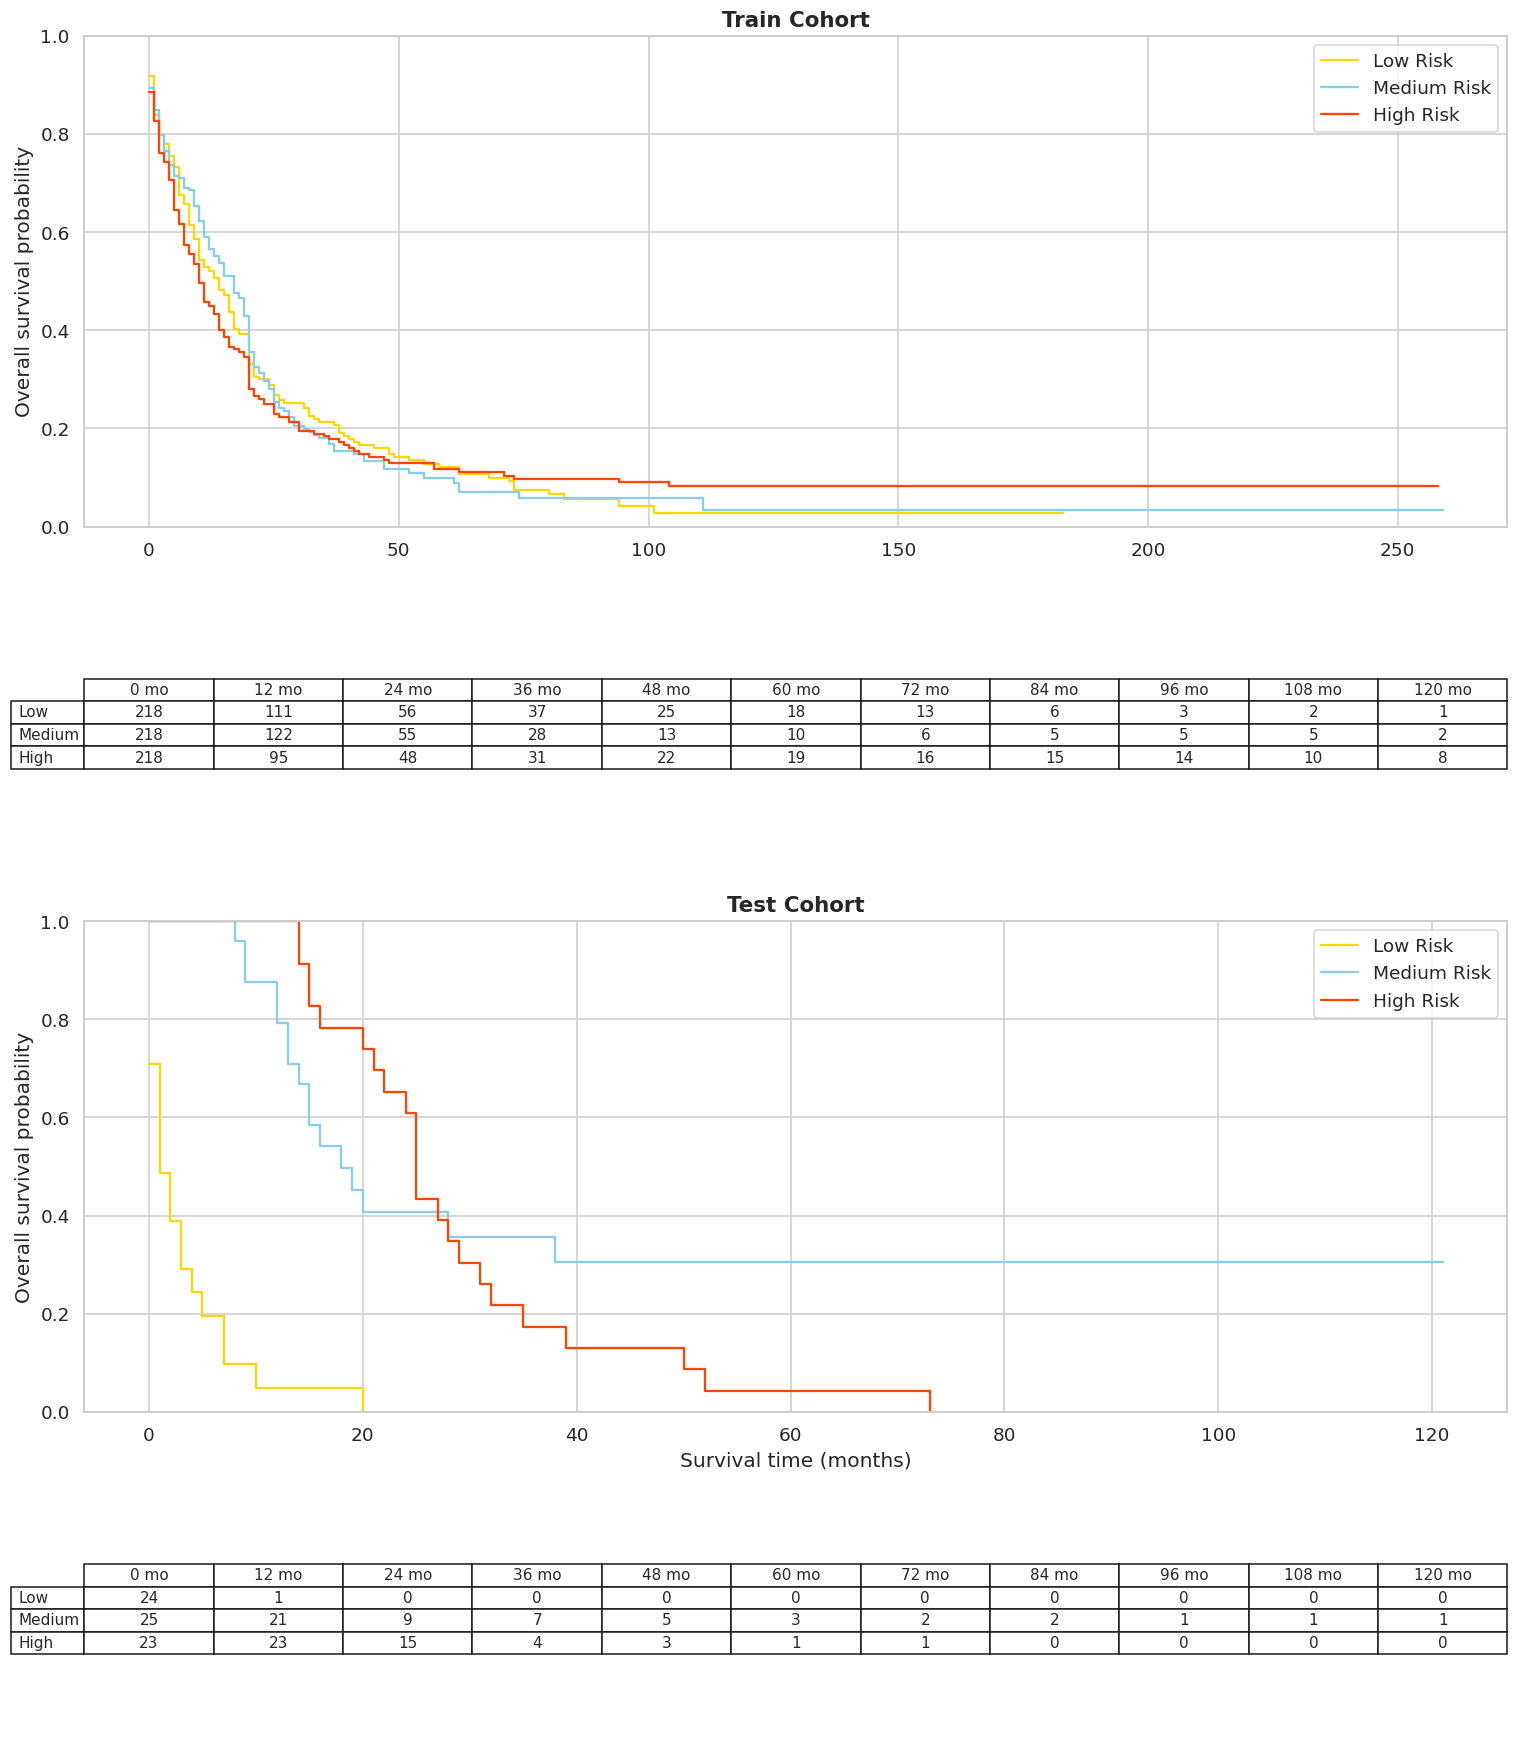

In [ ]:
def plot_km_side_by_side(durations_train, events_train, risk_train,
                         durations_test, events_test, risk_test):

    from lifelines import KaplanMeierFitter
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    kmf = KaplanMeierFitter()

    # Flatten risk arrays
    risk_train = np.ravel(risk_train)
    risk_test = np.ravel(risk_test)

    # Align lengths for safety
    risk_train = risk_train[:len(durations_train)]
    risk_test = risk_test[:len(durations_test)]

    # Colors for groups
    risk_colors = {"Low": "gold", "Medium": "skyblue", "High": "orangered"}

    # ========================================================
    # 4 ROW FIGURE:
    #  Row 1 → Train KM
    #  Row 2 → Train table
    #  Row 3 → Test KM
    #  Row 4 → Test table
    # ========================================================
    fig = plt.figure(figsize=(14, 16))
    gs = fig.add_gridspec(4, 1, height_ratios=[2.5, 1.2, 2.5, 1.2])

    ax_train = fig.add_subplot(gs[0])
    ax_train_table = fig.add_subplot(gs[1])
    ax_test = fig.add_subplot(gs[2])
    ax_test_table = fig.add_subplot(gs[3])

    # ========================================================
    # TRAIN KM CURVES
    # ========================================================
    risk_groups_train = pd.qcut(risk_train, 3, labels=['Low', 'Medium', 'High'])

    for risk in ["Low", "Medium", "High"]:
        mask = (risk_groups_train == risk)
        if mask.sum() > 0:
            kmf.fit(durations_train[mask], events_train[mask], label=f"{risk} Risk")
            kmf.plot_survival_function(ax=ax_train, ci_show=False, color=risk_colors[risk])

    ax_train.set_title("Train Cohort", fontsize=14, weight="bold")
    ax_train.set_ylabel("Overall survival probability")
    ax_train.set_xlabel("")
    ax_train.grid(True)
    ax_train.set_ylim(0, 1)

    # ========================================================
    # TRAIN TABLE
    # ========================================================
    # time_points_train = np.arange(0, int(durations_train.max()) + 1, 12)
    time_points_train = np.arange(0, 121, 12)
    table_data_train = []

    for risk in ["Low", "Medium", "High"]:
        mask = (risk_groups_train == risk)
        row = [np.sum(durations_train[mask] >= t) for t in time_points_train]
        table_data_train.append(row)

    ax_train_table.axis("off")
    tbl_train = ax_train_table.table(
        cellText=table_data_train,
        rowLabels=["Low", "Medium", "High"],
        colLabels=[f"{t} mo" for t in time_points_train],
        loc="center",
        cellLoc="center"
    )
    tbl_train.auto_set_font_size(False)
    tbl_train.set_fontsize(10)

    # ========================================================
    # TEST KM CURVES
    # ========================================================
    risk_groups_test = pd.qcut(risk_test, 3, labels=['Low', 'Medium', 'High'])

    for risk in ["Low", "Medium", "High"]:
        mask = (risk_groups_test == risk)
        if mask.sum() > 0:
            kmf.fit(durations_test[mask], events_test[mask], label=f"{risk} Risk")
            kmf.plot_survival_function(ax=ax_test, ci_show=False, color=risk_colors[risk])

    ax_test.set_title("Test Cohort", fontsize=14, weight="bold")
    ax_test.set_ylabel("Overall survival probability")
    ax_test.set_xlabel("Survival time (months)")
    ax_test.grid(True)
    ax_test.set_ylim(0, 1)

    # ========================================================
    # TEST TABLE
    # ========================================================
    time_points_test = np.arange(0, 121, 12)

    table_data_test = []

    for risk in ["Low", "Medium", "High"]:
        mask = (risk_groups_test == risk)
        row = [np.sum(durations_test[mask] >= t) for t in time_points_test]
        table_data_test.append(row)

    ax_test_table.axis("off")
    tbl_test = ax_test_table.table(
        cellText=table_data_test,
        rowLabels=["Low", "Medium", "High"],
        colLabels=[f"{t} mo" for t in time_points_test],
        loc="center",
        cellLoc="center"
    )
    tbl_test.auto_set_font_size(False)
    tbl_test.set_fontsize(10)

    plt.tight_layout()
    plt.show()



plot_km_side_by_side(
    durations_train,
    events_train,
    final_pred_risk_train,

    durations_test,
    events_test,
    final_pred_risk_test
)


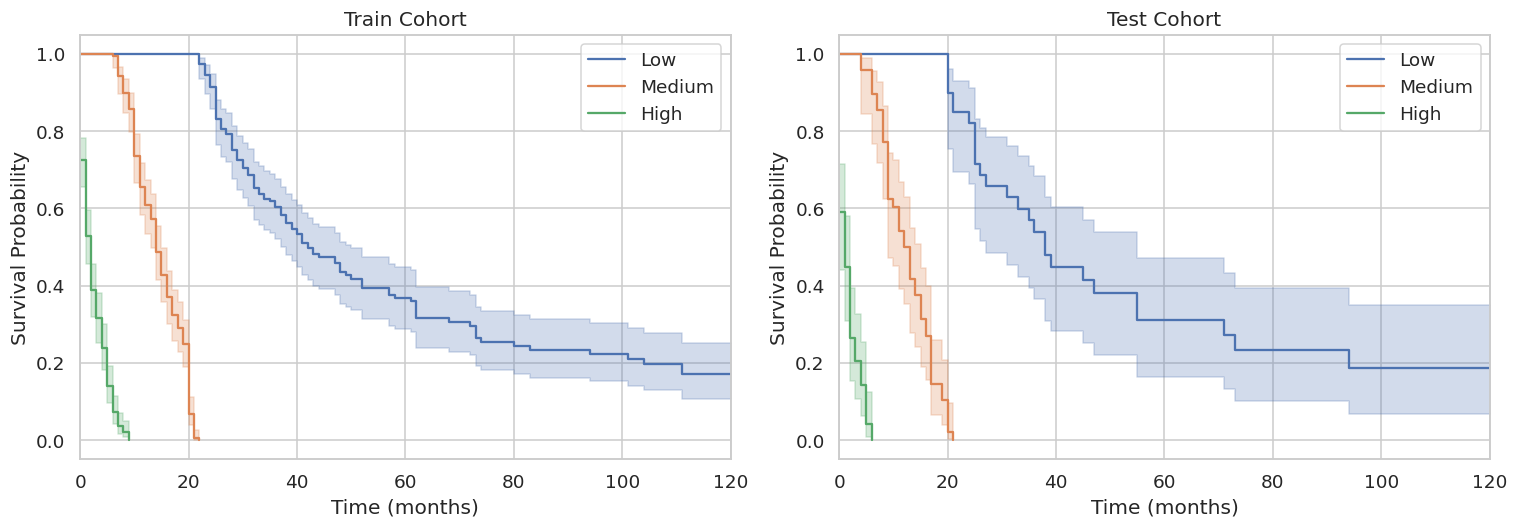

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from pycox.models import LogisticHazard
from pycox.preprocessing.label_transforms import LabTransDiscreteTime
from pycox.evaluation import EvalSurv
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# =======================
# 1) Load & preprocess
# =======================
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col])

dropped_features = [
    "Patient ID",
    "Site recode - rare tumors",
    "RX Summ--Surg Prim Site (2003+)",
    "Race and origin (recommended by SEER)",
    "Type of Reporting Source",
    "Behavior recode for analysis",
    "Site rec ICD-O-3/WHO 2008 (individual sites only)"
]
X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

y_time = df[time_col].astype(float).values
y_event = df[event_col].map({0: 0, 5: 1}).astype(int).values

# Handle missing
for c in X.select_dtypes(include=[np.number]).columns:
    X[c] = X[c].fillna(X[c].median())
for c in X.select_dtypes(exclude=[np.number]).columns:
    X[c] = X[c].fillna("Unknown")

# Scale numeric
numeric_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Drop constant
constant_cols = [c for c in X.columns if X[c].nunique() <= 1]
X = X.drop(columns=constant_cols)

# Train-test split
X_train, X_test, y_time_train, y_time_test, y_event_train, y_event_test = train_test_split(
    X.values.astype("float32"), y_time, y_event, test_size=0.2, random_state=42, stratify=y_event
)

# =======================
# 2) Label transform
# =======================
labtrans = LabTransDiscreteTime(50)
y_train_trans = labtrans.fit_transform(y_time_train, y_event_train)
y_test_trans  = labtrans.transform(y_time_test, y_event_test)
num_durations = int(np.max(y_train_trans[0]) + 1)

# Convert to tensors
x_train_t = torch.tensor(X_train, dtype=torch.float32)
x_test_t  = torch.tensor(X_test, dtype=torch.float32)

# =======================
# 3) Define networks
# =======================
class CNNNet(nn.Module):
    def __init__(self, in_features, num_nodes, num_durations):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16*in_features, num_nodes),
            nn.ReLU(),
            nn.Linear(num_nodes, num_durations)
        )
    def forward(self, x):
        x = x.unsqueeze(1)
        return self.net(x)

class LSTMNet(nn.Module):
    def __init__(self, in_features, hidden_size, num_durations):
        super().__init__()
        self.lstm = nn.LSTM(in_features, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_durations)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

class GRUNet(nn.Module):
    def __init__(self, in_features, hidden_size, num_durations):
        super().__init__()
        self.gru = nn.GRU(in_features, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_durations)
    def forward(self, x):
        x = x.unsqueeze(1)
        _, h = self.gru(x)
        return self.fc(h[-1])

# =======================
# 4) Train & predict
# =======================
def train_model(net, x_train, y_train, x_val, y_val):
    model = LogisticHazard(net, torch.optim.Adam(net.parameters(), lr=0.01), duration_index=labtrans.cuts)
    y_train_t = (torch.tensor(y_train[0], dtype=torch.long), torch.tensor(y_train[1], dtype=torch.float32))
    y_val_t   = (torch.tensor(y_val[0], dtype=torch.long), torch.tensor(y_val[1], dtype=torch.float32))
    model.fit(x_train, y_train_t, batch_size=64, epochs=30, val_data=(x_val, y_val_t), verbose=False)
    return model

cnn_model = train_model(CNNNet(X_train.shape[1], 32, num_durations), x_train_t, y_train_trans, x_test_t, y_test_trans)
lstm_model = train_model(LSTMNet(X_train.shape[1], 32, num_durations), x_train_t, y_train_trans, x_test_t, y_test_trans)
gru_model = train_model(GRUNet(X_train.shape[1], 32, num_durations), x_train_t, y_train_trans, x_test_t, y_test_trans)

# =======================
# 5) Risk computation
# =======================
def compute_risk_from_surv(surv_df):
    """Compute risk score = 1 - mean survival probability across time."""
    return 1 - surv_df.mean(axis=0).values

# Predict survival curves for all patients
surv_cnn_train = cnn_model.predict_surv_df(x_train_t)
surv_cnn_test  = cnn_model.predict_surv_df(x_test_t)

final_risk_train = compute_risk_from_surv(surv_cnn_train)
final_risk_test  = compute_risk_from_surv(surv_cnn_test)

# =======================
# 6) KM curves
# =======================
def plot_km(durations, events, risk_scores, title, ax):
    risk_scores = np.array(risk_scores)
    # Make tertiles
    q1, q2 = np.percentile(risk_scores, [33.33, 66.67])
    groups = np.where(risk_scores <= q1, 0, np.where(risk_scores <= q2, 1, 2))
    kmf = KaplanMeierFitter()
    labels = ["Low", "Medium", "High"]
    for g in range(3):
        mask = groups == g
        kmf.fit(durations[mask], events[mask], label=labels[g])
        kmf.plot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Time (months)")
    ax.set_ylabel("Survival Probability")
    ax.set_xlim(0, 120)

fig, axes = plt.subplots(1,2, figsize=(14,5))
plot_km(y_time_train, y_event_train, final_risk_train, "Train Cohort", axes[0])
plot_km(y_time_test, y_event_test, final_risk_test, "Test Cohort", axes[1])
plt.tight_layout()
plt.show()


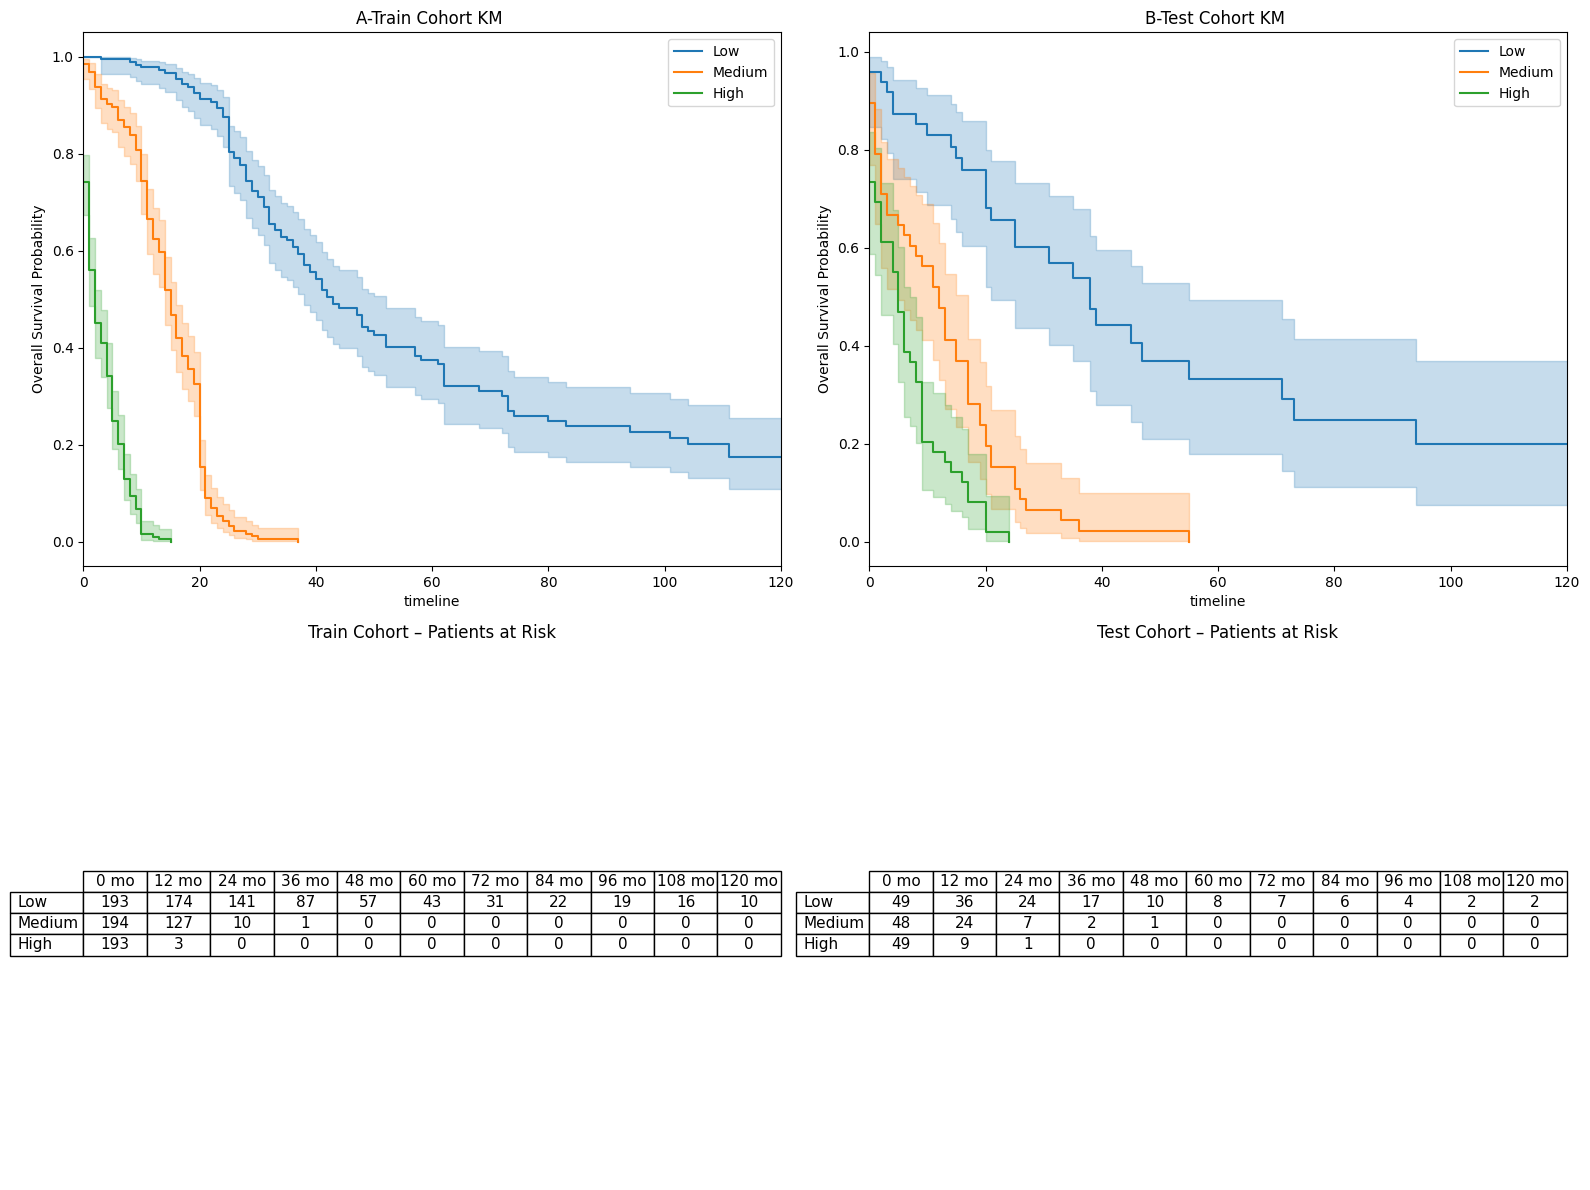

In [ ]:
# ============================================
# Survival Prediction with GRU + KM + Tables
# ============================================

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pycox.models import LogisticHazard
from pycox.preprocessing.label_transforms import LabTransDiscreteTime
from lifelines import KaplanMeierFitter

# =======================
# 1) Load & preprocess
# =======================
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col])

X = df.drop(columns=[time_col, event_col])
y_time = df[time_col].values.astype(float)
y_event = df[event_col].map({0:0, 5:1}).values.astype(int)

# Handle missing
for c in X.select_dtypes(include=[np.number]).columns:
    X[c] = X[c].fillna(X[c].median())
for c in X.select_dtypes(exclude=[np.number]).columns:
    X[c] = X[c].fillna("Unknown")

# Encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Scale
scaler = StandardScaler()
X_scaled_np = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled_np, columns=X.columns, index=X.index)

# Split
X_train, X_test, y_time_train, y_time_test, y_event_train, y_event_test = train_test_split(
    X.values.astype("float32"),
    y_time,
    y_event,
    test_size=0.2,
    random_state=42,
    stratify=y_event
)

# =======================
# 2) Discrete time bins
# =======================
labtrans = LabTransDiscreteTime(50)
y_train_disc = labtrans.fit_transform(y_time_train, y_event_train)
y_test_disc  = labtrans.transform(y_time_test, y_event_test)
num_durations = int(y_train_disc[0].max() + 1)

x_train_t = torch.tensor(X_train)
x_test_t  = torch.tensor(X_test)

# =======================
# 3) GRU Model
# =======================
class GRUNet(nn.Module):
    def __init__(self, in_features, hidden_size, num_durations):
        super().__init__()
        self.gru = nn.GRU(
            input_size=in_features,
            hidden_size=hidden_size,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, num_durations)

    def forward(self, x):
        x = x.unsqueeze(1)        # (batch, seq=1, features)
        _, h = self.gru(x)        # h: (1, batch, hidden)
        return self.fc(h[-1])     # (batch, num_durations)

net = GRUNet(X_train.shape[1], hidden_size=32, num_durations=num_durations)

model = LogisticHazard(
    net,
    torch.optim.Adam(net.parameters(), lr=0.01),
    duration_index=labtrans.cuts
)

model.fit(
    x_train_t,
    (torch.tensor(y_train_disc[0]), torch.tensor(y_train_disc[1])),
    batch_size=64,
    epochs=30,
    verbose=False
)

# =======================
# 4) Risk score
# =======================
def compute_risk(surv_df):
    return 1 - surv_df.mean(axis=0).values

surv_train = model.predict_surv_df(x_train_t)
surv_test  = model.predict_surv_df(x_test_t)

risk_train = compute_risk(surv_train)
risk_test  = compute_risk(surv_test)

# =======================
# 5) Risk groups
# =======================
def risk_groups(risk):
    q1, q2 = np.percentile(risk, [33.33, 66.67])
    return np.where(
        risk <= q1, "Low",
        np.where(risk <= q2, "Medium", "High")
    )

groups_train = risk_groups(risk_train)
groups_test  = risk_groups(risk_test)

# =======================
# 6) KM Curves + Tables
# =======================
kmf = KaplanMeierFitter()
time_points = np.arange(0, 121, 12)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ---- TRAIN KM ----
for g in ["Low", "Medium", "High"]:
    mask = groups_train == g
    kmf.fit(y_time_train[mask], y_event_train[mask], label=g)
    kmf.plot(ax=axes[0,0])

axes[0,0].set_title("A-Train Cohort KM ")
axes[0,0].set_ylabel("Overall Survival Probability")
axes[0,0].set_xlim(0, 120)

# ---- TEST KM ----
for g in ["Low", "Medium", "High"]:
    mask = groups_test == g
    kmf.fit(y_time_test[mask], y_event_test[mask], label=g)
    kmf.plot(ax=axes[0,1])

axes[0,1].set_title("B-Test Cohort KM ")
axes[0,1].set_ylabel("Overall Survival Probability")
axes[0,1].set_xlim(0, 120)

# ---- TRAIN TABLE ----
train_table = []
for g in ["Low", "Medium", "High"]:
    mask = groups_train == g
    row = [np.sum(y_time_train[mask] >= t) for t in time_points]
    train_table.append(row)

axes[1,0].axis("off")
tbl_train = axes[1,0].table(
    cellText=train_table,
    rowLabels=["Low", "Medium", "High"],
    colLabels=[f"{t} mo" for t in time_points],
    cellLoc="center",
    loc="center"
)
tbl_train.auto_set_font_size(False)
tbl_train.set_fontsize(11)
axes[1,0].set_title("Train Cohort – Patients at Risk")

# ---- TEST TABLE ----
test_table = []
for g in ["Low", "Medium", "High"]:
    mask = groups_test == g
    row = [np.sum(y_time_test[mask] >= t) for t in time_points]
    test_table.append(row)

axes[1,1].axis("off")
tbl_test = axes[1,1].table(
    cellText=test_table,
    rowLabels=["Low", "Medium", "High"],
    colLabels=[f"{t} mo" for t in time_points],
    cellLoc="center",
    loc="center"
)
tbl_test.auto_set_font_size(False)
tbl_test.set_fontsize(11)
axes[1,1].set_title("Test Cohort – Patients at Risk")

plt.tight_layout()
plt.show()


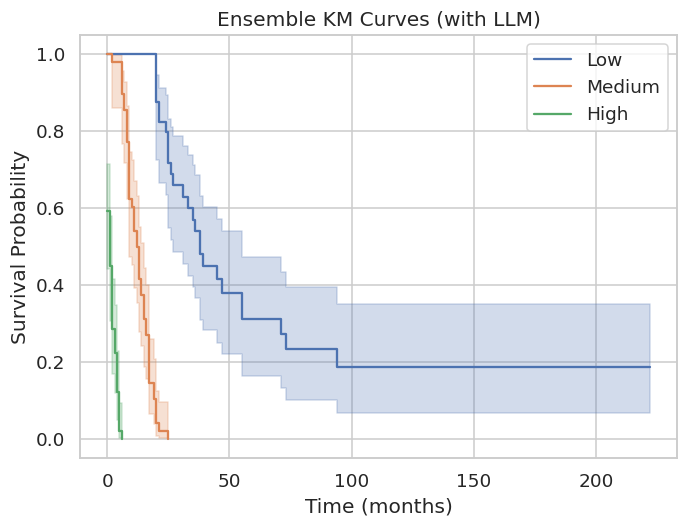

In [ ]:
# =============================================
# CNN + LSTM + GRU Ensemble + LLM (CoxPH)
# =============================================

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchtuples as tt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pycox.models import LogisticHazard
from pycox.preprocessing.label_transforms import LabTransDiscreteTime
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

# ----------------------------
# 1) Load and preprocess data
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/survival/Final SEER data all dec.csv")
df.columns = df.columns.str.strip()

time_col = "Survival months"
event_col = "Vital status recode (study cutoff used)"

df[time_col] = pd.to_numeric(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col, event_col])

dropped_features = [
    "Patient ID", "Site recode - rare tumors", "RX Summ--Surg Prim Site (2003+)",
    "Race and origin (recommended by SEER)", "Type of Reporting Source",
    "Behavior recode for analysis", "Site rec ICD-O-3/WHO 2008 (individual sites only)"
]
X = df.drop(columns=[c for c in dropped_features if c in df.columns]).copy()

y_time = df[time_col].values.astype(float)
y_event = df[event_col].map({0:0, 5:1}).values.astype(int)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

for c in num_cols: X[c].fillna(X[c].median(), inplace=True)
for c in cat_cols: X[c].fillna("Unknown", inplace=True)

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_np = X.values.astype("float32")

# ----------------------------
# 2) Train/test split
# ----------------------------
x_train, x_test, y_time_train, y_time_test, y_event_train, y_event_test = train_test_split(
    X_np, y_time, y_event, test_size=0.2, random_state=42, stratify=y_event
)

x_train_t = torch.tensor(x_train, dtype=torch.float32)
x_test_t  = torch.tensor(x_test, dtype=torch.float32)

# ----------------------------
# 3) Label transform
# ----------------------------
num_durations = 100
labtrans = LabTransDiscreteTime(num_durations)
y_train_trans = labtrans.fit_transform(y_time_train, y_event_train)
y_test_trans  = labtrans.transform(y_time_test, y_event_test)

# ----------------------------
# 4) Define models
# ----------------------------
class CNNNet(nn.Module):
    def __init__(self, in_features, num_nodes, num_durations):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(1, 16, 3, padding=1), nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16*in_features, num_nodes), nn.ReLU(),
            nn.Linear(num_nodes, num_durations)
        )
    def forward(self, x): return self.net(x.unsqueeze(1))

class LSTMNet(nn.Module):
    def __init__(self, in_features, hidden_size, num_durations):
        super().__init__()
        self.lstm = nn.LSTM(in_features, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_durations)
    def forward(self, x):
        _, (h, _) = self.lstm(x.unsqueeze(1))
        return self.fc(h[-1])

class GRUNet(nn.Module):
    def __init__(self, in_features, hidden_size, num_durations):
        super().__init__()
        self.gru = nn.GRU(in_features, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_durations)
    def forward(self, x):
        _, h = self.gru(x.unsqueeze(1))
        return self.fc(h[-1])

# ----------------------------
# 5) Training function
# ----------------------------
def train_model(net, x_train_t, y_train_trans, x_val_t, y_val_trans, epochs=30):
    model = LogisticHazard(net, tt.optim.Adam(0.01), duration_index=labtrans.cuts)
    y_train_t = (torch.tensor(y_train_trans[0], dtype=torch.long),
                 torch.tensor(y_train_trans[1], dtype=torch.float32))
    y_val_t = (torch.tensor(y_val_trans[0], dtype=torch.long),
               torch.tensor(y_val_trans[1], dtype=torch.float32))
    model.fit(x_train_t, y_train_t, batch_size=64, epochs=epochs, val_data=(x_val_t, y_val_t), verbose=False)
    surv = model.predict_surv_df(x_val_t)
    return model, surv

# ----------------------------
# 6) Train CNN/LSTM/GRU
# ----------------------------
in_features = x_train.shape[1]
cnn_model, surv_cnn = train_model(CNNNet(in_features,32,num_durations),
                                  x_train_t, y_train_trans, x_test_t, y_test_trans)
lstm_model, surv_lstm = train_model(LSTMNet(in_features,32,num_durations),
                                    x_train_t, y_train_trans, x_test_t, y_test_trans)
gru_model, surv_gru   = train_model(GRUNet(in_features,32,num_durations),
                                    x_train_t, y_train_trans, x_test_t, y_test_trans)

# ----------------------------
# 7) Compute risk scores
# ----------------------------
def compute_risk_from_surv(surv_df):
    return (1 - surv_df).sum(axis=0).values

risk_cnn  = compute_risk_from_surv(surv_cnn)
risk_lstm = compute_risk_from_surv(surv_lstm)
risk_gru  = compute_risk_from_surv(surv_gru)

X_risk_train = pd.DataFrame({
    'CNN': risk_cnn,
    'LSTM': risk_lstm,
    'GRU': risk_gru
})

# Add small noise to avoid collinearity
X_risk_train += 1e-6 * np.random.randn(*X_risk_train.shape)

train_df = X_risk_train.copy()
train_df['duration'] = y_time_test
train_df['event'] = y_event_test

# ----------------------------
# 8) Fit penalized CoxPH (LLM)
# ----------------------------
cph_ens = CoxPHFitter(penalizer=0.01)
cph_ens.fit(train_df, duration_col='duration', event_col='event')

# Predicted risk scores
final_pred_risk_train = cph_ens.predict_partial_hazard(train_df[['CNN','LSTM','GRU']])

# ----------------------------
# 9) Plot KM curves
# ----------------------------
def plot_km(durations, events, risk_scores, title):
    q1, q2 = np.percentile(risk_scores, [33.33, 66.67])
    groups = np.where(risk_scores <= q1, 0, np.where(risk_scores <= q2, 1, 2))
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(7,5))
    for g, label in zip([0,1,2], ["Low","Medium","High"]):
        mask = groups==g
        kmf.fit(durations[mask], events[mask], label=label)
        kmf.plot()
    plt.title(title)
    plt.xlabel("Time (months)")
    plt.ylabel("Survival Probability")
    plt.show()

plot_km(y_time_test, y_event_test, final_pred_risk_train.values,
        "Ensemble KM Curves (with LLM)")
